# What demographics have benefited from pet ownership during the social isolation of the COVID-19 pandemic?
---
- Data: [Harvard Dataverse, "Association between Pet Ownership and Mental Health and Well-Being of Canadians Assessed in a Cross-Sectional Study during the COVID-19 Pandemic"](https://dataverse.harvard.edu/file.xhtml?fileId=5244752&version=5.1).
- data cleaning + exploratory data analysis
    
- feature engineering/ creating new features
- model selection, modelling
- model evaluation
- conclusion

In [304]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
import scipy.stats as stats

In [3]:
data = pd.read_csv('dataset_petandcovid.csv')
data.head()

D2    region   O1 O8b   P1     D1           D5  \
0                Nova Scotia  Atlantic   No  No   72  18-24  High school   
1                    Alberta  Prairies   No  No   69  45-54      College   
2  Newfoundland and Labrador  Atlantic   No  No   74  45-54   University   
3                    Ontario   Ontario  Yes  No  116  45-54  High school   
4                    Ontario   Ontario  Yes  No   99  18-24   University   

          D67     D4  D11  ... H1Ax               H4 H56    S       QOL  GH  \
0      Others    Men    4  ...   No   Somewhat worse  No   No  0.829328  80   
1  Caucasians    Men    4  ...   No       Much worse  No  Yes  0.873691  80   
2  Caucasians    Men    2  ...  Yes   Somewhat worse  No  Yes  0.437208  41   
3  Caucasians    Men    5  ...   No   Somewhat worse  No  Yes  0.911329  80   
4  Caucasians  Women    2  ...   No  Somewhat better  No  Yes  0.860241  78   

  L1         H3         Q2    Q1_cat  
0  8       Good      A bit  Moderate  
1  5       Fair      A bit   Minimal  
2  5       Fair      A bit      Mild  
3  6  Very good  Extremely  Moderate  
4  4  Very good   Not very   Minimal  

[5 rows x 23 columns]

### data cleaning + eda

In [5]:
#for ease of column data comprehension
var_name_change ={'D2': 'province_or_territory',
                  'O1': 'pet_ownership',
                  'O8b': 'change_in_pet_ownership',
                  'P1': 'pet_attitude',
                  'D1': 'age',
                  'D5': 'highest_level_of_education',
                  'D67': 'ethnicity',
                  'D4': 'gender',
                  'D11': 'number_of_people_in_the_household',
                  'D8': 'yearly_income',
                  'E3': 'change_in_income_since_the_beginning_of_the_pandemic',
                  'H2': 'disability',
                  'H1Ax': 'emotional_psychological_or_mental_health_condition',
                  'H4': 'change_in_mental_health_since_the_beginning_of_the_pandemic',
                  'H56': 'tested_positive_to-COVID19_or_household_member',
                  'S': 'social_support',
                  'QOL': 'quality_of_life',
                  'GH': 'self_assessed_overall_health',
                  'L1': 'loneliness',
                  'H3': 'perceived_mental_health',
                  'Q2': 'self_reported_level_of_stress',
                  'Q1_cat': 'anxiety'}
data = data.rename(columns = var_name_change)

In [6]:
#checking for any missing values
data.isna().sum()

province_or_territory                                          0
region                                                         0
pet_ownership                                                  0
change_in_pet_ownership                                        0
pet_attitude                                                   0
age                                                            0
highest_level_of_education                                     0
ethnicity                                                      0
gender                                                         0
number_of_people_in_the_household                              0
yearly_income                                                  0
change_in_income_since_the_beginning_of_the_pandemic           0
disability                                                     0
emotional_psychological_or_mental_health_condition             0
change_in_mental_health_since_the_beginning_of_the_pandemic    0
tested_positive_to-COVID1

In [7]:
data.describe()

pet_attitude  number_of_people_in_the_household  quality_of_life  \
count   1500.000000                          1500.0000      1500.000000   
mean      94.174000                             2.5700         0.838867   
std       21.055117                             1.3524         0.138681   
min       19.000000                             1.0000        -0.006337   
25%       79.000000                             2.0000         0.809870   
50%       97.500000                             2.0000         0.872415   
75%      112.000000                             3.0000         0.911329   
max      126.000000                            14.0000         0.948968   

       self_assessed_overall_health   loneliness  
count                   1500.000000  1500.000000  
mean                      73.447333     5.255333  
std                       16.971405     1.929582  
min                        0.000000     3.000000  
25%                       66.000000     3.000000  
50%                       77.000000     5.000000  
75%                       85.000000     7.000000  
max                      100.000000     9.000000

In [8]:
data.duplicated().value_counts()
#no duplicated rows

False    1500
Name: count, dtype: int64

In [9]:
#checking for datatypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 23 columns):
 #   Column                                                       Non-Null Count  Dtype  
---  ------                                                       --------------  -----  
 0   province_or_territory                                        1500 non-null   object 
 1   region                                                       1500 non-null   object 
 2   pet_ownership                                                1500 non-null   object 
 3   change_in_pet_ownership                                      1500 non-null   object 
 4   pet_attitude                                                 1500 non-null   int64  
 5   age                                                          1500 non-null   object 
 6   highest_level_of_education                                   1500 non-null   object 
 7   ethnicity                                                    1500 non-null   o

In [10]:
object_data_cols = data.select_dtypes(include='object').columns.to_list()
numeric_data_cols = data.select_dtypes(include=['float64','int64']).columns.to_list()

In [11]:
for var in object_data_cols:
    print(data[var].value_counts())
    print('\n')

province_or_territory
Ontario                      575
Qu�bec                       387
British Columbia             187
Alberta                      149
Saskatchewan                  49
Manitoba                      49
Nova Scotia                   37
New Brunswick                 36
Newfoundland and Labrador     18
Yukon                          6
Prince Edward Island           3
Northwest Territories          3
Nunavut                        1
Name: count, dtype: int64


region
Ontario             575
Qu�bec              387
Prairies            257
British Columbia    187
Atlantic             94
Name: count, dtype: int64


pet_ownership
No     750
Yes    750
Name: count, dtype: int64


change_in_pet_ownership
No      1259
Loss     173
New       68
Name: count, dtype: int64


age
45-54    308
65+      300
35-44    277
55-64    259
25-34    229
18-24    127
Name: count, dtype: int64


highest_level_of_education
University            659
College               486
High school           

In [12]:
#some variables are based on scales or are binary e.g. ('No', 'Yes')
scalable_data_cols = ['change_in_mental_health_since_the_beginning_of_the_pandemic',
                    'perceived_mental_health',
                    'self_reported_level_of_stress',
                    'anxiety']

binary_data_cols = ['pet_ownership',
                    'disability',
                    'emotional_psychological_or_mental_health_condition',
                    'tested_positive_to-COVID19_or_household_member',
                    'social_support']

categorical_data_cols = [var for var in object_data_cols if (var not in scalable_data_cols) and (var not in binary_data_cols)]
categorical_data_cols

['province_or_territory',
 'region',
 'change_in_pet_ownership',
 'age',
 'highest_level_of_education',
 'ethnicity',
 'gender',
 'yearly_income',
 'change_in_income_since_the_beginning_of_the_pandemic']

In [13]:
#for the scalable type, prepare to change to numerical scale
scale_anxiety= {
    'Minimal' : 1,
    'Mild': 2,
    'Moderate': 3,
    'Severe': 4
}

scale_self_reported_level_of_stress ={
    'Not at all': 0,
    'A bit': 1,
    'Not very': 2,
    'Quite a bit': 3,
    'Extremely': 4
}

scale_change_in_mental_health_since_the_beginning_of_the_pandemic = {
    'About the same': 0,
    'Somewhat worse': -1,
    'Somewhat better': 1,
    'Much worse': -2,
    'Much better':2
}
scale_perceived_mental_health = {
    'Good': 0,
    'Very good': 1,
    'Fair': -1,
    'Poor': -2,
    'Excellent': 2
}


In [14]:
pd.set_option("future.no_silent_downcasting", True)

In [15]:
#for the scalable type, change to numerical scale
data_modified = data
data_modified['perceived_mental_health'] = data_modified['perceived_mental_health'].replace(scale_perceived_mental_health)
data_modified['perceived_mental_health'].astype(int)

data_modified['change_in_mental_health_since_the_beginning_of_the_pandemic'] = data_modified['change_in_mental_health_since_the_beginning_of_the_pandemic'].replace(scale_change_in_mental_health_since_the_beginning_of_the_pandemic)
data_modified['change_in_mental_health_since_the_beginning_of_the_pandemic'].astype(int)

data_modified['self_reported_level_of_stress'] = data_modified['self_reported_level_of_stress'].replace(scale_self_reported_level_of_stress)
data_modified['self_reported_level_of_stress'].astype(int)

data_modified['anxiety'] = data_modified['anxiety'].replace(scale_anxiety)
data_modified['anxiety'].astype(int)

0       3
1       1
2       2
3       3
4       1
       ..
1495    1
1496    4
1497    1
1498    1
1499    2
Name: anxiety, Length: 1500, dtype: int64

In [16]:
#for the binary type, prepare to change to numerical scale
scale_binary = {'No': 0, 'Yes': 1}

data_modified['pet_ownership'] = data_modified['pet_ownership'].replace(scale_binary)
data_modified['pet_ownership'].astype(int)

data_modified['disability'] = data_modified['disability'].replace(scale_binary)
data_modified['disability'].astype(int)

data_modified['emotional_psychological_or_mental_health_condition'] = data_modified['emotional_psychological_or_mental_health_condition'].replace(scale_binary)
data_modified['emotional_psychological_or_mental_health_condition'].astype(int)

data_modified['tested_positive_to-COVID19_or_household_member'] = data_modified['tested_positive_to-COVID19_or_household_member'].replace(scale_binary)
data_modified['tested_positive_to-COVID19_or_household_member'].astype(int)

data_modified['social_support'] = data_modified['social_support'].replace(scale_binary)
data_modified['social_support'].astype(int)

0       0
1       1
2       1
3       1
4       1
       ..
1495    1
1496    1
1497    1
1498    1
1499    1
Name: social_support, Length: 1500, dtype: int64

In [17]:
modified_numeric_data_cols = numeric_data_cols + scalable_data_cols + binary_data_cols

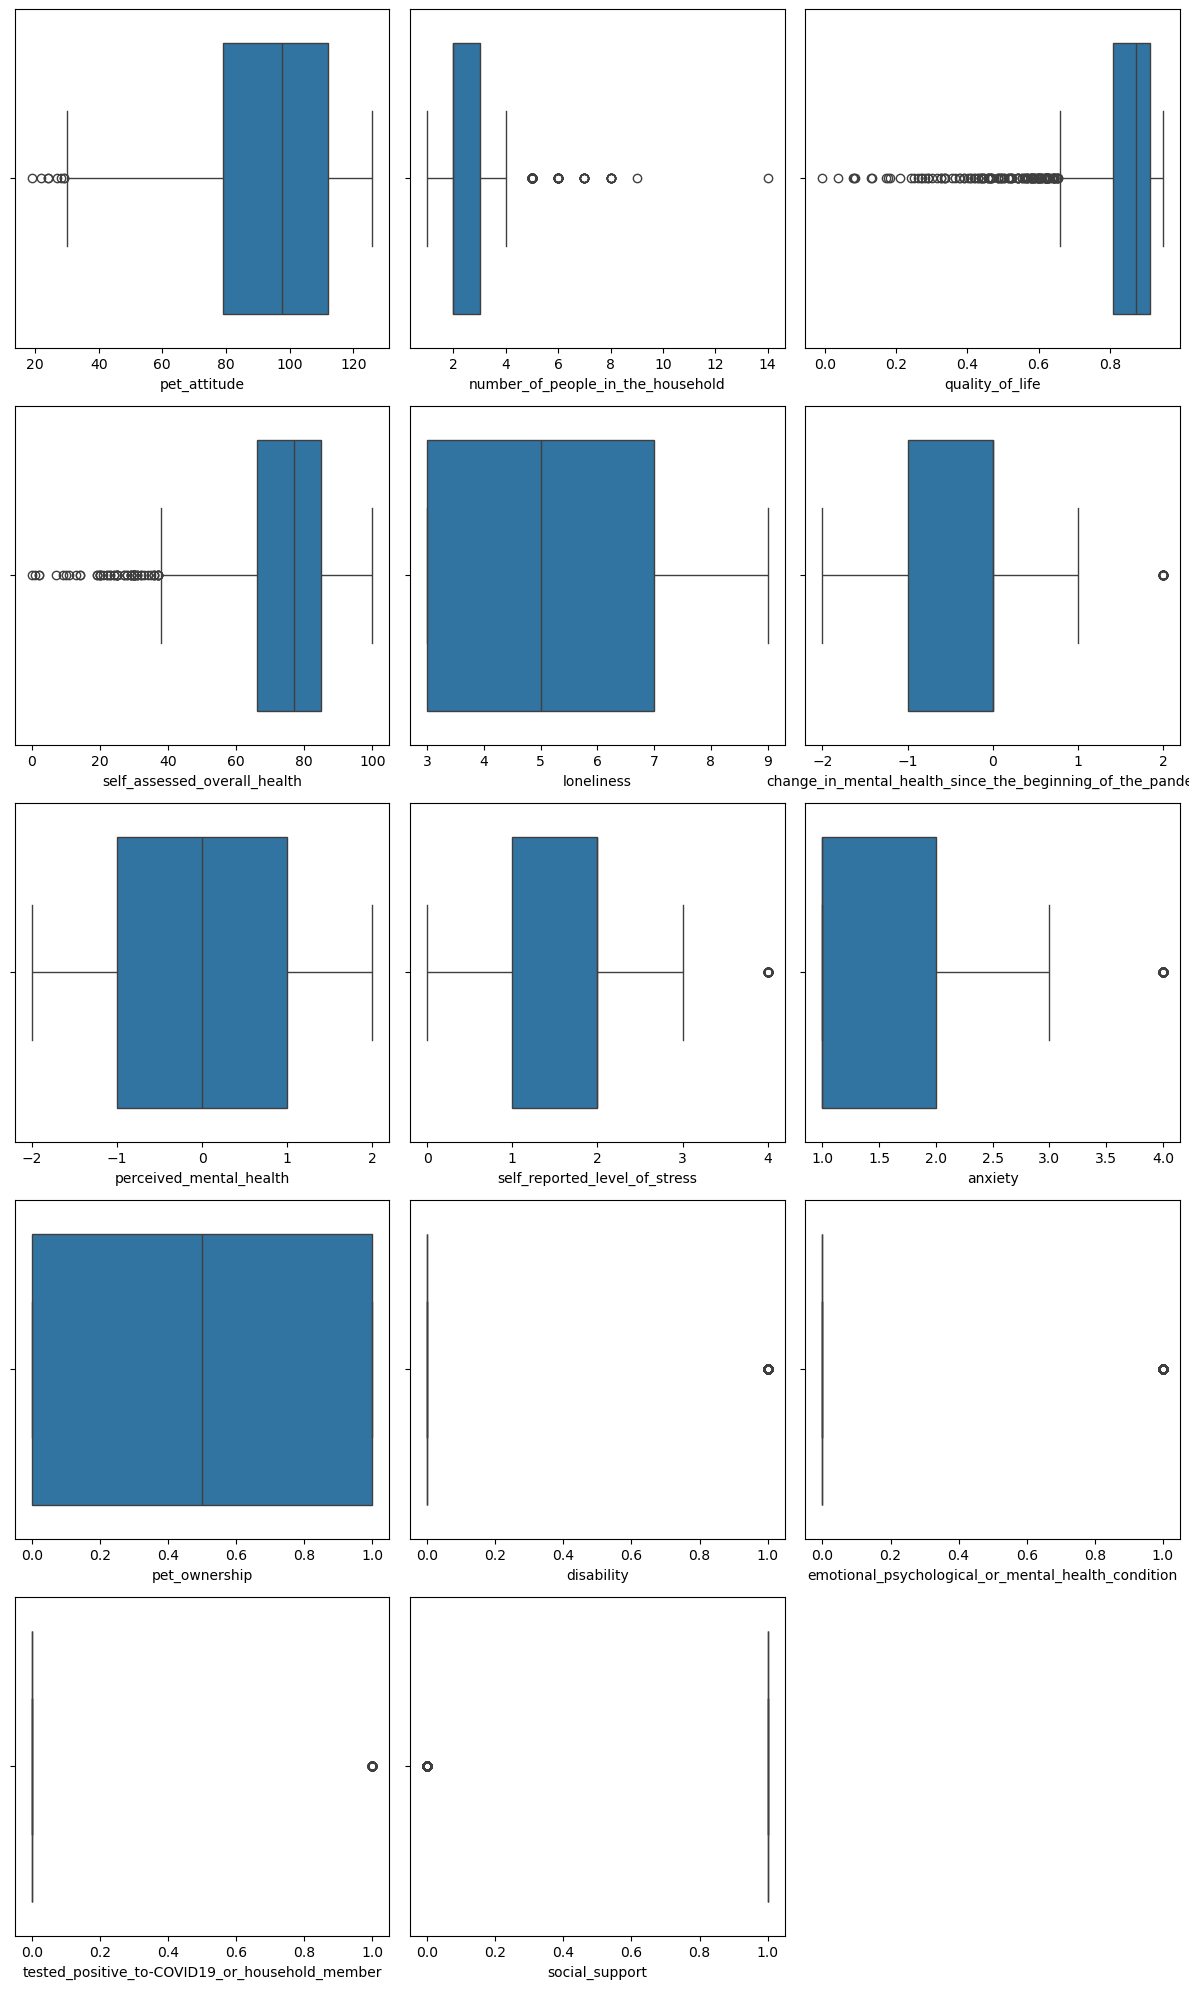

In [18]:
#box plot for numeric data
num_cols = 3
num_rows = int(len(modified_numeric_data_cols)/num_cols +1)
fig, axes = plt.subplots(num_rows, 3, figsize=(12, 20))
count = 0
for i,var in enumerate(modified_numeric_data_cols):
    sns.boxplot(data = data_modified[var], ax=axes[count,i%3], orient ='h')
    if(i%3==2):
        count+=1
fig.delaxes(axes[4][2])
plt.tight_layout()

In [19]:
numeric_data_cols

['pet_attitude',
 'number_of_people_in_the_household',
 'quality_of_life',
 'self_assessed_overall_health',
 'loneliness']

In [20]:
#count number of outliers and
#quantile description of numeric data including new numeric data
threshold = 1.5
numeric_outliers_dict = {}

for var in numeric_data_cols:
    q1 = data[var].quantile(0.25)
    q2 = data[var].quantile(0.5)
    q3 = data[var].quantile(0.75)
    
    print(f'quantile data for {var}')
    print(f'q1: {q1}')
    print(f'median: {q2}')
    print(f'q3: {q3}')
    
    iqr = q3 - q1
    outliers = data_modified[(data[var] < q1 - threshold * iqr) | (data[var] > q3 + threshold * iqr)]
    numeric_outliers_dict[var] = outliers
    print('\n')

quantile data for pet_attitude
q1: 79.0
median: 97.5
q3: 112.0


quantile data for number_of_people_in_the_household
q1: 2.0
median: 2.0
q3: 3.0


quantile data for quality_of_life
q1: 0.809870306
median: 0.872414944
q3: 0.911329469


quantile data for self_assessed_overall_health
q1: 66.0
median: 77.0
q3: 85.0


quantile data for loneliness
q1: 3.0
median: 5.0
q3: 7.0




In [21]:
merged_numeric_outliers_data = pd.concat([numeric_outliers_dict['pet_attitude'], numeric_outliers_dict['number_of_people_in_the_household'], numeric_outliers_dict['quality_of_life'],numeric_outliers_dict['self_assessed_overall_health'], numeric_outliers_dict['loneliness']]).drop_duplicates().reset_index(drop=True)

In [22]:
data_modified = pd.concat([data_modified, merged_numeric_outliers_data], ignore_index=True).drop_duplicates(keep=False)

In [23]:
#confirm outliers are dropped from data_modified
data_modified.shape

(1231, 23)

In [24]:
print('dropped outliers')
display(data_modified.describe())
print('original with outliers')
display(data.describe())

dropped outliers


pet_attitude  number_of_people_in_the_household  quality_of_life  \
count   1231.000000                        1231.000000      1231.000000   
mean      94.205524                           2.324939         0.875377   
std       20.451430                           0.995120         0.068442   
min       30.000000                           1.000000         0.658944   
25%       80.000000                           2.000000         0.834162   
50%       97.000000                           2.000000         0.891872   
75%      111.000000                           3.000000         0.948968   
max      126.000000                           4.000000         0.948968   

       self_assessed_overall_health   loneliness  
count                   1231.000000  1231.000000  
mean                      76.777417     5.114541  
std                       13.027832     1.876437  
min                       38.000000     3.000000  
25%                       70.000000     3.000000  
50%                       79.000000     5.000000  
75%                       86.000000     6.000000  
max                      100.000000     9.000000

original with outliers


pet_attitude  number_of_people_in_the_household  quality_of_life  \
count   1500.000000                          1500.0000      1500.000000   
mean      94.174000                             2.5700         0.838867   
std       21.055117                             1.3524         0.138681   
min       19.000000                             1.0000        -0.006337   
25%       79.000000                             2.0000         0.809870   
50%       97.500000                             2.0000         0.872415   
75%      112.000000                             3.0000         0.911329   
max      126.000000                            14.0000         0.948968   

       self_assessed_overall_health   loneliness  
count                   1500.000000  1500.000000  
mean                      73.447333     5.255333  
std                       16.971405     1.929582  
min                        0.000000     3.000000  
25%                       66.000000     3.000000  
50%                       77.000000     5.000000  
75%                       85.000000     7.000000  
max                      100.000000     9.000000

In [25]:
#since values mostly stay the same, 
#this might mean outliers were valid data points in way of the trend and not anomalies that should be removed
#but there is an anomaly for quality_of_life: the min value is negative which is not possible

In [26]:
data[data['quality_of_life'] < 0].count()
#there is only 1 true anomaly that needs to be removed

province_or_territory                                          1
region                                                         1
pet_ownership                                                  1
change_in_pet_ownership                                        1
pet_attitude                                                   1
age                                                            1
highest_level_of_education                                     1
ethnicity                                                      1
gender                                                         1
number_of_people_in_the_household                              1
yearly_income                                                  1
change_in_income_since_the_beginning_of_the_pandemic           1
disability                                                     1
emotional_psychological_or_mental_health_condition             1
change_in_mental_health_since_the_beginning_of_the_pandemic    1
tested_positive_to-COVID1

In [27]:
#remove true anomaly from all datasets
#'data_modified' contains trial and error data, while concrete changes are reflected in 'data'
data = data[data['quality_of_life']>=0]
data_modified = data_modified[data_modified['quality_of_life']>=0]

In [28]:
for key, value in numeric_outliers_dict.items():
    value = value[value['quality_of_life']>=0]
    print(f'num of outliers for {key}: {value.shape[0]} / {data_modified.shape[0]}')
    print(f'percentage of outliers for {key}: {round(value.shape[0]/data_modified.shape[0], 4)*100}%\n')
    display(value.describe())
print('total outliers')
display(merged_numeric_outliers_data.describe())

#usual case (q1 to q3) -- comparing dropped outliers dataset to outliers dataset
#pet_attitude: lower pet attitude
#quality_of_life: significantly lower quality of life (11.05% with lowest score dropped from original)
#self_assessed_overall_health: generally lower health

#only significant difference was in quality_of_life, reflecting that the outliers are
#a significant part of the demographic that cannot be removed

#all in all, the outliers with lower numbers made a generally insignificant difference
#while ones with higher numbers made a generally significant difference, as expected

num of outliers for pet_attitude: 8 / 1231
percentage of outliers for pet_attitude: 0.65%



pet_attitude  number_of_people_in_the_household  quality_of_life  \
count      8.000000                           8.000000         8.000000   
mean      25.250000                           2.500000         0.890426   
std        3.615443                           1.603567         0.054746   
min       19.000000                           1.000000         0.784964   
25%       23.500000                           1.000000         0.866223   
50%       25.500000                           2.000000         0.904604   
75%       28.250000                           4.000000         0.920739   
max       29.000000                           5.000000         0.948968   

       self_assessed_overall_health  loneliness  
count                      8.000000     8.00000  
mean                      67.500000     4.25000  
std                       17.443787     1.28174  
min                       37.000000     3.00000  
25%                       56.250000     3.75000  
50%                       76.000000     4.00000  
75%                       79.250000     4.25000  
max                       85.000000     7.00000

num of outliers for number_of_people_in_the_household: 117 / 1231
percentage of outliers for number_of_people_in_the_household: 9.5%



pet_attitude  number_of_people_in_the_household  quality_of_life  \
count    117.000000                         117.000000       117.000000   
mean      91.051282                           5.641026         0.830251   
std       21.309236                           1.213868         0.150940   
min       29.000000                           5.000000         0.271415   
25%       74.000000                           5.000000         0.803145   
50%       96.000000                           5.000000         0.873691   
75%      107.000000                           6.000000         0.911329   
max      126.000000                          14.000000         0.948968   

       self_assessed_overall_health  loneliness  
count                    117.000000  117.000000  
mean                      72.128205    5.435897  
std                       18.002173    1.975647  
min                       14.000000    3.000000  
25%                       63.000000    4.000000  
50%                       75.000000    6.000000  
75%                       85.000000    7.000000  
max                      100.000000    9.000000

num of outliers for quality_of_life: 136 / 1231
percentage of outliers for quality_of_life: 11.05%



pet_attitude  number_of_people_in_the_household  quality_of_life  \
count    136.000000                         136.000000       136.000000   
mean     100.264706                           2.566176         0.486665   
std       19.680498                           1.580915         0.148357   
min       33.000000                           1.000000         0.038425   
25%       86.000000                           1.000000         0.417433   
50%      106.000000                           2.000000         0.525129   
75%      115.250000                           3.000000         0.601505   
max      126.000000                           9.000000         0.655498   

       self_assessed_overall_health  loneliness  
count                    136.000000  136.000000  
mean                      50.632353    6.558824  
std                       20.427943    1.957946  
min                        0.000000    3.000000  
25%                       37.000000    5.000000  
50%                       50.000000    7.000000  
75%                       66.500000    8.250000  
max                       94.000000    9.000000

num of outliers for self_assessed_overall_health: 60 / 1231
percentage of outliers for self_assessed_overall_health: 4.87%



pet_attitude  number_of_people_in_the_household  quality_of_life  \
count     60.000000                          60.000000        60.000000   
mean      95.283333                           2.733333         0.578057   
std       23.011487                           1.482859         0.248097   
min       19.000000                           1.000000         0.038425   
25%       81.500000                           2.000000         0.383778   
50%      103.000000                           2.000000         0.599290   
75%      112.250000                           4.000000         0.790519   
max      126.000000                           8.000000         0.948968   

       self_assessed_overall_health  loneliness  
count                     60.000000   60.000000  
mean                      24.633333    6.433333  
std                        9.810003    2.287525  
min                        0.000000    3.000000  
25%                       20.000000    4.000000  
50%                       27.500000    7.000000  
75%                       31.000000    9.000000  
max                       37.000000    9.000000

num of outliers for loneliness: 0 / 1231
percentage of outliers for loneliness: 0.0%



pet_attitude  number_of_people_in_the_household  quality_of_life  \
count           0.0                                0.0              0.0   
mean            NaN                                NaN              NaN   
std             NaN                                NaN              NaN   
min             NaN                                NaN              NaN   
25%             NaN                                NaN              NaN   
50%             NaN                                NaN              NaN   
75%             NaN                                NaN              NaN   
max             NaN                                NaN              NaN   

       self_assessed_overall_health  loneliness  
count                           0.0         0.0  
mean                            NaN         NaN  
std                             NaN         NaN  
min                             NaN         NaN  
25%                             NaN         NaN  
50%                             NaN         NaN  
75%                             NaN         NaN  
max                             NaN         NaN

total outliers


pet_attitude  number_of_people_in_the_household  quality_of_life  \
count    269.000000                         269.000000       269.000000   
mean      94.029740                           3.691450         0.671790   
std       23.663197                           2.036413         0.227886   
min       19.000000                           1.000000        -0.006337   
25%       77.000000                           2.000000         0.523625   
50%      101.000000                           4.000000         0.651948   
75%      112.000000                           5.000000         0.873691   
max      126.000000                          14.000000         0.948968   

       self_assessed_overall_health  loneliness  
count                    269.000000  269.000000  
mean                      58.208178    5.899628  
std                       23.410065    2.039068  
min                        0.000000    3.000000  
25%                       40.000000    4.000000  
50%                       61.000000    6.000000  
75%                       78.000000    8.000000  
max                      100.000000    9.000000

### exploring scalable numeric variables

In [30]:
#exploring scalable numeric variables
scalable_data_cols

['change_in_mental_health_since_the_beginning_of_the_pandemic',
 'perceived_mental_health',
 'self_reported_level_of_stress',
 'anxiety']

### exploring binary numeric and categorical variables

In [32]:
#exploring binary numeric and categorical variables
print(f'binary numeric variables:\n{binary_data_cols}\nlength: {len(binary_data_cols)}\n')
print(f'true categorical variables:\n{categorical_data_cols}\nlength: {len(categorical_data_cols)}')

binary numeric variables:
['pet_ownership', 'disability', 'emotional_psychological_or_mental_health_condition', 'tested_positive_to-COVID19_or_household_member', 'social_support']
length: 5

true categorical variables:
['province_or_territory', 'region', 'change_in_pet_ownership', 'age', 'highest_level_of_education', 'ethnicity', 'gender', 'yearly_income', 'change_in_income_since_the_beginning_of_the_pandemic']
length: 9


In [33]:
binary_categorical_data = data_modified[binary_data_cols + categorical_data_cols]
binary_categorical_data

pet_ownership disability  \
0                0          0   
1                0          0   
4                1          0   
5                0          0   
7                1          0   
...            ...        ...   
1491             0          0   
1493             0          0   
1494             0          0   
1496             0          1   
1498             0          0   

     emotional_psychological_or_mental_health_condition  \
0                                                     0   
1                                                     0   
4                                                     0   
5                                                     0   
7                                                     0   
...                                                 ...   
1491                                                  0   
1493                                                  0   
1494                                                  0   
1496                                                  1   
1498                                                  0   

     tested_positive_to-COVID19_or_household_member social_support  \
0                                                 0              0   
1                                                 0              1   
4                                                 0              1   
5                                                 0              1   
7                                                 0              1   
...                                             ...            ...   
1491                                              0              1   
1493                                              0              1   
1494                                              0              0   
1496                                              0              1   
1498                                              0              1   

     province_or_territory    region change_in_pet_ownership    age  \
0              Nova Scotia  Atlantic                      No  18-24   
1                  Alberta  Prairies                      No  45-54   
4                  Ontario   Ontario                      No  18-24   
5                  Ontario   Ontario                      No  35-44   
7                  Ontario   Ontario                      No  55-64   
...                    ...       ...                     ...    ...   
1491               Ontario   Ontario                      No  35-44   
1493               Ontario   Ontario                      No  18-24   
1494         New Brunswick  Atlantic                      No  25-34   
1496               Ontario   Ontario                      No  25-34   
1498               Ontario   Ontario                      No    65+   

     highest_level_of_education   ethnicity gender         yearly_income  \
0                   High school      Others    Men       $19,999 or less   
1                       College  Caucasians    Men      $120,000 or more   
4                    University  Caucasians  Women       $60,000-$79,999   
5                    University  Caucasians  Women       $60,000-$79,999   
7                   High school  Caucasians  Women       $40,000-$59,000   
...                         ...         ...    ...                   ...   
1491                 University      Others    Men       $19,999 or less   
1493                High school      Others  Women  Prefer not to answer   
1494                 University  Caucasians  Women       $60,000-$79,999   
1496         Before high school  Caucasians  Women  Prefer not to answer   
1498                 University  Caucasians    Men     $100,000-$119,999   

     change_in_income_since_the_beginning_of_the_pandemic  
0                                           Do not know    
1                                             Decreased    
4                                             Decreased    
5                                       Stayed the s

In [34]:
binary_data_cols+categorical_data_cols

['pet_ownership',
 'disability',
 'emotional_psychological_or_mental_health_condition',
 'tested_positive_to-COVID19_or_household_member',
 'social_support',
 'province_or_territory',
 'region',
 'change_in_pet_ownership',
 'age',
 'highest_level_of_education',
 'ethnicity',
 'gender',
 'yearly_income',
 'change_in_income_since_the_beginning_of_the_pandemic']

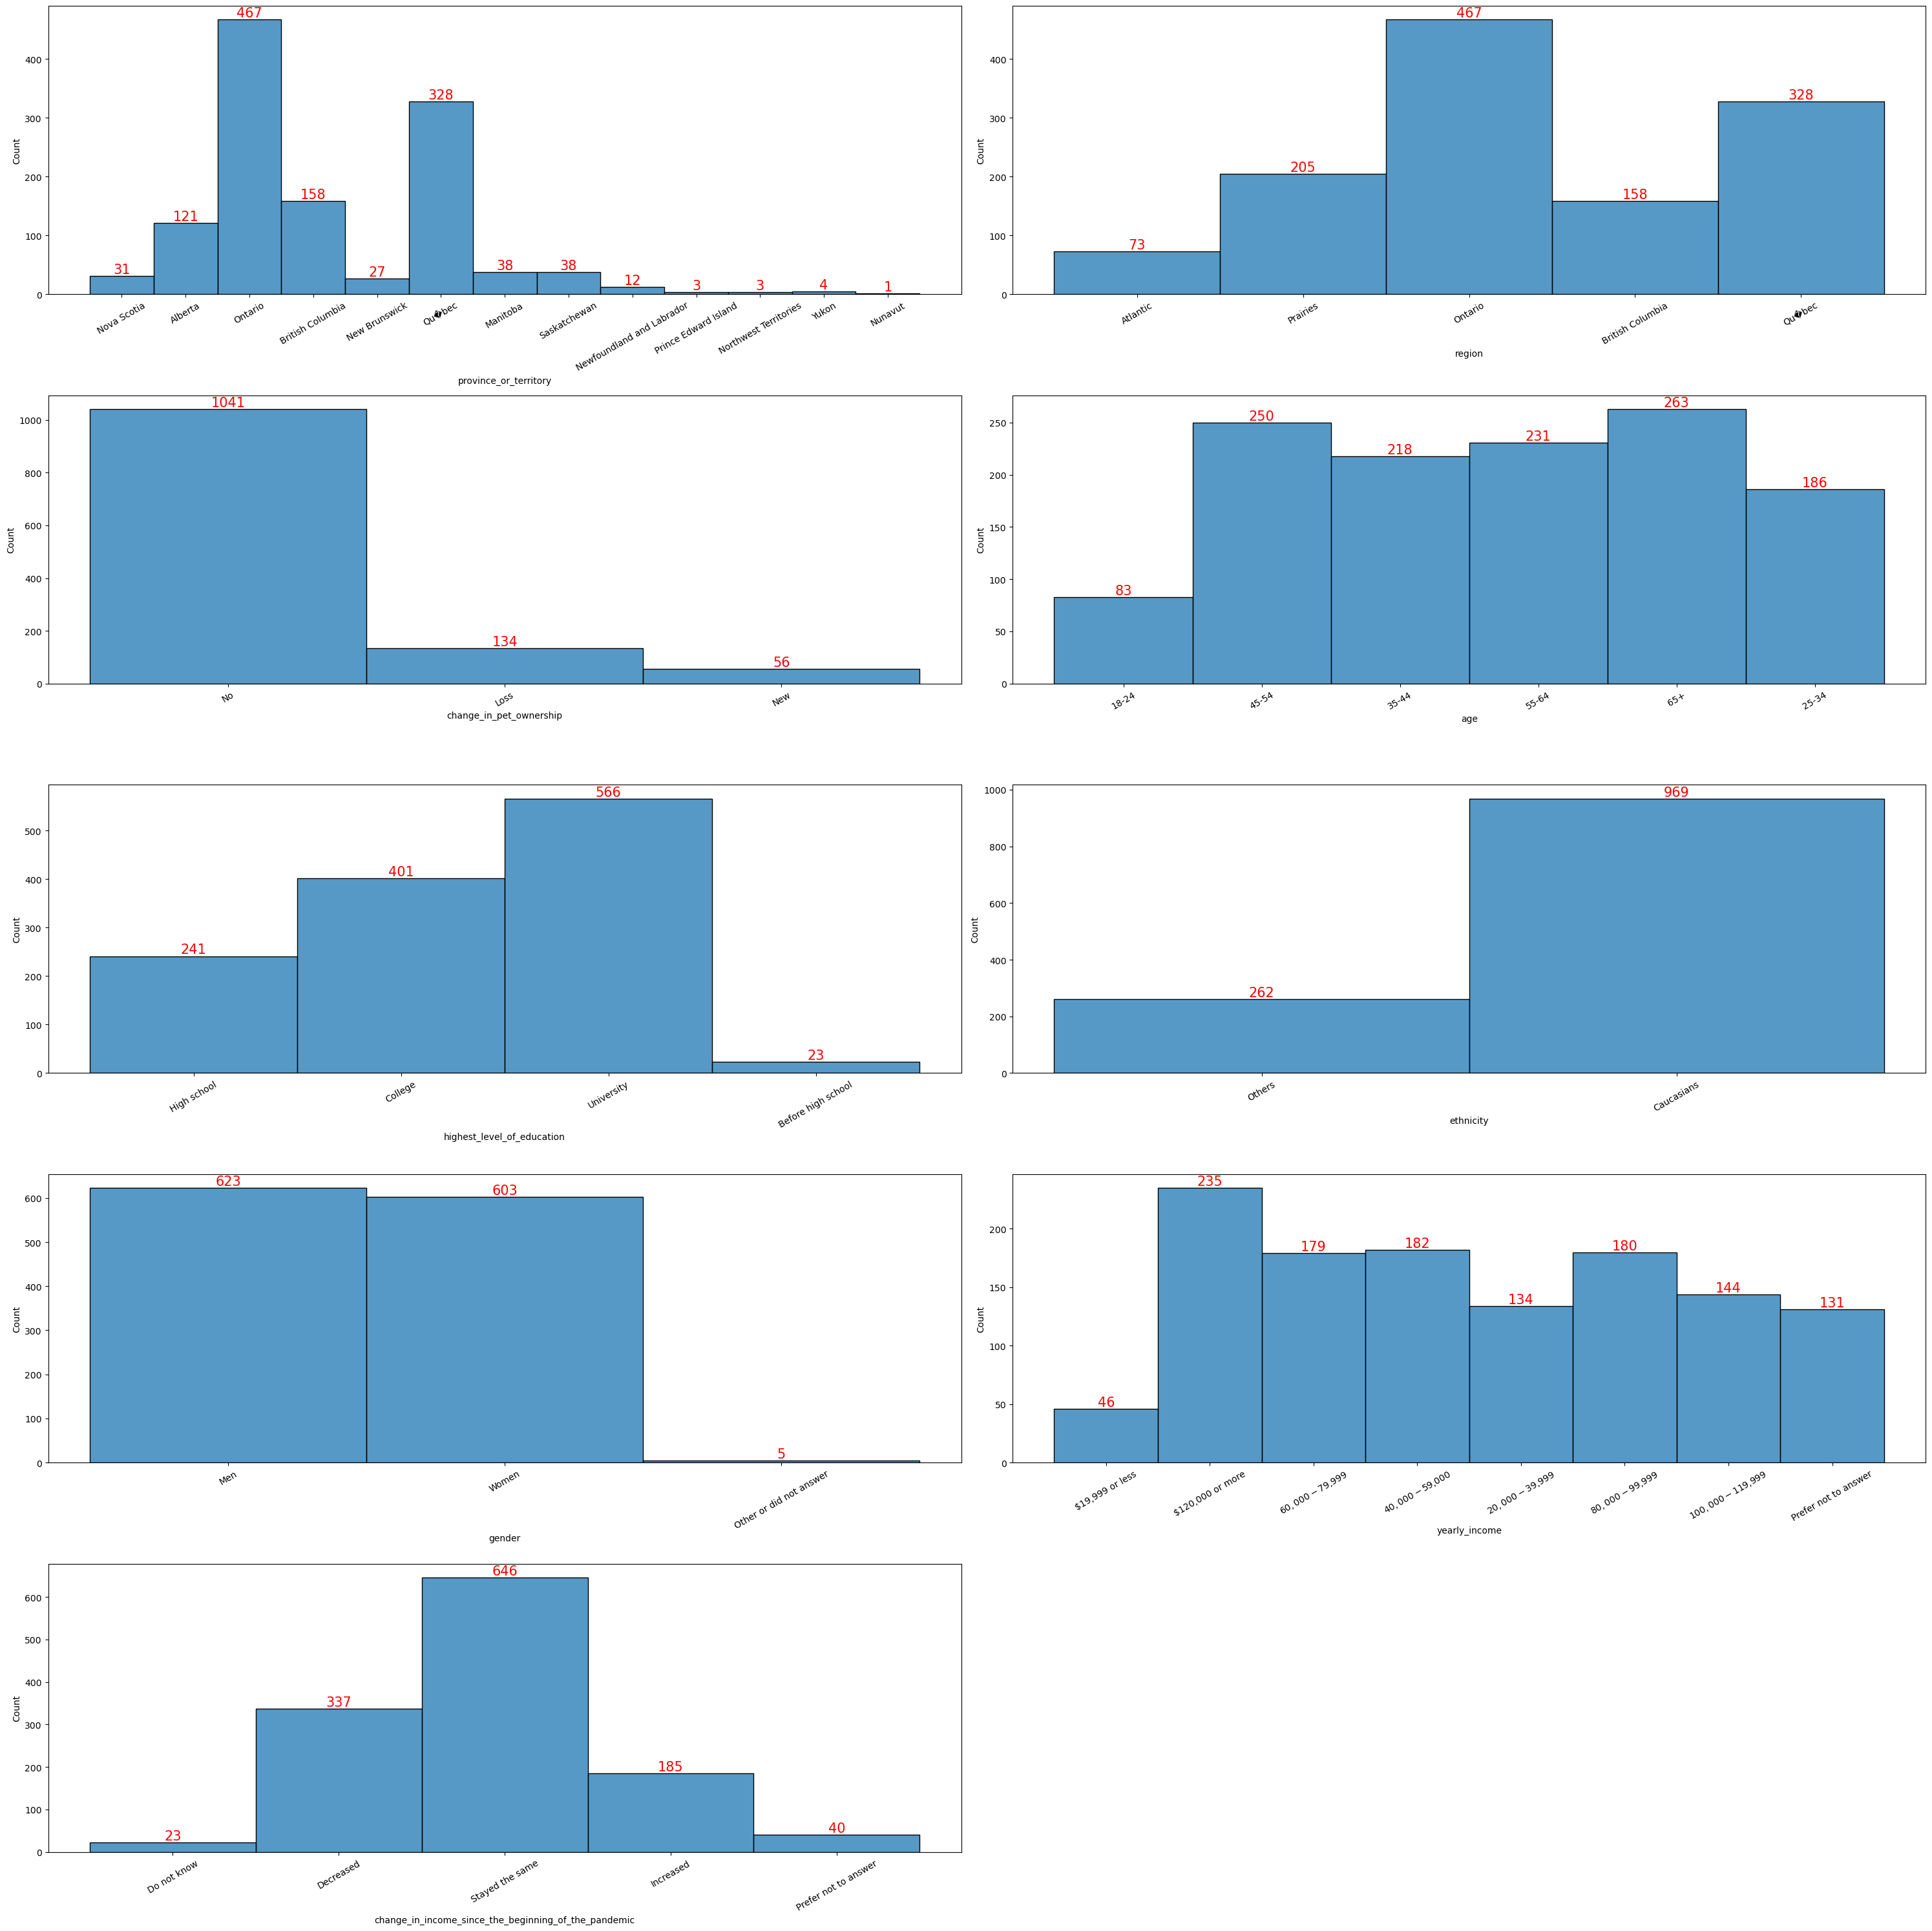

In [35]:
#bar charts to view their distribution (categorical data)
num_cols = 2
num_rows = int(len(categorical_data_cols)/num_cols+1)
fig, axes = plt.subplots(num_rows, num_cols, figsize=(30, 30))
count = 0
num_plot = 1
for i,var in enumerate(categorical_data_cols):
    sns.histplot(data=binary_categorical_data, x=var, ax=axes[count, i%num_cols], discrete=True)
    axes[count, i%num_cols].tick_params(axis='x', rotation=30)
    ax1 = plt.subplot(num_rows, num_cols, num_plot)
    for p in ax1.patches:
        ax1.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % round(p.get_height()), 
        fontsize=15, color='red', ha='center', va='bottom')
    if(i%num_cols==num_cols-1):
        count+=1
    num_plot+=1
plt.delaxes(axes[4][1])

plt.tight_layout()

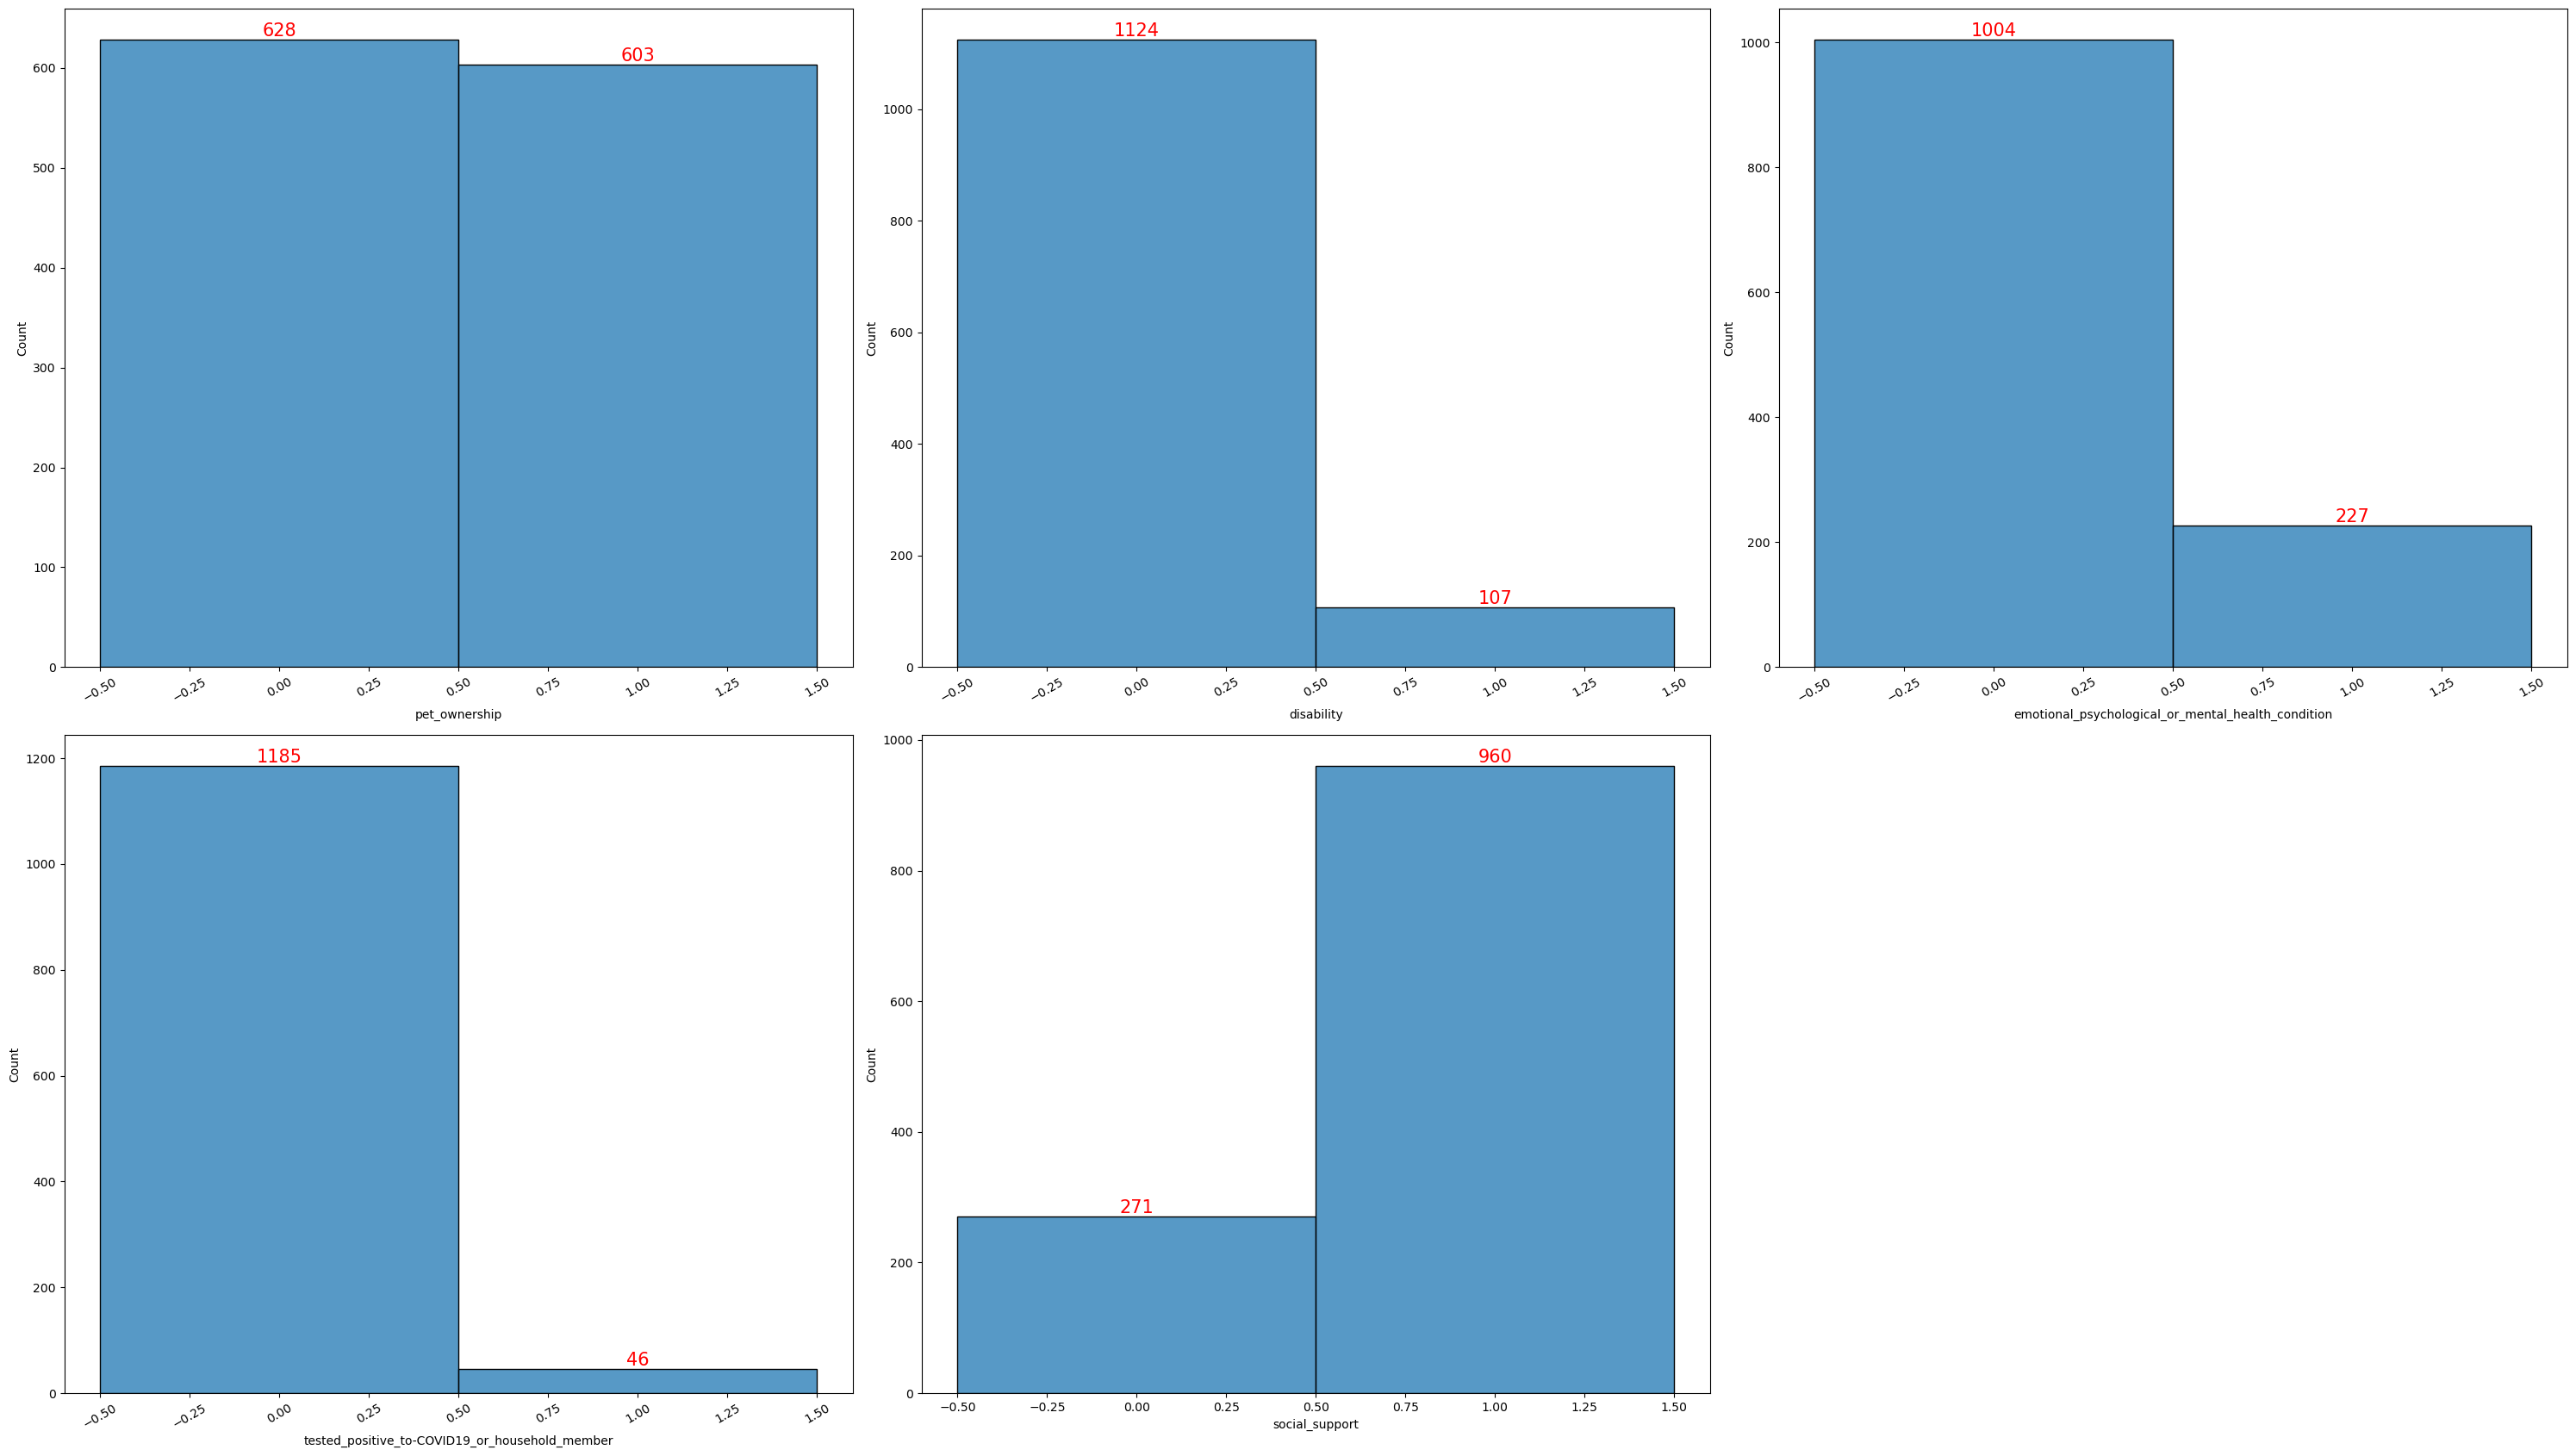

In [36]:
#bar charts to view their distribution (binary data)
num_cols = 3
num_rows = int(len(binary_data_cols)/num_cols+1)
fig, axes = plt.subplots(num_rows, num_cols, figsize=(30, 17))
count = 0
num_plot=1
for i,var in enumerate(binary_data_cols):
    sns.histplot(data=binary_categorical_data, x=var, ax=axes[count, i%num_cols], discrete=True)
    plt.xticks(rotation=30)
    ax1 = plt.subplot(num_rows, num_cols, num_plot)
    for p in ax1.patches:
        ax1.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % round(p.get_height()), 
        fontsize=15, color='red', ha='center', va='bottom')
    if(i%num_cols==num_cols-1):
        count+=1
    num_plot+=1
plt.delaxes(axes[1][2])

plt.tight_layout()

#equal distribution for pet ownership
#minority: 
# - with emotion, psychological or mental health conditions
# - with disability
# - tested +ve to covid or had a household member test +ve
# - without social support

### exploring mental health indicators

In [47]:
data.head()

province_or_territory    region pet_ownership change_in_pet_ownership  \
0                Nova Scotia  Atlantic             0                      No   
1                    Alberta  Prairies             0                      No   
2  Newfoundland and Labrador  Atlantic             0                      No   
3                    Ontario   Ontario             1                      No   
4                    Ontario   Ontario             1                      No   

   pet_attitude    age highest_level_of_education   ethnicity gender  \
0            72  18-24                High school      Others    Men   
1            69  45-54                    College  Caucasians    Men   
2            74  45-54                 University  Caucasians    Men   
3           116  45-54                High school  Caucasians    Men   
4            99  18-24                 University  Caucasians  Women   

   number_of_people_in_the_household  ...  \
0                                  4  ...   
1                                  4  ...   
2                                  2  ...   
3                                  5  ...   
4                                  2  ...   

  emotional_psychological_or_mental_health_condition  \
0                                                  0   
1                                                  0   
2                                                  1   
3                                                  0   
4                                                  0   

  change_in_mental_health_since_the_beginning_of_the_pandemic  \
0                                                 -1            
1                                                 -2            
2                                                 -1            
3                                                 -1            
4                                                  1            

  tested_positive_to-COVID19_or_household_member social_support  \
0                                              0              0   
1                                              0              1   
2                                              0              1   
3                                              0              1   
4                                              0              1   

  quality_of_life self_assessed_overall_health loneliness  \
0        0.829328                           80          8   
1        0.873691                           80          5   
2        0.437208                           41          5   
3        0.911329                           80          6   
4        0.860241                           78          4   

   perceived_mental_health  self_reported_level_of_stress  anxiety  
0                        0                              1        3  
1                       -1                              1        1  
2                       -1                              1        2  
3                        1                              4        3  
4                        1                              2        1  

[5 rows x 23 columns]

In [49]:
mh_indicator_cols = ['change_in_mental_health_since_the_beginning_of_the_pandemic',
                    'perceived_mental_health',
                    'self_reported_level_of_stress',
                    'anxiety',
                    'loneliness']

mh_overall_cols = ['change_in_mental_health_since_the_beginning_of_the_pandemic',
                    'perceived_mental_health']

mh_component_cols = ['self_reported_level_of_stress',
                    'anxiety',
                    'loneliness']

In [53]:
mh_indicator_df = data[mh_indicator_cols]
mh_overall_df = data[mh_overall_cols]
mh_component_df = data[mh_component_cols]

mh_overall_df.value_counts()

change_in_mental_health_since_the_beginning_of_the_pandemic  perceived_mental_health
 0                                                            1                         284
                                                              0                         230
-1                                                            0                         223
                                                             -1                         211
 0                                                            2                         130
-1                                                            1                          76
 0                                                           -1                          60
-2                                                           -2                          48
                                                             -1                          44
 1                                                            0                        

In [ ]:
data_modified = data

In [55]:
def classifyMH(row):
    change = row['change_in_mental_health_since_the_beginning_of_the_pandemic'] 
    current = row['perceived_mental_health']
    before = current - change
    if current<0 and before<0:
        if change<0:
            return 'bad, worse, bad'
        elif change>0:
            return 'bad, better, bad'
        else:
            return 'bad, same, bad'
    elif current<0 and before==0:
        return 'fair, worse, bad'
    elif current<0 and before>0:
        return 'good, worse, bad'
    elif current==0 and before<0:
        return 'bad, better, fair'
    elif current==0 and before==0:
        return 'bad, same, bad'
    elif current==0 and before>0:
        return 'good, worse, fair'
    elif current>0 and before<0:
        return 'bad, better, good'
    elif current>0 and before==0:
        return 'fair, better, good'
    elif current>0 and before>0:
        if change<0:
            return 'good, worse, good'
        elif change>0:
            return 'good, better, good'
        else:
            return 'good, same, good'

In [57]:
data_modified['overall_mh'] = data_modified.apply(classifyMH, axis=1)

In [59]:
data_modified['overall_mh'].value_counts()

overall_mh
good, same, good      369
bad, same, bad        246
good, worse, fair     199
fair, worse, bad      179
good, worse, good      73
fair, better, good     37
good, worse, bad       36
bad, better, fair      32
bad, better, bad       21
bad, worse, bad        19
good, better, good     11
bad, better, good       9
Name: count, dtype: int64

### preparing sets of columns for exploration

In [432]:
#group variables
pet_cols = ['pet_ownership', 'change_in_pet_ownership', 'pet_attitude']
personal_attributes_cols = ['age', 'highest_level_of_education', 'ethnicity', 'gender', 
                            'emotional_psychological_or_mental_health_condition', 
                            'disability', 'self_assessed_overall_health']
geo_cols = ['province_or_territory', 'region']
income_cols = ['yearly_income','change_in_income_since_the_beginning_of_the_pandemic']
covid_cols = ['number_of_people_in_the_household', 'tested_positive_to-COVID19_or_household_member']
environment_cols = ['number_of_people_in_the_household', 'tested_positive_to-COVID19_or_household_member', 
                'social_support', 'quality_of_life']

### exploring pet-related variables

In [69]:
#preparing the dataset
pet_df = data_modified[pet_cols + ['overall_mh']]

In [73]:
pet_df['change_in_pet_ownership'].value_counts()

change_in_pet_ownership
No      1041
Loss     134
New       56
Name: count, dtype: int64

In [75]:
pet_df.head()

pet_ownership change_in_pet_ownership  pet_attitude          overall_mh
0             0                      No            72   good, worse, fair
1             0                      No            69    good, worse, bad
4             1                      No            99  fair, better, good
5             0                      No            98    good, same, good
7             1                      No           100      bad, same, bad

In [79]:
#categorising according to pet ownership and change in ownership
def classifyPetOwnership(row):
    own = row['pet_ownership']
    change = row['change_in_pet_ownership']
    att = row['pet_attitude']

    if own == 0 and change == 'No':
        return 'never owned a pet'
    elif own == 0 and change == 'Loss':
        return 'lost all pets during pandemic'
    elif own == 1 and change == 'No':
        return 'already owned a pet'
    elif own == 1 and change == 'Loss':
        return 'lost some pets during pandemic'
    elif own == 1 and change == 'New':
        return 'acquired a pet during pandemic'

In [85]:
#making pet attitude score valid only for pet owners
def absolutePetAttitude(row):
    own = row['pet_ownership']
    att = row['pet_attitude']

    absolute_att = own * att

    return absolute_att

In [859]:
pet_df['ownership_class'] = pet_df.apply(classifyPetOwnership, axis=1)
data_modified['ownership_class'] = data_modified.apply(classifyPetOwnership, axis=1)

/tmp/ipykernel_199412/2993109466.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pet_df['ownership_class'] = pet_df.apply(classifyPetOwnership, axis=1)


In [89]:
pet_df['absolute_attitude'] = pet_df.apply(absolutePetAttitude, axis=1)

/tmp/ipykernel_199412/3895794426.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pet_df['absolute_attitude'] = pet_df.apply(absolutePetAttitude, axis=1)


In [91]:
pet_df.head()

pet_ownership change_in_pet_ownership  pet_attitude          overall_mh  \
0             0                      No            72   good, worse, fair   
1             0                      No            69    good, worse, bad   
4             1                      No            99  fair, better, good   
5             0                      No            98    good, same, good   
7             1                      No           100      bad, same, bad   

       ownership_class  absolute_attitude  
0    never owned a pet                  0  
1    never owned a pet                  0  
4  already owned a pet                 99  
5    never owned a pet                  0  
7  already owned a pet                100

In [99]:
check = ['overall_mh', 'ownership_class']
for col in check:
    print(pet_df[col].value_counts())
    print('\n')

overall_mh
good, same, good      369
bad, same, bad        246
good, worse, fair     199
fair, worse, bad      179
good, worse, good      73
fair, better, good     37
good, worse, bad       36
bad, better, fair      32
bad, better, bad       21
bad, worse, bad        19
good, better, good     11
bad, better, good       9
Name: count, dtype: int64


ownership_class
never owned a pet                 585
already owned a pet               456
lost some pets during pandemic     91
acquired a pet during pandemic     56
lost all pets during pandemic      43
Name: count, dtype: int64




In [178]:
#stacked bar chart to show relationship between mh and ownership class
def plotStackedBar(df, index, col, ax=None, title=None):
    if ax is None:
        fig = plt.figure(figsize=(20,10))
        ax = fig.add_subplot(111)
    
    cross = pd.crosstab(index = df[index], columns = df[col], normalize='index').plot(kind='bar', stacked=True, ax=ax)
    
    if title:
        ax.set_title(title)
    
    plt.xticks(rotation=45)

    return ax

<Axes: xlabel='overall_mh'>

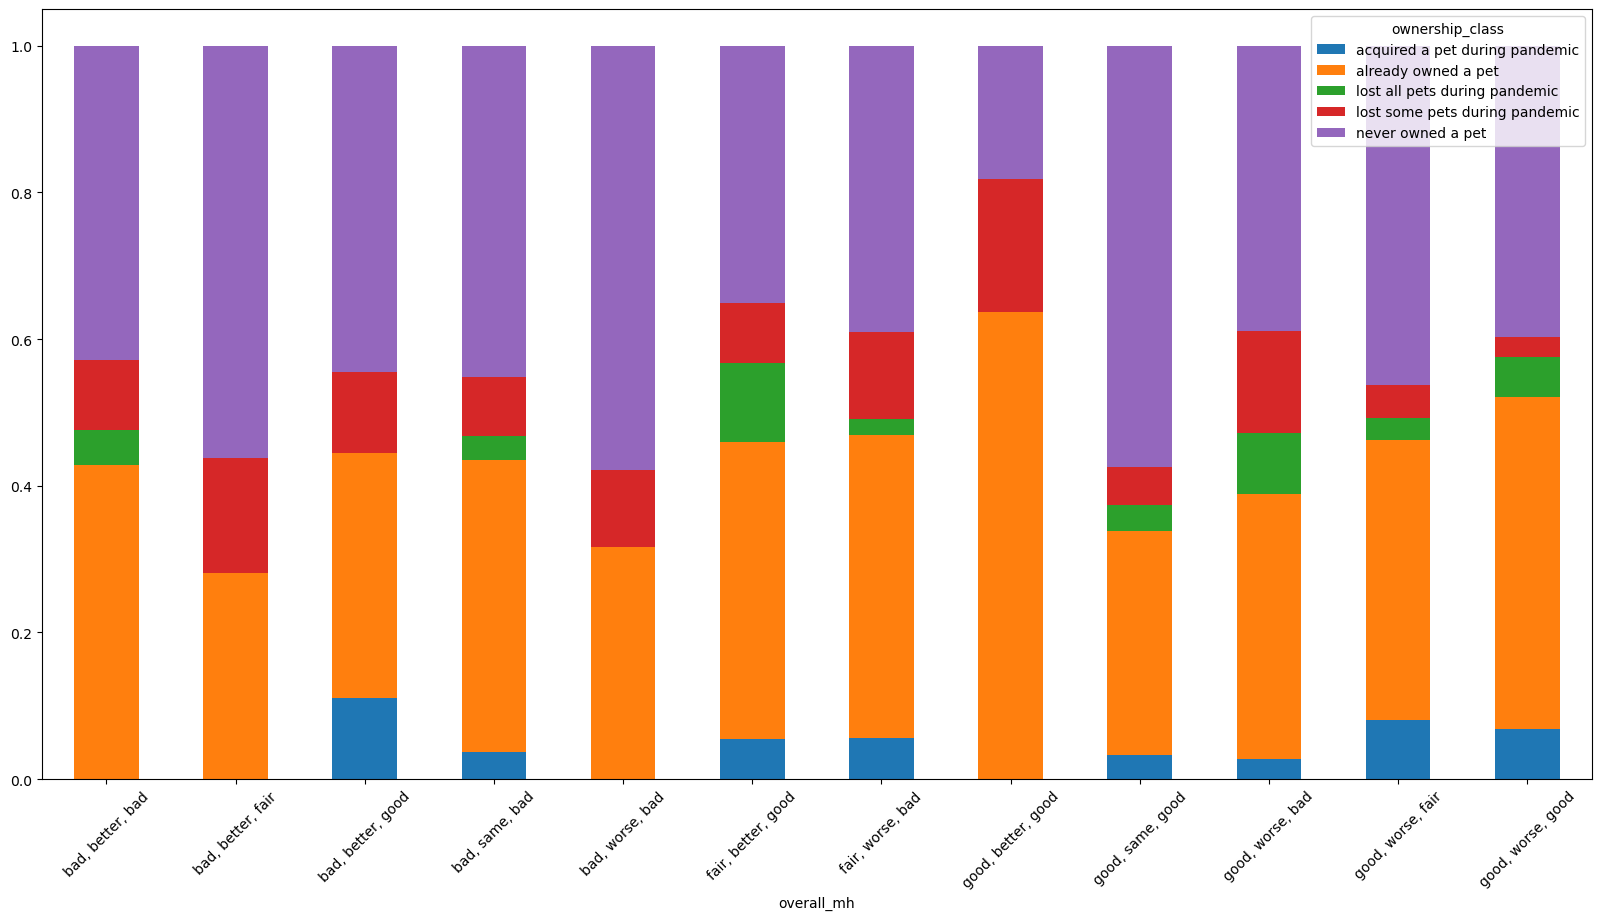

In [180]:
plotStackedBar(pet_df, 'overall_mh', 'ownership_class')

In [166]:
#interested in improvement
same_mh_cols = ['good, same, good', 'bad, same, bad']
worse_mh_cols = ['good, worse, fair','fair, worse, bad','good, worse, good', 'good, worse, bad', 'bad, worse, bad']
better_mh_cols = ['fair, better, good', 'bad, better, fair', 'bad, better, bad', 'good, better, good',' bad, better, good']

In [168]:
same_mh_pet_df = pet_df[pet_df['overall_mh'].isin(same_mh_cols)]
worse_mh_pet_df = pet_df[pet_df['overall_mh'].isin(worse_mh_cols)]
better_mh_pet_df = pet_df[pet_df['overall_mh'].isin(better_mh_cols)]

In [170]:
print(same_mh_pet_df['overall_mh'].value_counts())
print(worse_mh_pet_df['overall_mh'].value_counts())
print(better_mh_pet_df['overall_mh'].value_counts())

overall_mh
good, same, good    369
bad, same, bad      246
Name: count, dtype: int64
overall_mh
good, worse, fair    199
fair, worse, bad     179
good, worse, good     73
good, worse, bad      36
bad, worse, bad       19
Name: count, dtype: int64
overall_mh
fair, better, good    37
bad, better, fair     32
bad, better, bad      21
good, better, good    11
Name: count, dtype: int64


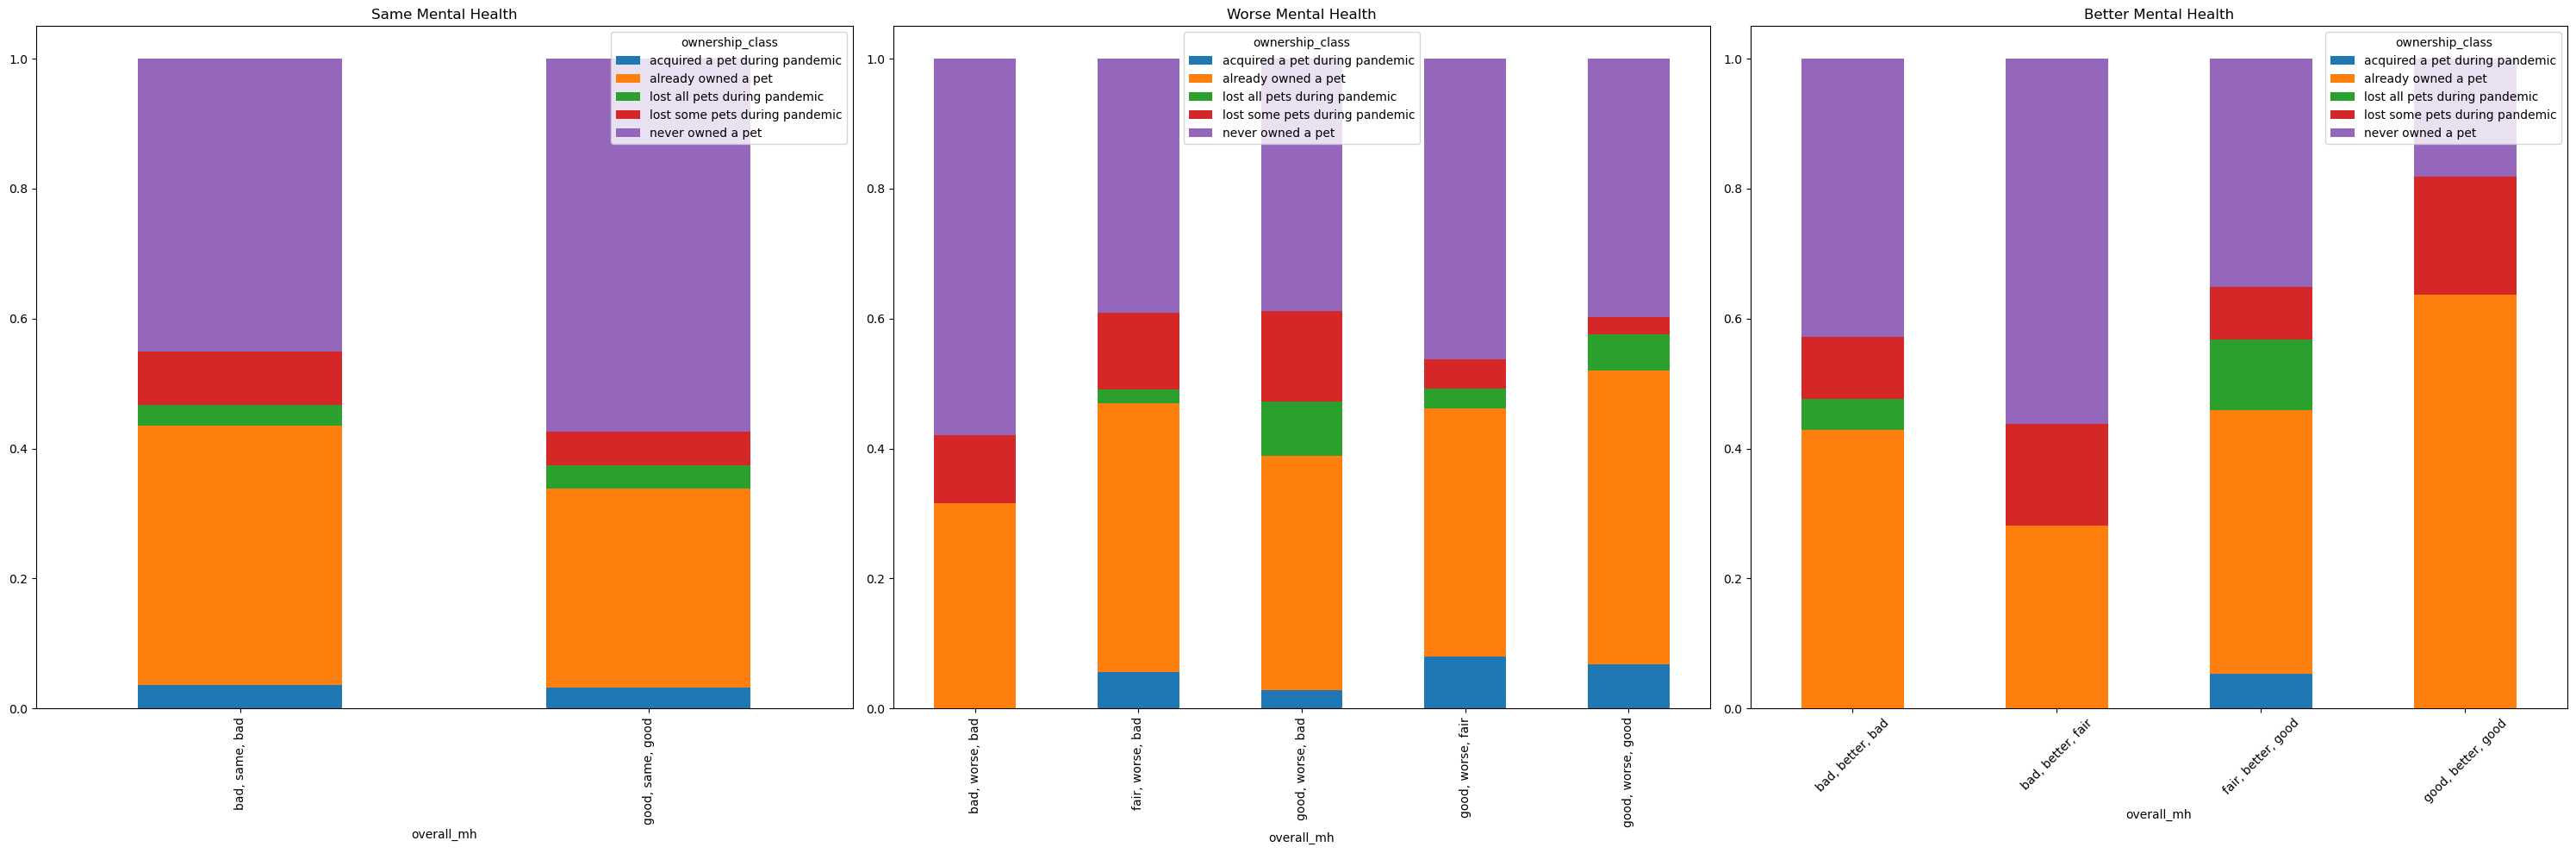

In [172]:
fig, axes = plt.subplots(1, 3, figsize=(30, 10))

plotStackedBar(same_mh_pet_df, 'overall_mh', 'ownership_class', axes[0], 'Same Mental Health')
plotStackedBar(worse_mh_pet_df, 'overall_mh', 'ownership_class', axes[1], 'Worse Mental Health')
plotStackedBar(better_mh_pet_df, 'overall_mh', 'ownership_class', axes[2], 'Better Mental Health')

plt.tight_layout()
plt.show()

#across all plots, there seems to be some correlation between already owning
#a pet before the pandemic and improved mental health during the pandemic
#however, there is no clear pattern as of now

In [308]:
le = preprocessing.LabelEncoder()
df = data_modified
df['overall_mh'] = le.fit_transform(df['overall_mh'])
df['pet_attitude']= le.fit_transform(df['pet_attitude'])

stats.pointbiserialr(df['overall_mh'], df['pet_attitude'])

#do not reject the null hypothesis; pet attitude and overall mental health are most likely not correlated

SignificanceResult(statistic=-0.005508460583229758, pvalue=0.8469019388693726)

### exploring other variables which may correlate to overall mental health

### exploring personal attribute variables

In [183]:
personal_attributes_cols
#other than self_assessed_overall_health, all other variables are categorical

['age',
 'highest_level_of_education',
 'ethnicity',
 'gender',
 'emotional_psychological_or_mental_health_condition',
 'disability',
 'self_assessed_overall_health']

In [222]:
personal_cat_cols = [x for x in personal_attributes_cols if x!='self_assessed_overall_health']

In [224]:
from scipy.stats import chi2_contingency

In [226]:
cross_personal_dict= {}
personal_count = 0
mh_count = 0

while(personal_count<len(personal_cat_cols)):
    key_name = personal_cat_cols[personal_count] + '_' + mh_indicator_cols[mh_count]
    print(key_name)
    cross_personal_dict[key_name] = pd.crosstab(data_modified[personal_cat_cols[personal_count]], data_modified[mh_indicator_cols[mh_count]])
    mh_count+=1
    if(mh_count==5):
        personal_count+=1
        mh_count=0

age_change_in_mental_health_since_the_beginning_of_the_pandemic
age_perceived_mental_health
age_self_reported_level_of_stress
age_anxiety
age_loneliness
highest_level_of_education_change_in_mental_health_since_the_beginning_of_the_pandemic
highest_level_of_education_perceived_mental_health
highest_level_of_education_self_reported_level_of_stress
highest_level_of_education_anxiety
highest_level_of_education_loneliness
ethnicity_change_in_mental_health_since_the_beginning_of_the_pandemic
ethnicity_perceived_mental_health
ethnicity_self_reported_level_of_stress
ethnicity_anxiety
ethnicity_loneliness
gender_change_in_mental_health_since_the_beginning_of_the_pandemic
gender_perceived_mental_health
gender_self_reported_level_of_stress
gender_anxiety
gender_loneliness
emotional_psychological_or_mental_health_condition_change_in_mental_health_since_the_beginning_of_the_pandemic
emotional_psychological_or_mental_health_condition_perceived_mental_health
emotional_psychological_or_mental_health_c

In [234]:
#null hypothesis: there is no association btw mh_indicator variable and personal_cat variable
#if p-value<0.05, there is significant association between the 2 variables

for key in cross_personal_dict.keys():
    print(key)
    chi2, p, dof, expected = chi2_contingency(cross_personal_dict[key])
    print("\nChi-square statistic:", chi2)
    print("P-value:", p)
    print("Degrees of freedom:", dof)
    print("Expected frequencies table:")
    print(expected)
    if p<0.05:
        print('significant')
    print('\n')

age_change_in_mental_health_since_the_beginning_of_the_pandemic

Chi-square statistic: 126.4418678683752
P-value: 1.806767002669955e-17
Degrees of freedom: 20
Expected frequencies table:
[[  4.24776604  29.86921202  41.46628757   5.93338749   1.48334687]
 [  9.51909017  66.93582453  92.92445167  13.2965069    3.32412673]
 [ 11.1567831   78.45166531 108.9114541   15.58407799   3.8960195 ]
 [ 12.79447604  89.96750609 124.89845654  17.87164907   4.46791227]
 [ 11.82209586  83.12997563 115.40617384  16.51340374   4.12835093]
 [ 13.45978879  94.64581641 131.39317628  18.80097482   4.7002437 ]]
significant


age_perceived_mental_health

Chi-square statistic: 117.07515275339313
P-value: 9.898824720415505e-16
Degrees of freedom: 20
Expected frequencies table:
[[ 2.83184403 17.80016247 28.72298944 24.20552396  9.4394801 ]
 [ 6.34606011 39.88952071 64.36718115 54.24370431 21.15353371]
 [ 7.4378554  46.75223396 75.44110479 63.57595451 24.79285134]
 [ 8.52965069 53.6149472  86.51502843 72.90820471

In [248]:
#significant associations:
#for age: change in mh, perceived mh, stress level, anxiety, loneliness
#for highest education level: none
#for ethnicity: none
#for gender: change in mh, perceived mh, stress level, anxiety, loneliness
#for emotional,psychological or mental health condition: change in mh, perceived mh, stress level, anxiety, loneliness
#for disability: change in mh, anxiety, loneliness

#we investigate these variables

age_significant_cols = mh_indicator_cols
gender_significant_cols = mh_indicator_cols
epm_significant_cols = mh_indicator_cols
disability_significant_cols = ['change_in_mental_health_since_the_beginning_of_the_pandemic', 'anxiety', 'loneliness']
significant_var = ['age', 'gender', 'emotional_psychological_or_mental_health_condition', 'disability']

In [246]:
import math

In [244]:
num_var = len(age_significant_cols + gender_significant_cols + epm_significant_cols + disability_significant_cols)
num_var

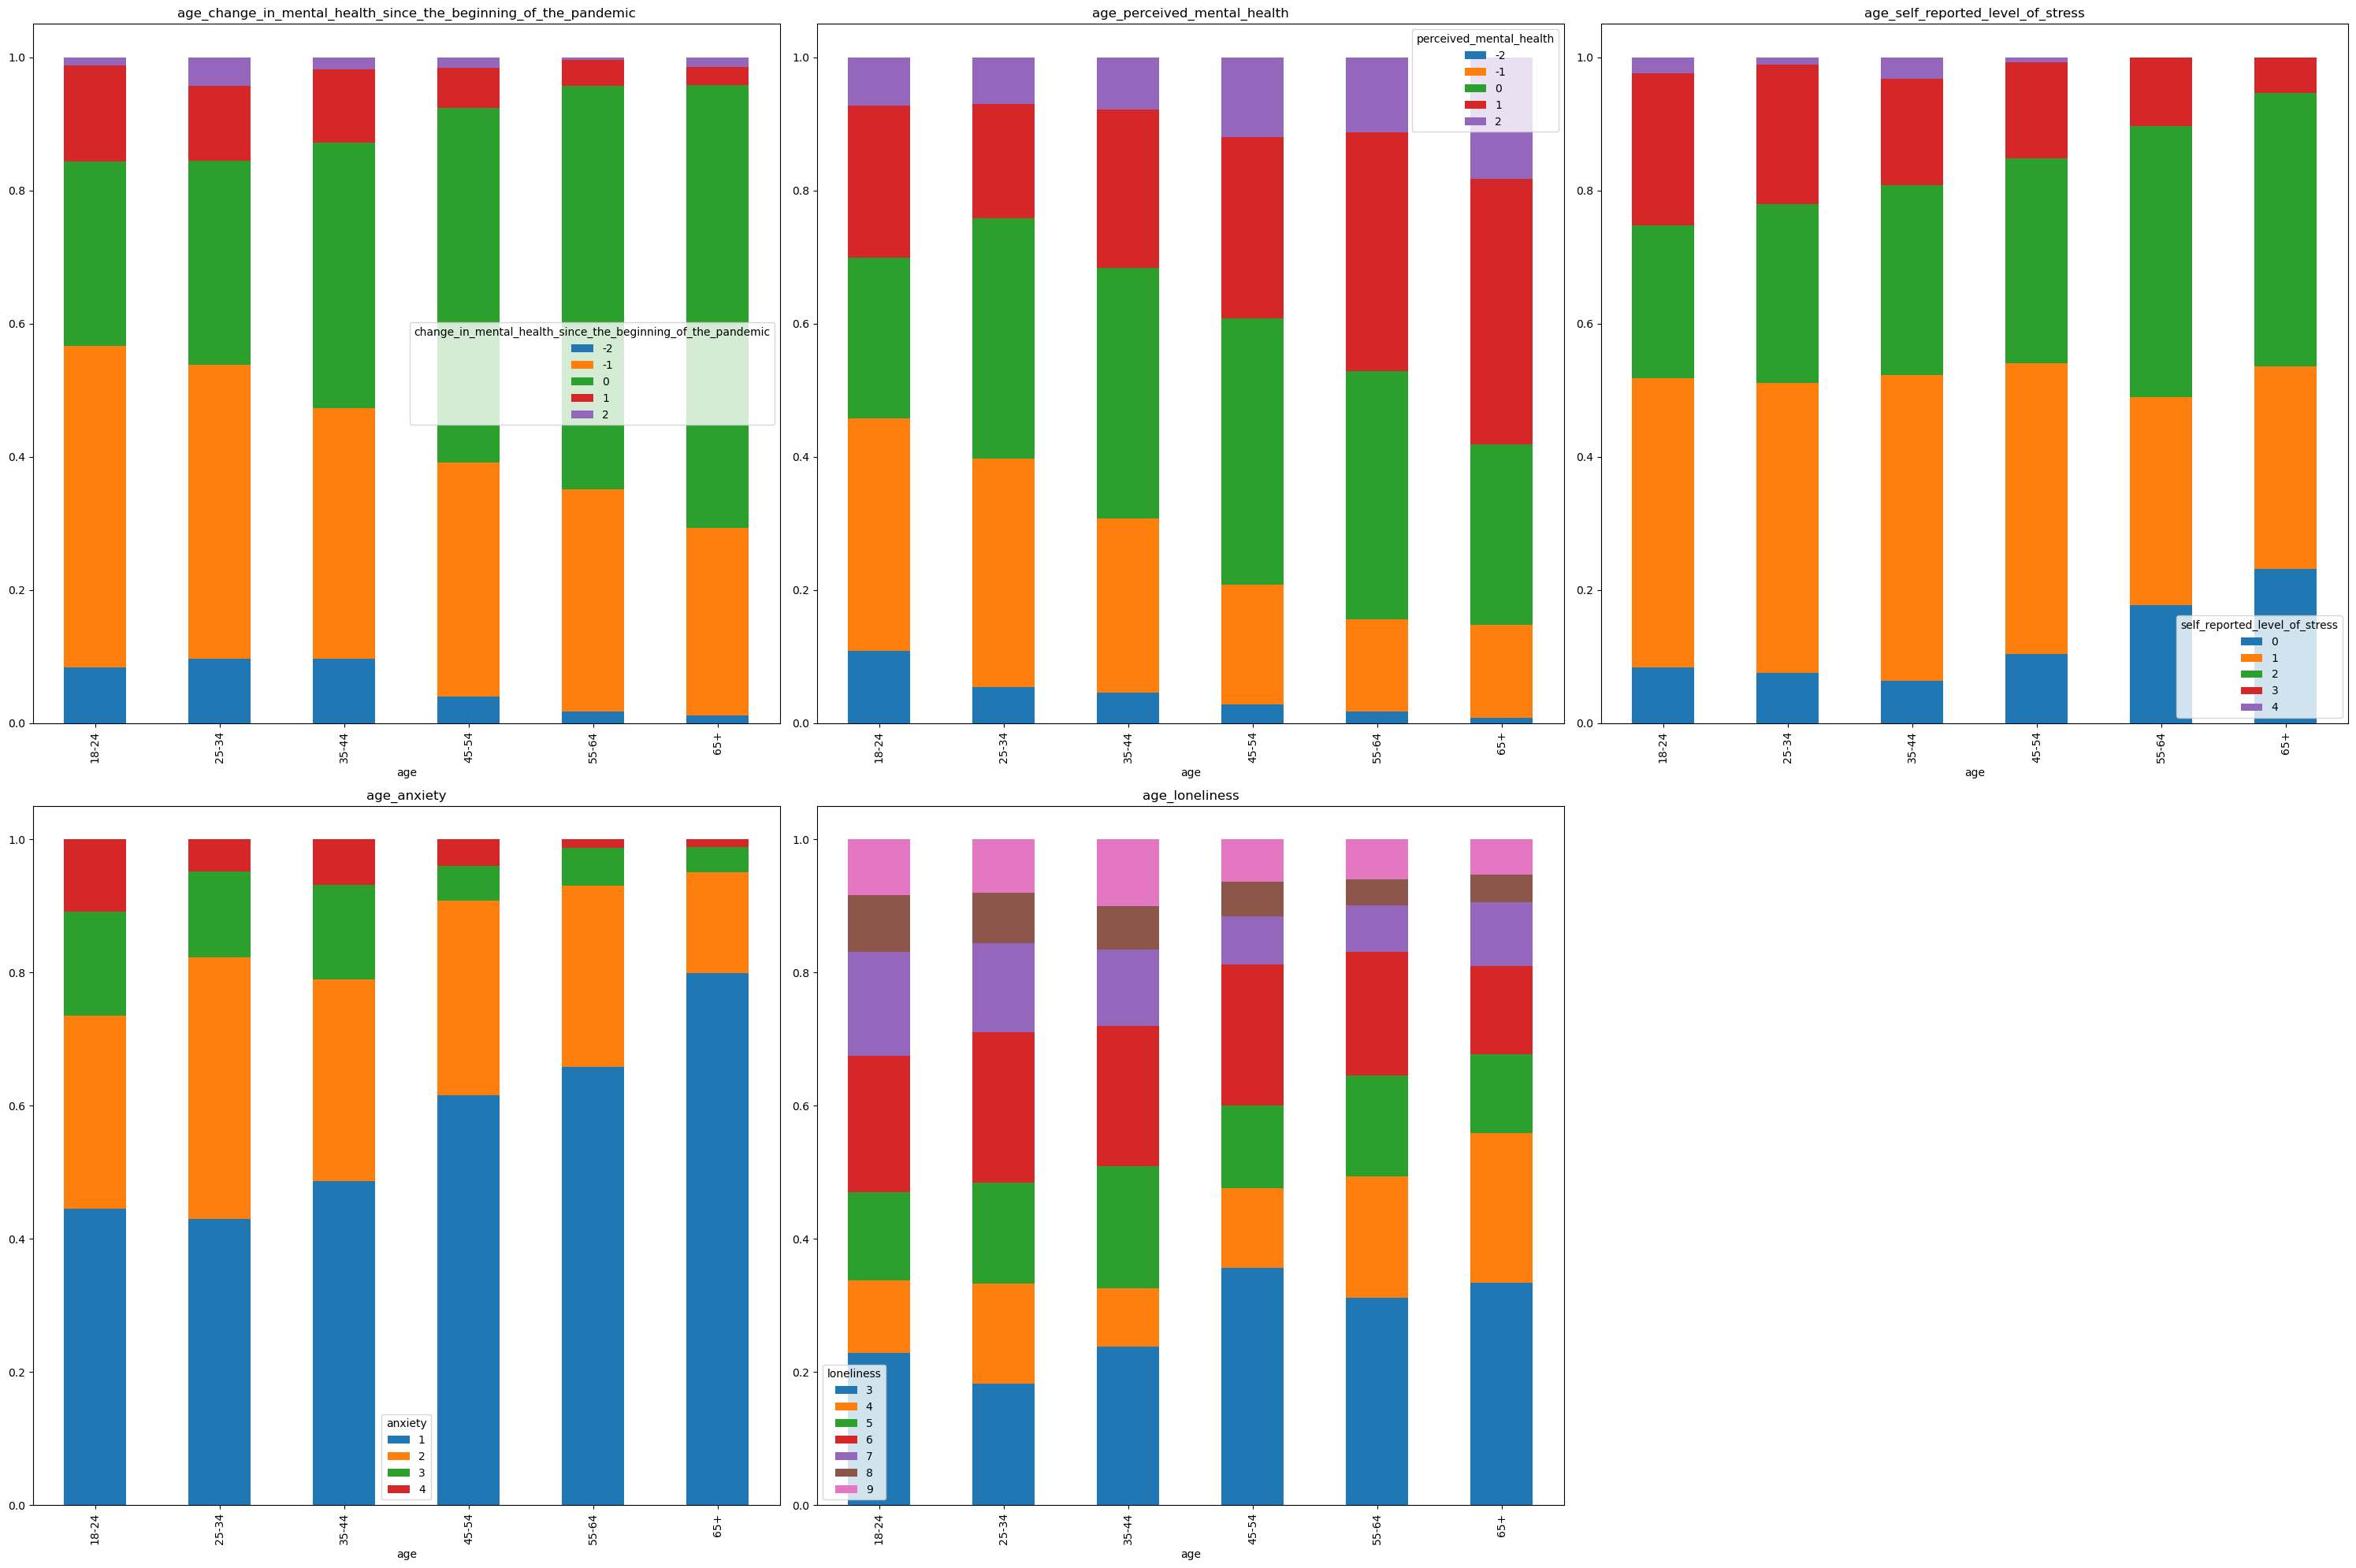

In [260]:
#age plots

fig, axes = plt.subplots(2, 3, figsize=(30, 20))
row_count = 0
col_count = 0

for i, var in enumerate(age_significant_cols):
    row_count = i // 3 
    col_count = i % 3   
    
    name = 'age' + '_' + var
    plotStackedBar(data_modified, 'age', var, axes[row_count, col_count], name)
    
    if i >= 5: 
        break

plt.delaxes(axes[1][2])

plt.tight_layout()
plt.show()

#anxiety lowers with age
#for a large majority, loneliness lowers with age; but for a minority, loneliness increases sharply
#change in mh and stress levels in the extremes decrease and stabilise near 0 with age
#mental health gets better with age

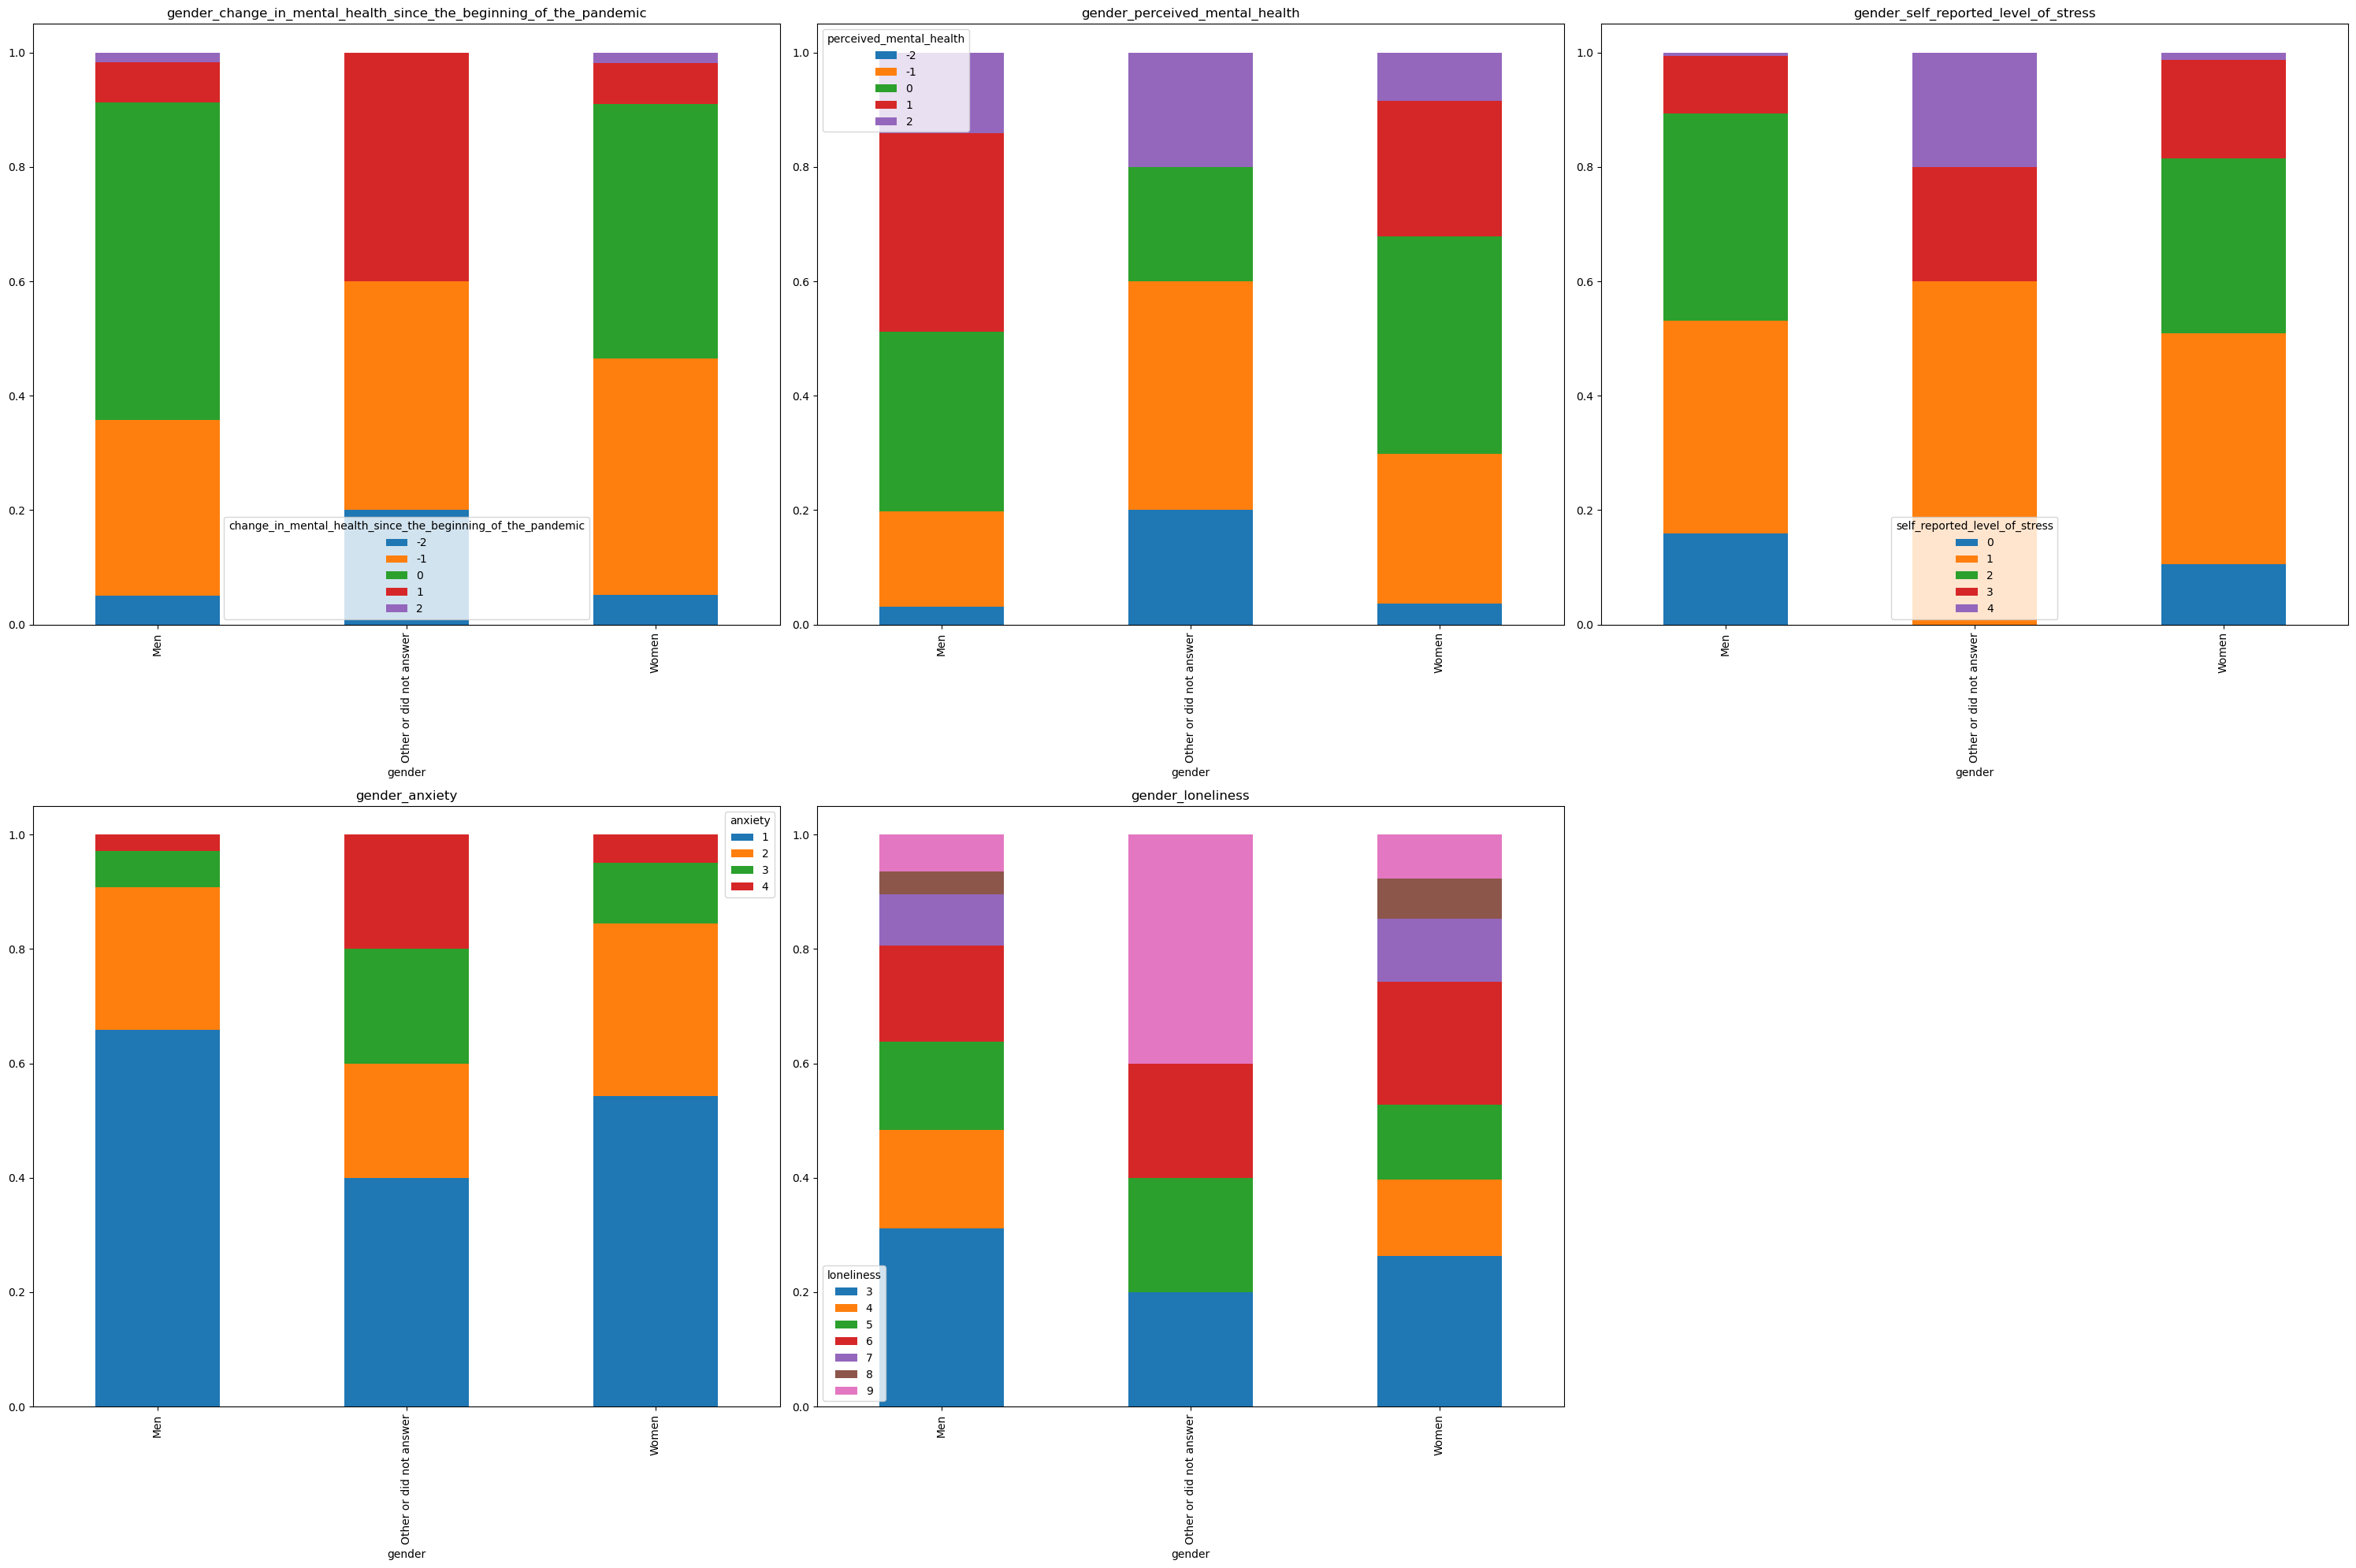

In [262]:
#gender plots

fig, axes = plt.subplots(2, 3, figsize=(30, 20))
row_count = 0
col_count = 0

for i, var in enumerate(gender_significant_cols):
    row_count = i // 3 
    col_count = i % 3   
    
    name = 'gender' + '_' + var
    plotStackedBar(data_modified, 'gender', var, axes[row_count, col_count], name)
    
    if i >= 5: 
        break

plt.delaxes(axes[1][2])

plt.tight_layout()
plt.show()

#men have lower anxiety
#women have slightly worse change in mental health; those with others or did not answer tend more towards the extremes
#men are slightly more stressed
#women have worse mental health; those with others or did not answer have even worse mental health
#those with others or did not answer are loneliner; women are slightly lonelier than men

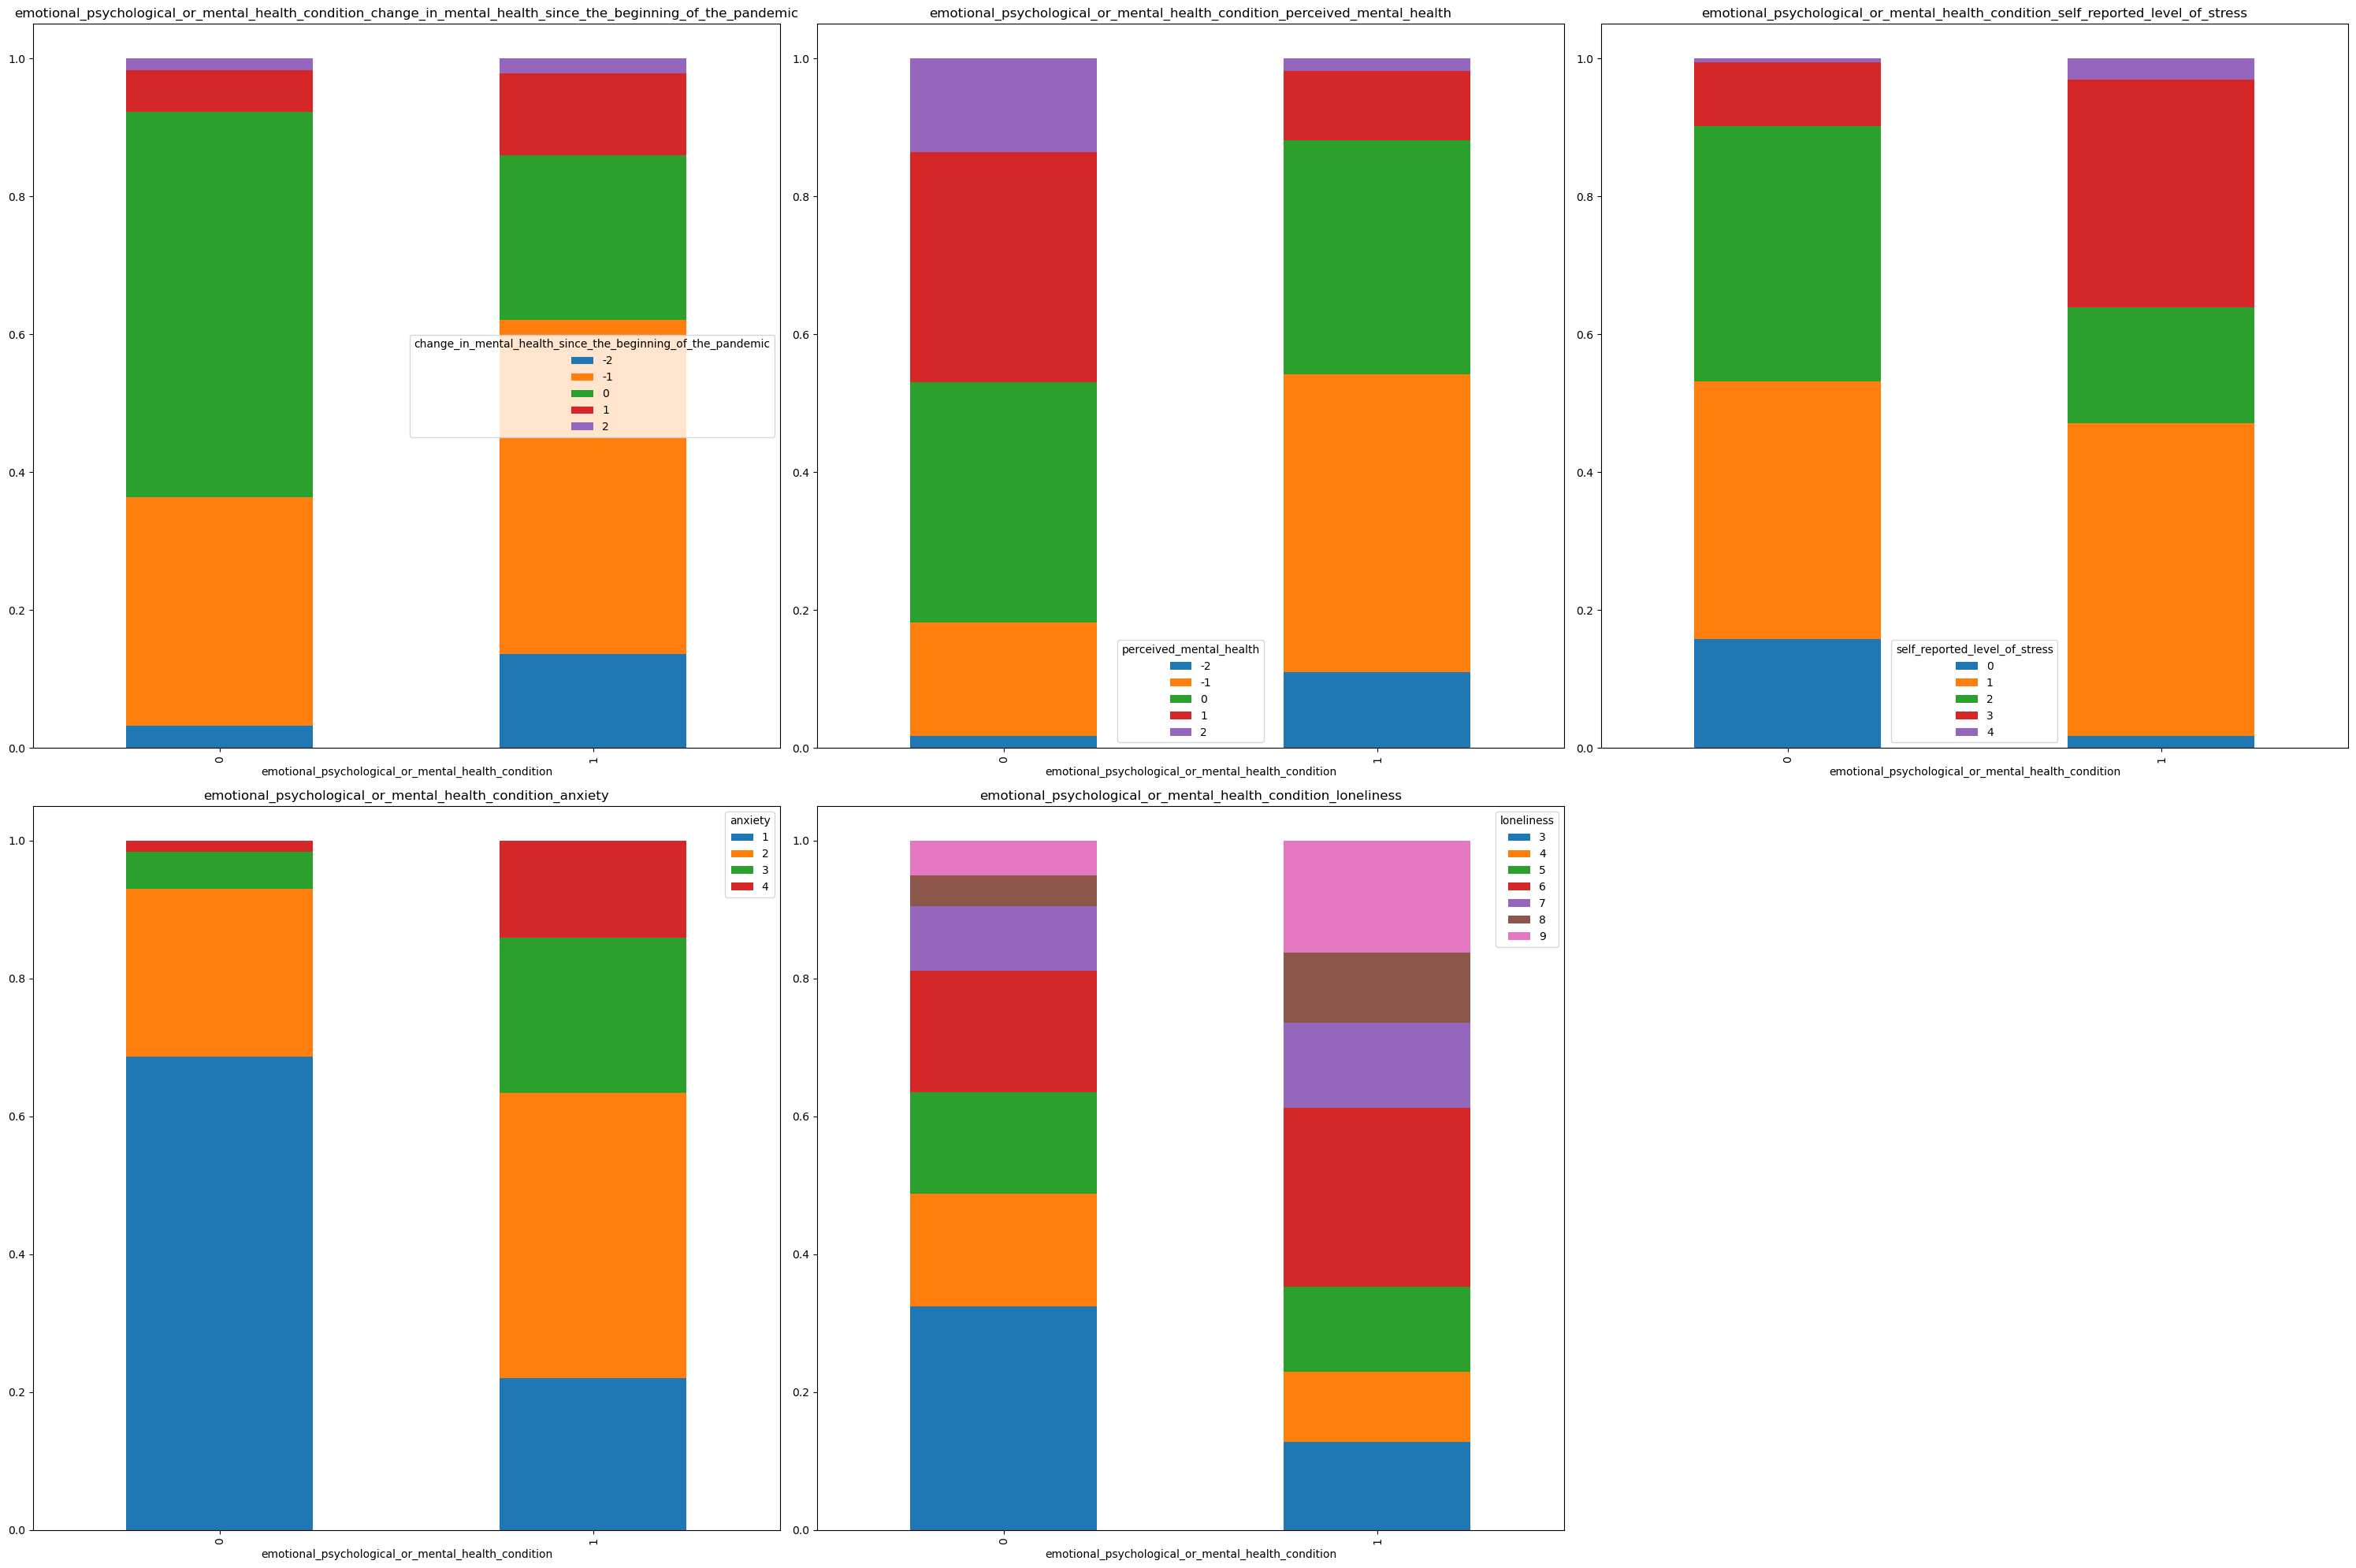

In [264]:
#emotional_psychological_or_mental_health_condition plots

fig, axes = plt.subplots(2, 3, figsize=(30, 20))
row_count = 0
col_count = 0

for i, var in enumerate(epm_significant_cols):
    row_count = i // 3 
    col_count = i % 3   
    
    name = 'emotional_psychological_or_mental_health_condition' + '_' + var
    plotStackedBar(data_modified, 'emotional_psychological_or_mental_health_condition', var, axes[row_count, col_count], name)
    
    if i >= 5: 
        break

plt.delaxes(axes[1][2])

plt.tight_layout()
plt.show()

#those with have worse mental health and change in mental health
#those with tend more towards the extremes for levels of stress
#those with have worse anxiety
#those with are lonelier

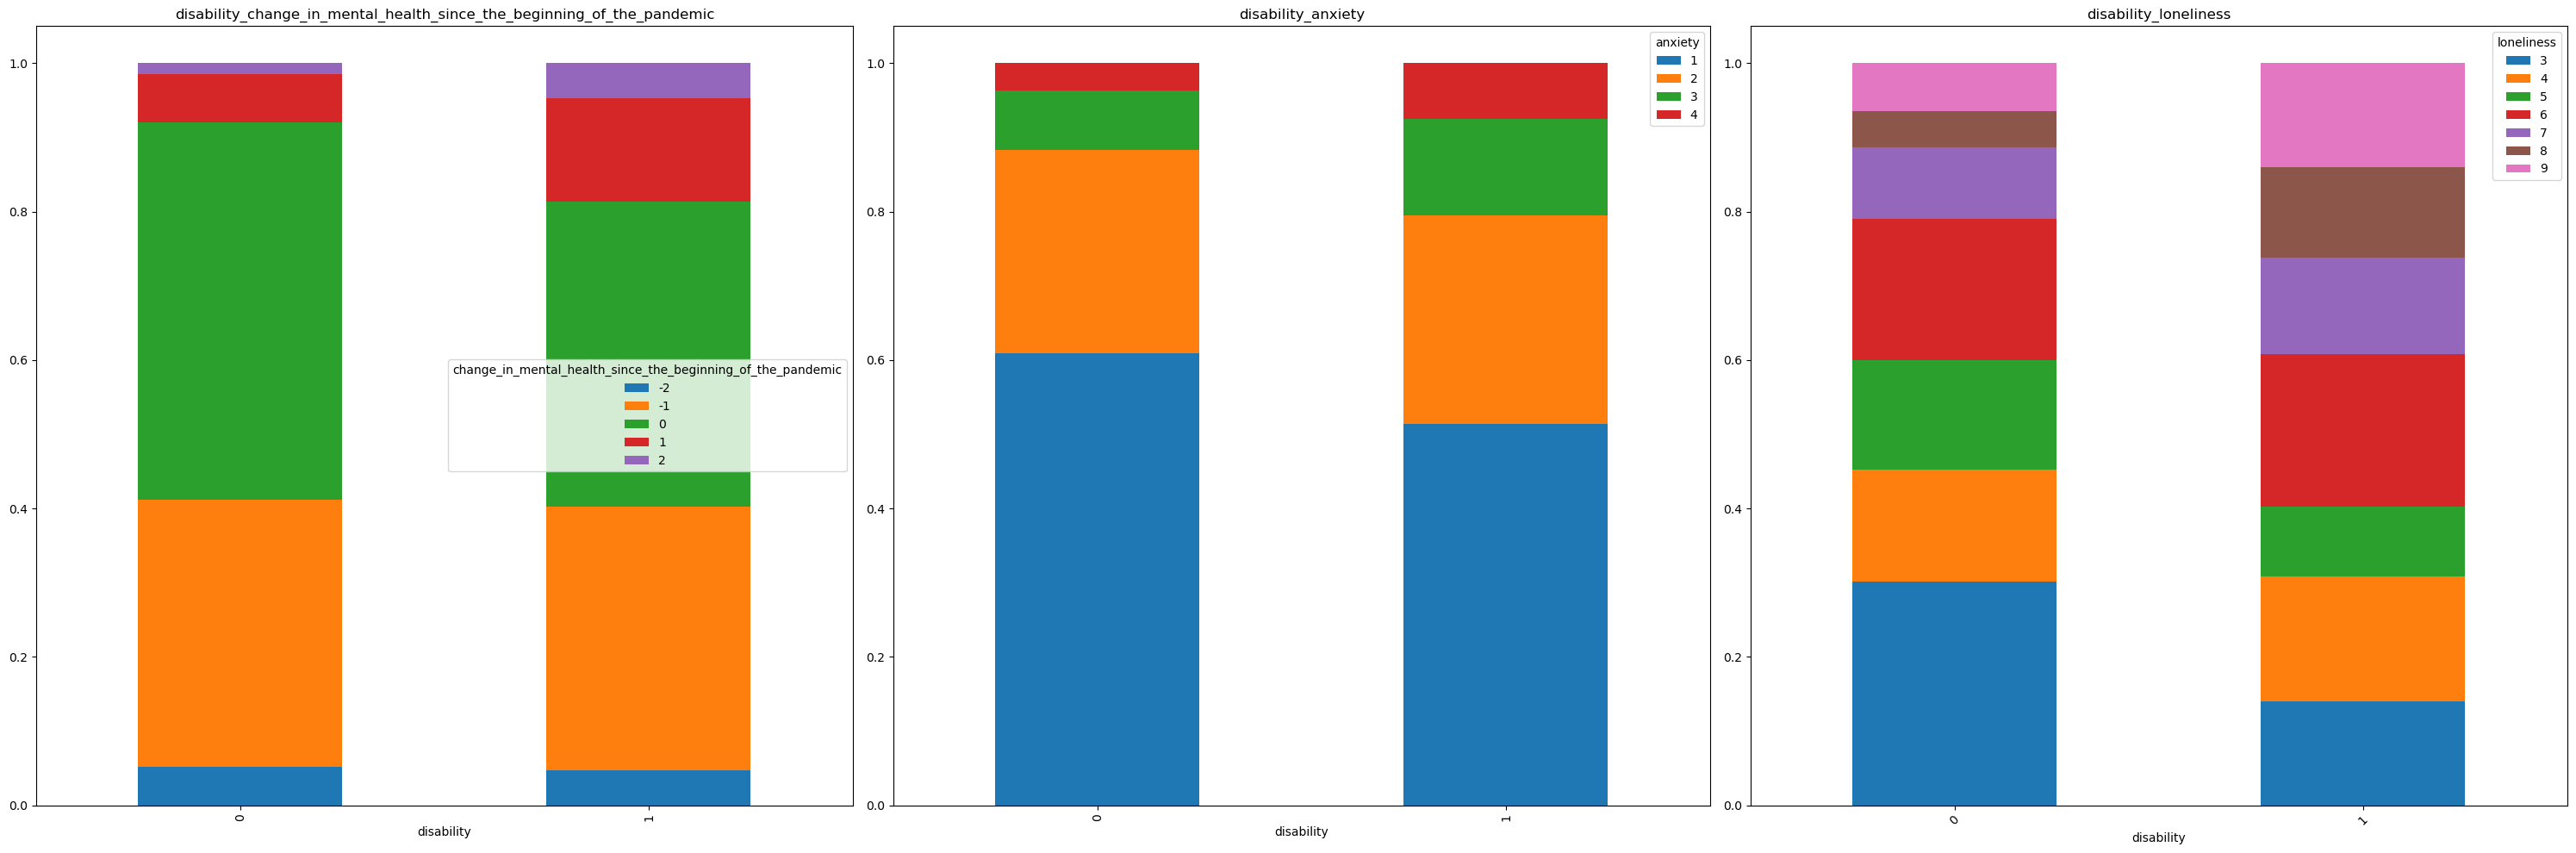

In [268]:
#disability plots

fig, axes = plt.subplots(1, 3, figsize=(30, 10))

for i, var in enumerate(disability_significant_cols):  
    name = 'disability' + '_' + var
    plotStackedBar(data_modified, 'disability', var, axes[i], name)


plt.tight_layout()
plt.show()

#those with have better mental health
#those with have higher anxiety
#those with are lonelier

#### thoughts behind observations
age:
- anxiety lowers with age
- for a large majority, loneliness lowers with age; but for a minority, loneliness increases sharply
- change in mh and stress levels in the extremes decrease and stabilise near 0 with age
- mental health gets better with age

=> those who are older may have better coping mechanisms

gender:
- men have lower anxiety
- women have slightly worse change in mental health; those with others or did not answer tend more towards the extremes
- men are slightly more stressed
- women have worse mental health; those with others or did not answer have even worse mental health
- those with others or did not answer are loneliner; women are slightly lonelier than men

=> those with others or did not answer may be marginalised members of society dealing with identity crises
=> men may have higher stress due to society emphasis on work or fail to identify it within

emotional, psychological or mental health conditions:
- those with have worse mental health and change in mental health
- those with tend more towards the extremes for levels of stress
- those with have worse anxiety
- those with are lonelier

=> these conditions may cause higher sensitivity to stressors and be more marginalised

disability
- those with have better mental health
- those with have higher anxiety
- those with are lonelier

=> contradictory findings

In [280]:
same_mh_disa_df = data_modified[data_modified['overall_mh'].isin(same_mh_cols)]
worse_mh_disa_df = data_modified[data_modified['overall_mh'].isin(worse_mh_cols)]
better_mh_disa_df = data_modified[data_modified['overall_mh'].isin(better_mh_cols)]

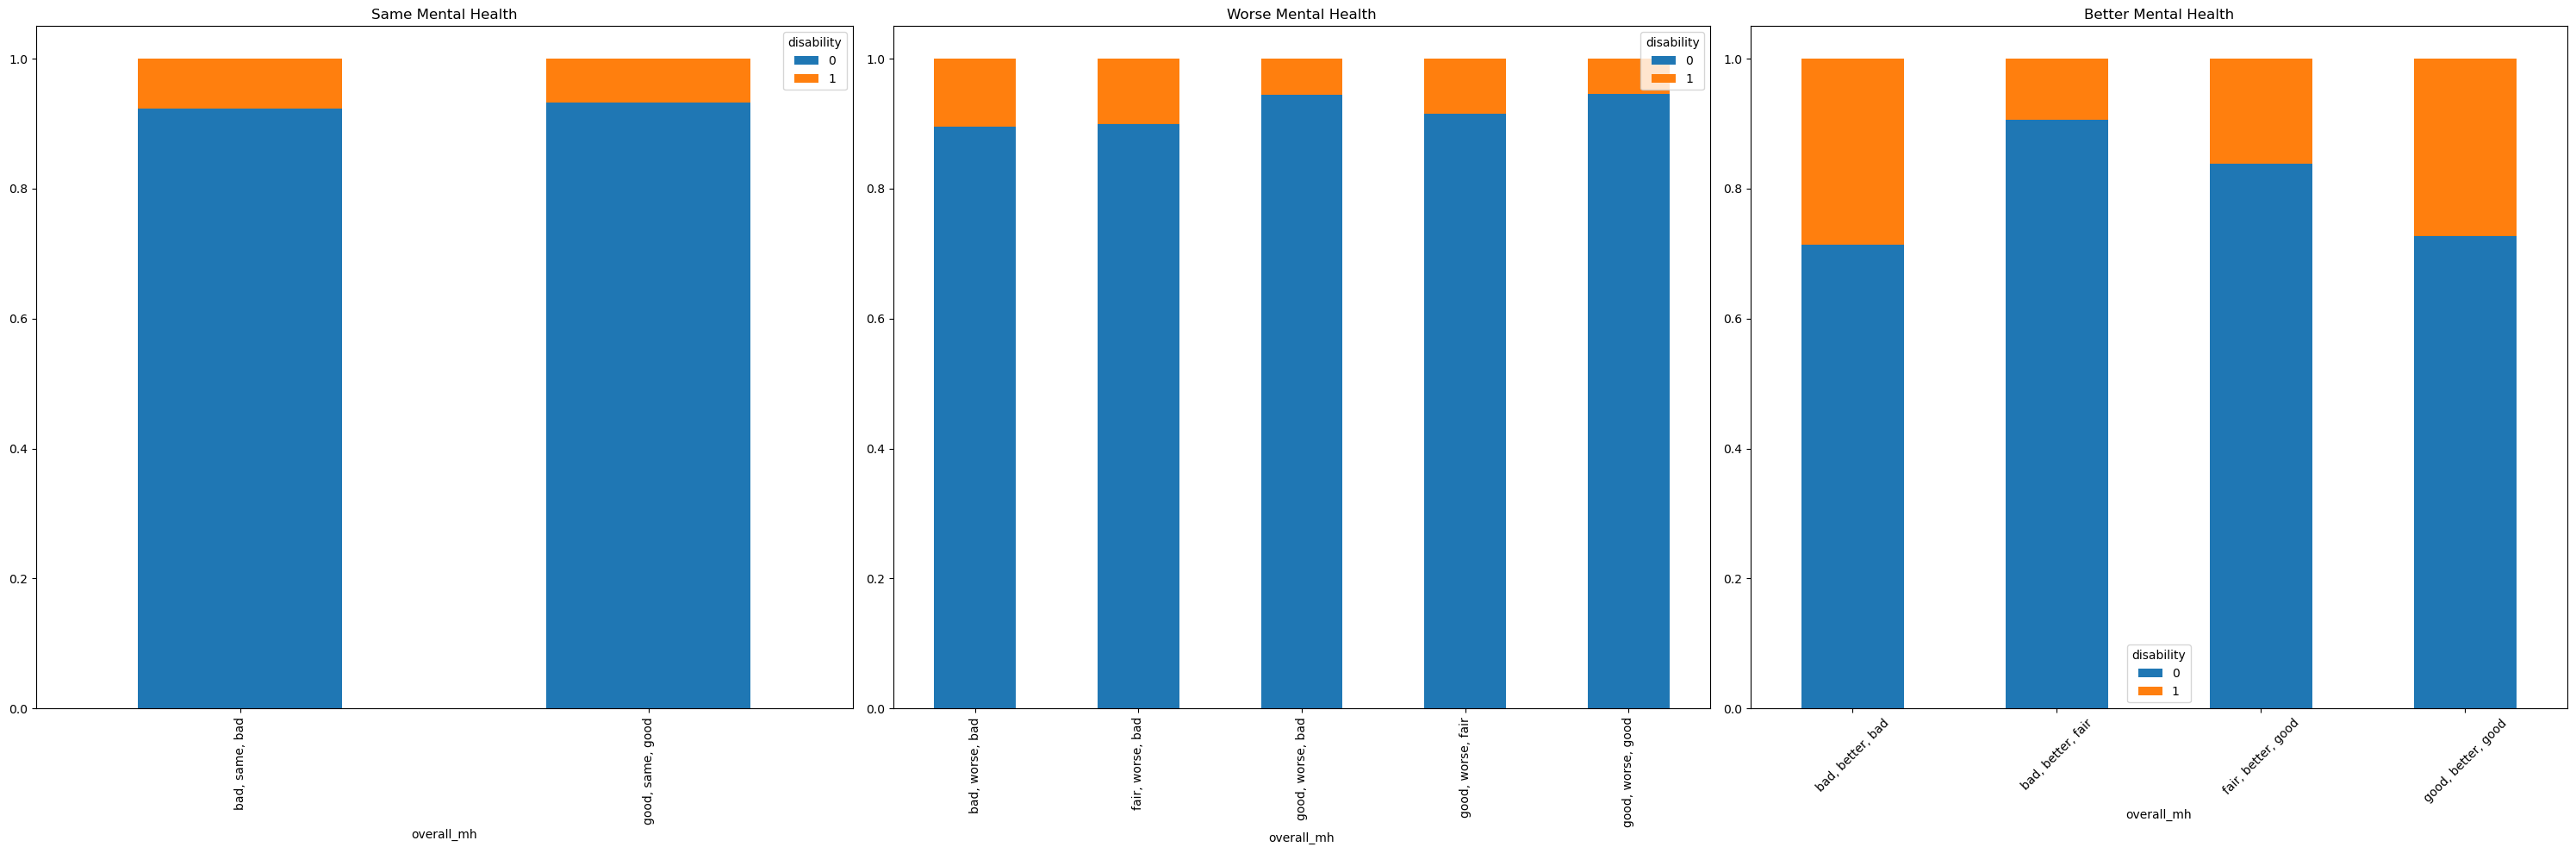

In [286]:
fig, axes = plt.subplots(1, 3, figsize=(30, 10))

plotStackedBar(same_mh_disa_df, 'overall_mh', 'disability', axes[0], 'Same Mental Health')
plotStackedBar(worse_mh_disa_df, 'overall_mh', 'disability', axes[1], 'Worse Mental Health')
plotStackedBar(better_mh_disa_df, 'overall_mh', 'disability', axes[2], 'Better Mental Health')

plt.tight_layout()
plt.show()

#for those with disability, they are more concentrated in the improved mental health population
#this may have contributed to better perceived mental health

In [298]:
le = preprocessing.LabelEncoder()
df = data_modified
df['overall_mh'] = le.fit_transform(df['overall_mh'])
df['self_assessed_overall_health']= le.fit_transform(df['self_assessed_overall_health'])

In [302]:
stats.pointbiserialr(df['overall_mh'], df['self_assessed_overall_health'])

#low correlation by statistic, null hypothesis rejected by extremely small pvalue
#there is some correlation, but it is low

SignificanceResult(statistic=0.13611777823031063, pvalue=1.6410209986530823e-06)

### exploring geographical variables and mental health

In [311]:
geo_cols

['province_or_territory', 'region']

In [313]:
geo_df = data_modified[mh_indicator_cols + geo_cols]

In [384]:
geo_df['region'].value_counts()

#

region
Ontario             467
Qu�bec              328
Prairies            205
British Columbia    158
Atlantic             73
Name: count, dtype: int64

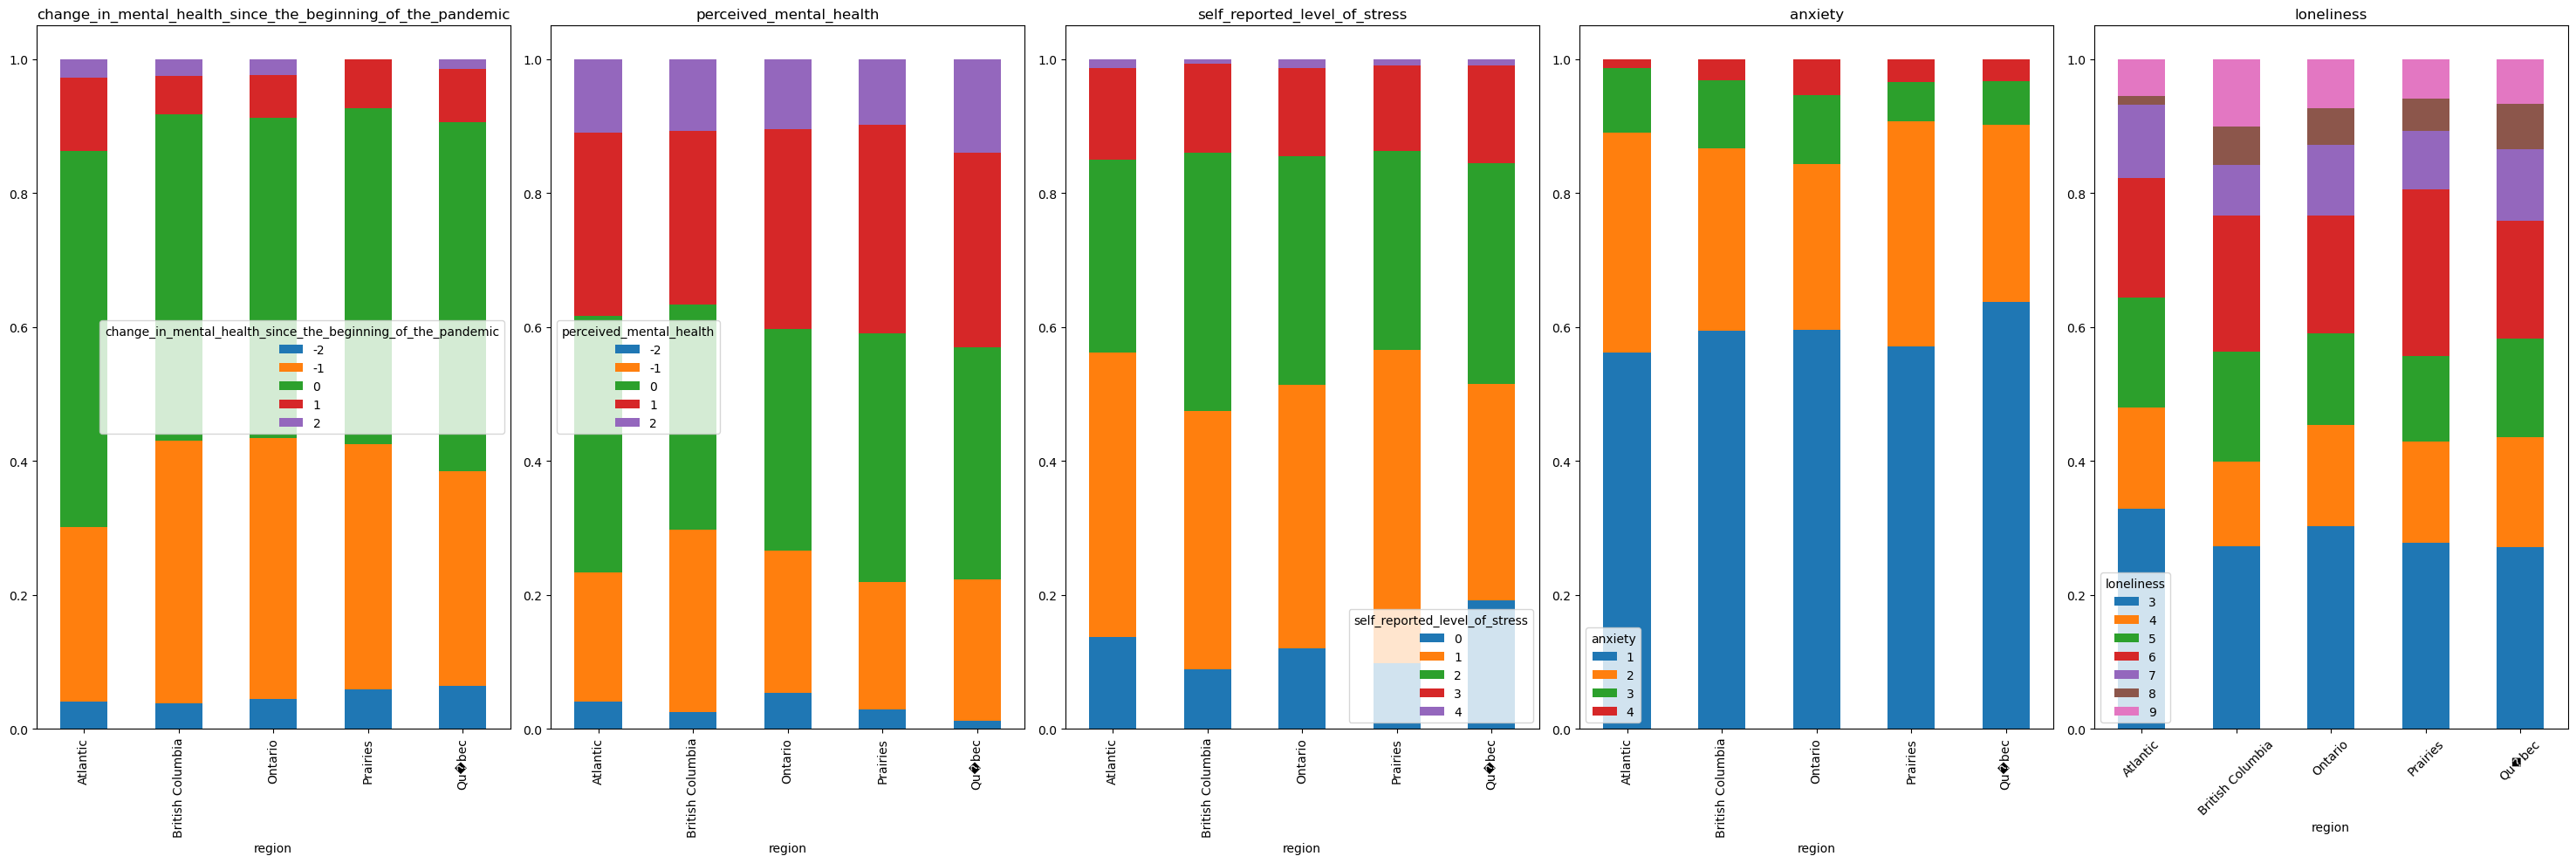

In [388]:
fig, axes = plt.subplots(1, 5, figsize=(30, 10))

for i, var in enumerate(mh_indicator_cols):
    plotStackedBar(geo_df, 'region', var, ax=axes[i], title=var)

plt.tight_layout()
plt.show()

#distribution generally looks even throughout the regions

In [386]:
geo_df['province_or_territory'].value_counts()

#disregard graphs for num<10

province_or_territory
Ontario                      467
Qu�bec                       328
British Columbia             158
Alberta                      121
Manitoba                      38
Saskatchewan                  38
Nova Scotia                   31
New Brunswick                 27
Newfoundland and Labrador     12
Yukon                          4
Prince Edward Island           3
Northwest Territories          3
Nunavut                        1
Name: count, dtype: int64

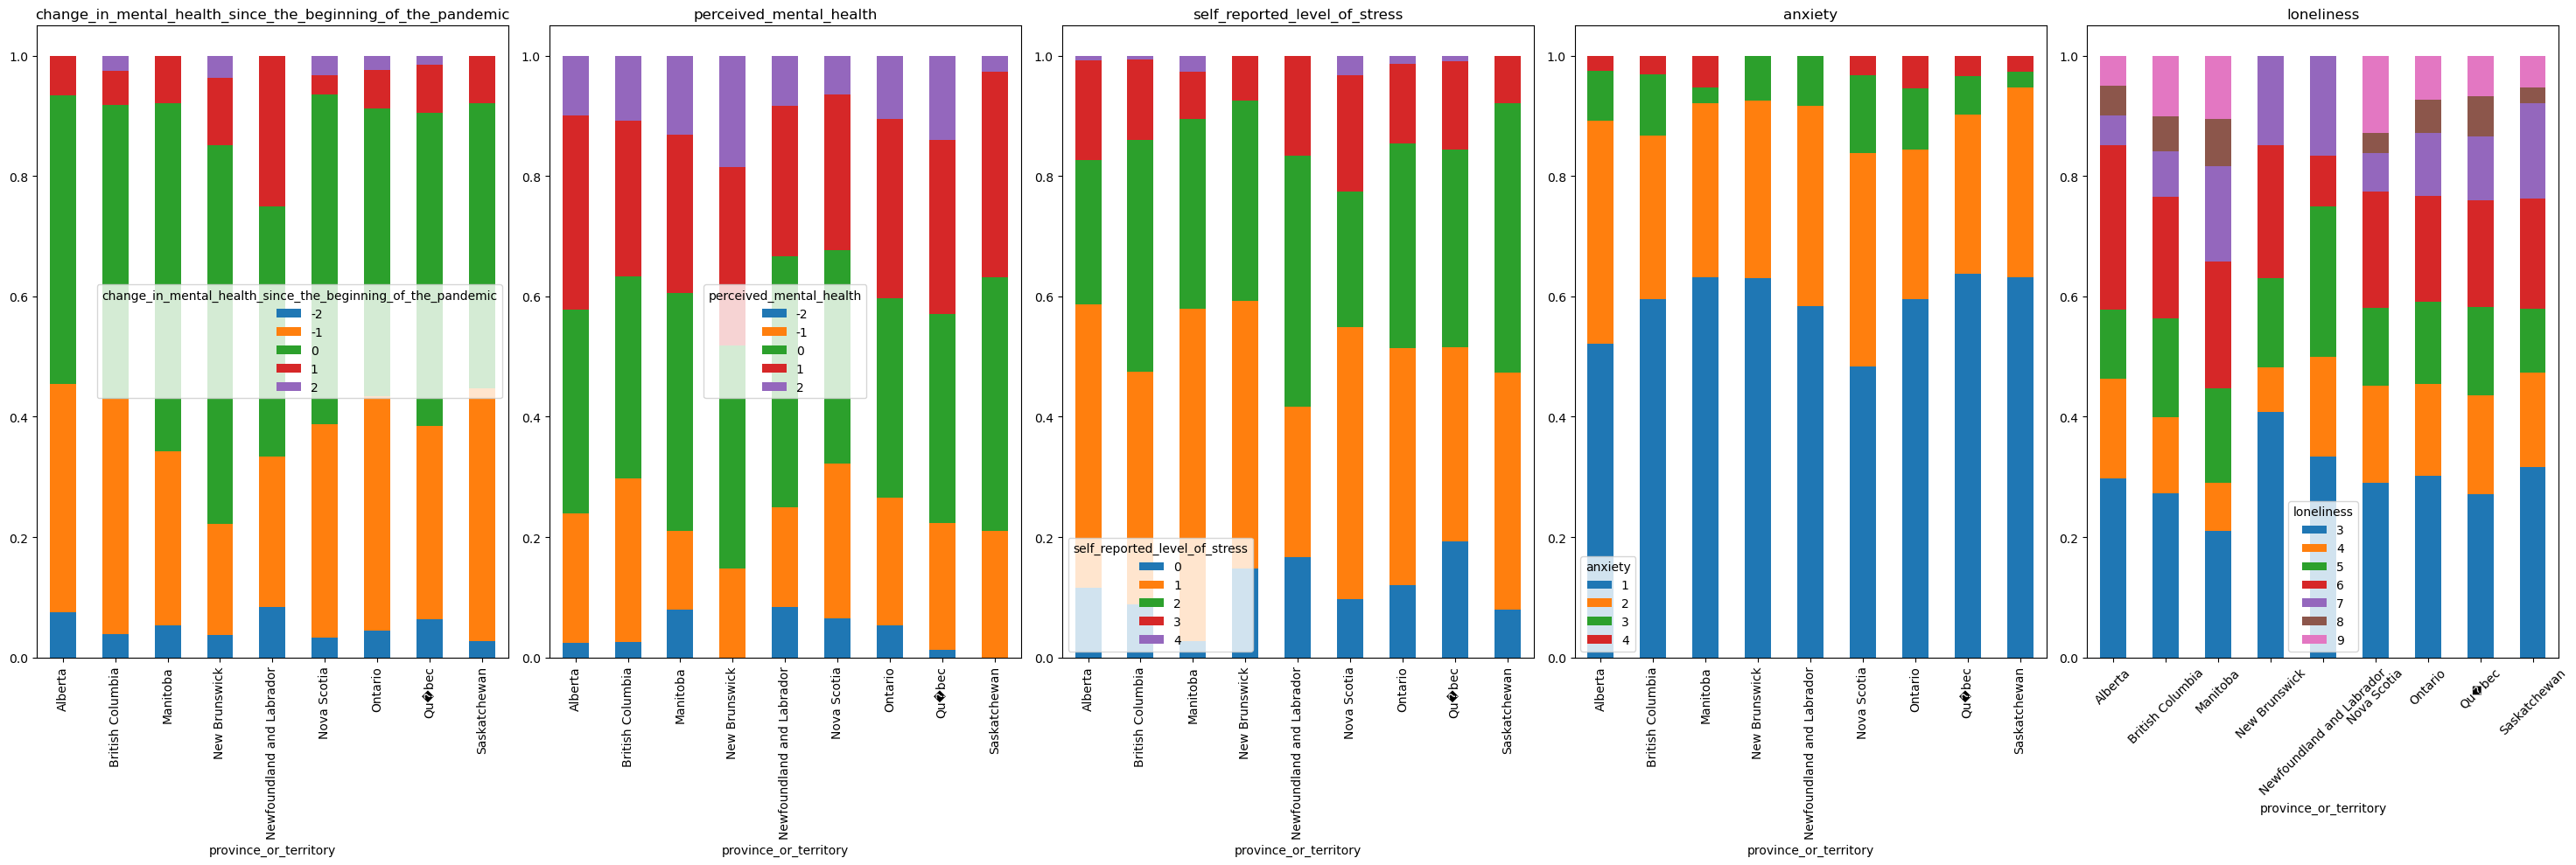

In [396]:
fig, axes = plt.subplots(1, 5, figsize=(30, 10))

for i, var in enumerate(mh_indicator_cols):
    plotStackedBar(geo_df[~geo_df['province_or_territory'].isin(['Yukon','Prince Edward Island','Northwest Territories','Nunavut'])] , 'province_or_territory', var, ax=axes[i], title=var)

plt.tight_layout()
plt.show()

In [358]:
cross_geo_dict = {}
region_dict = {}
province_dict = {}

for var in mh_indicator_cols:
    cross1 = pd.crosstab(geo_df['region'] , geo_df[var])
    region_dict[var] = cross1
    cross2 = pd.crosstab(geo_df['province_or_territory'], geo_df[var])
    province_dict[var] = cross2

cross_geo_dict['region'] = region_dict
cross_geo_dict['province_or_territory'] = province_dict

In [362]:
def plotGroupedBar(cross, ax=None, title=None):
    if ax is None:
        fig = plt.figure(figsize=(20,10))
        ax = fig.add_subplot(111)
    
    cross.plot(kind='bar', ax=ax)
    
    if title:
        ax.set_title(title)
    
    plt.xticks(rotation=45)

    return ax

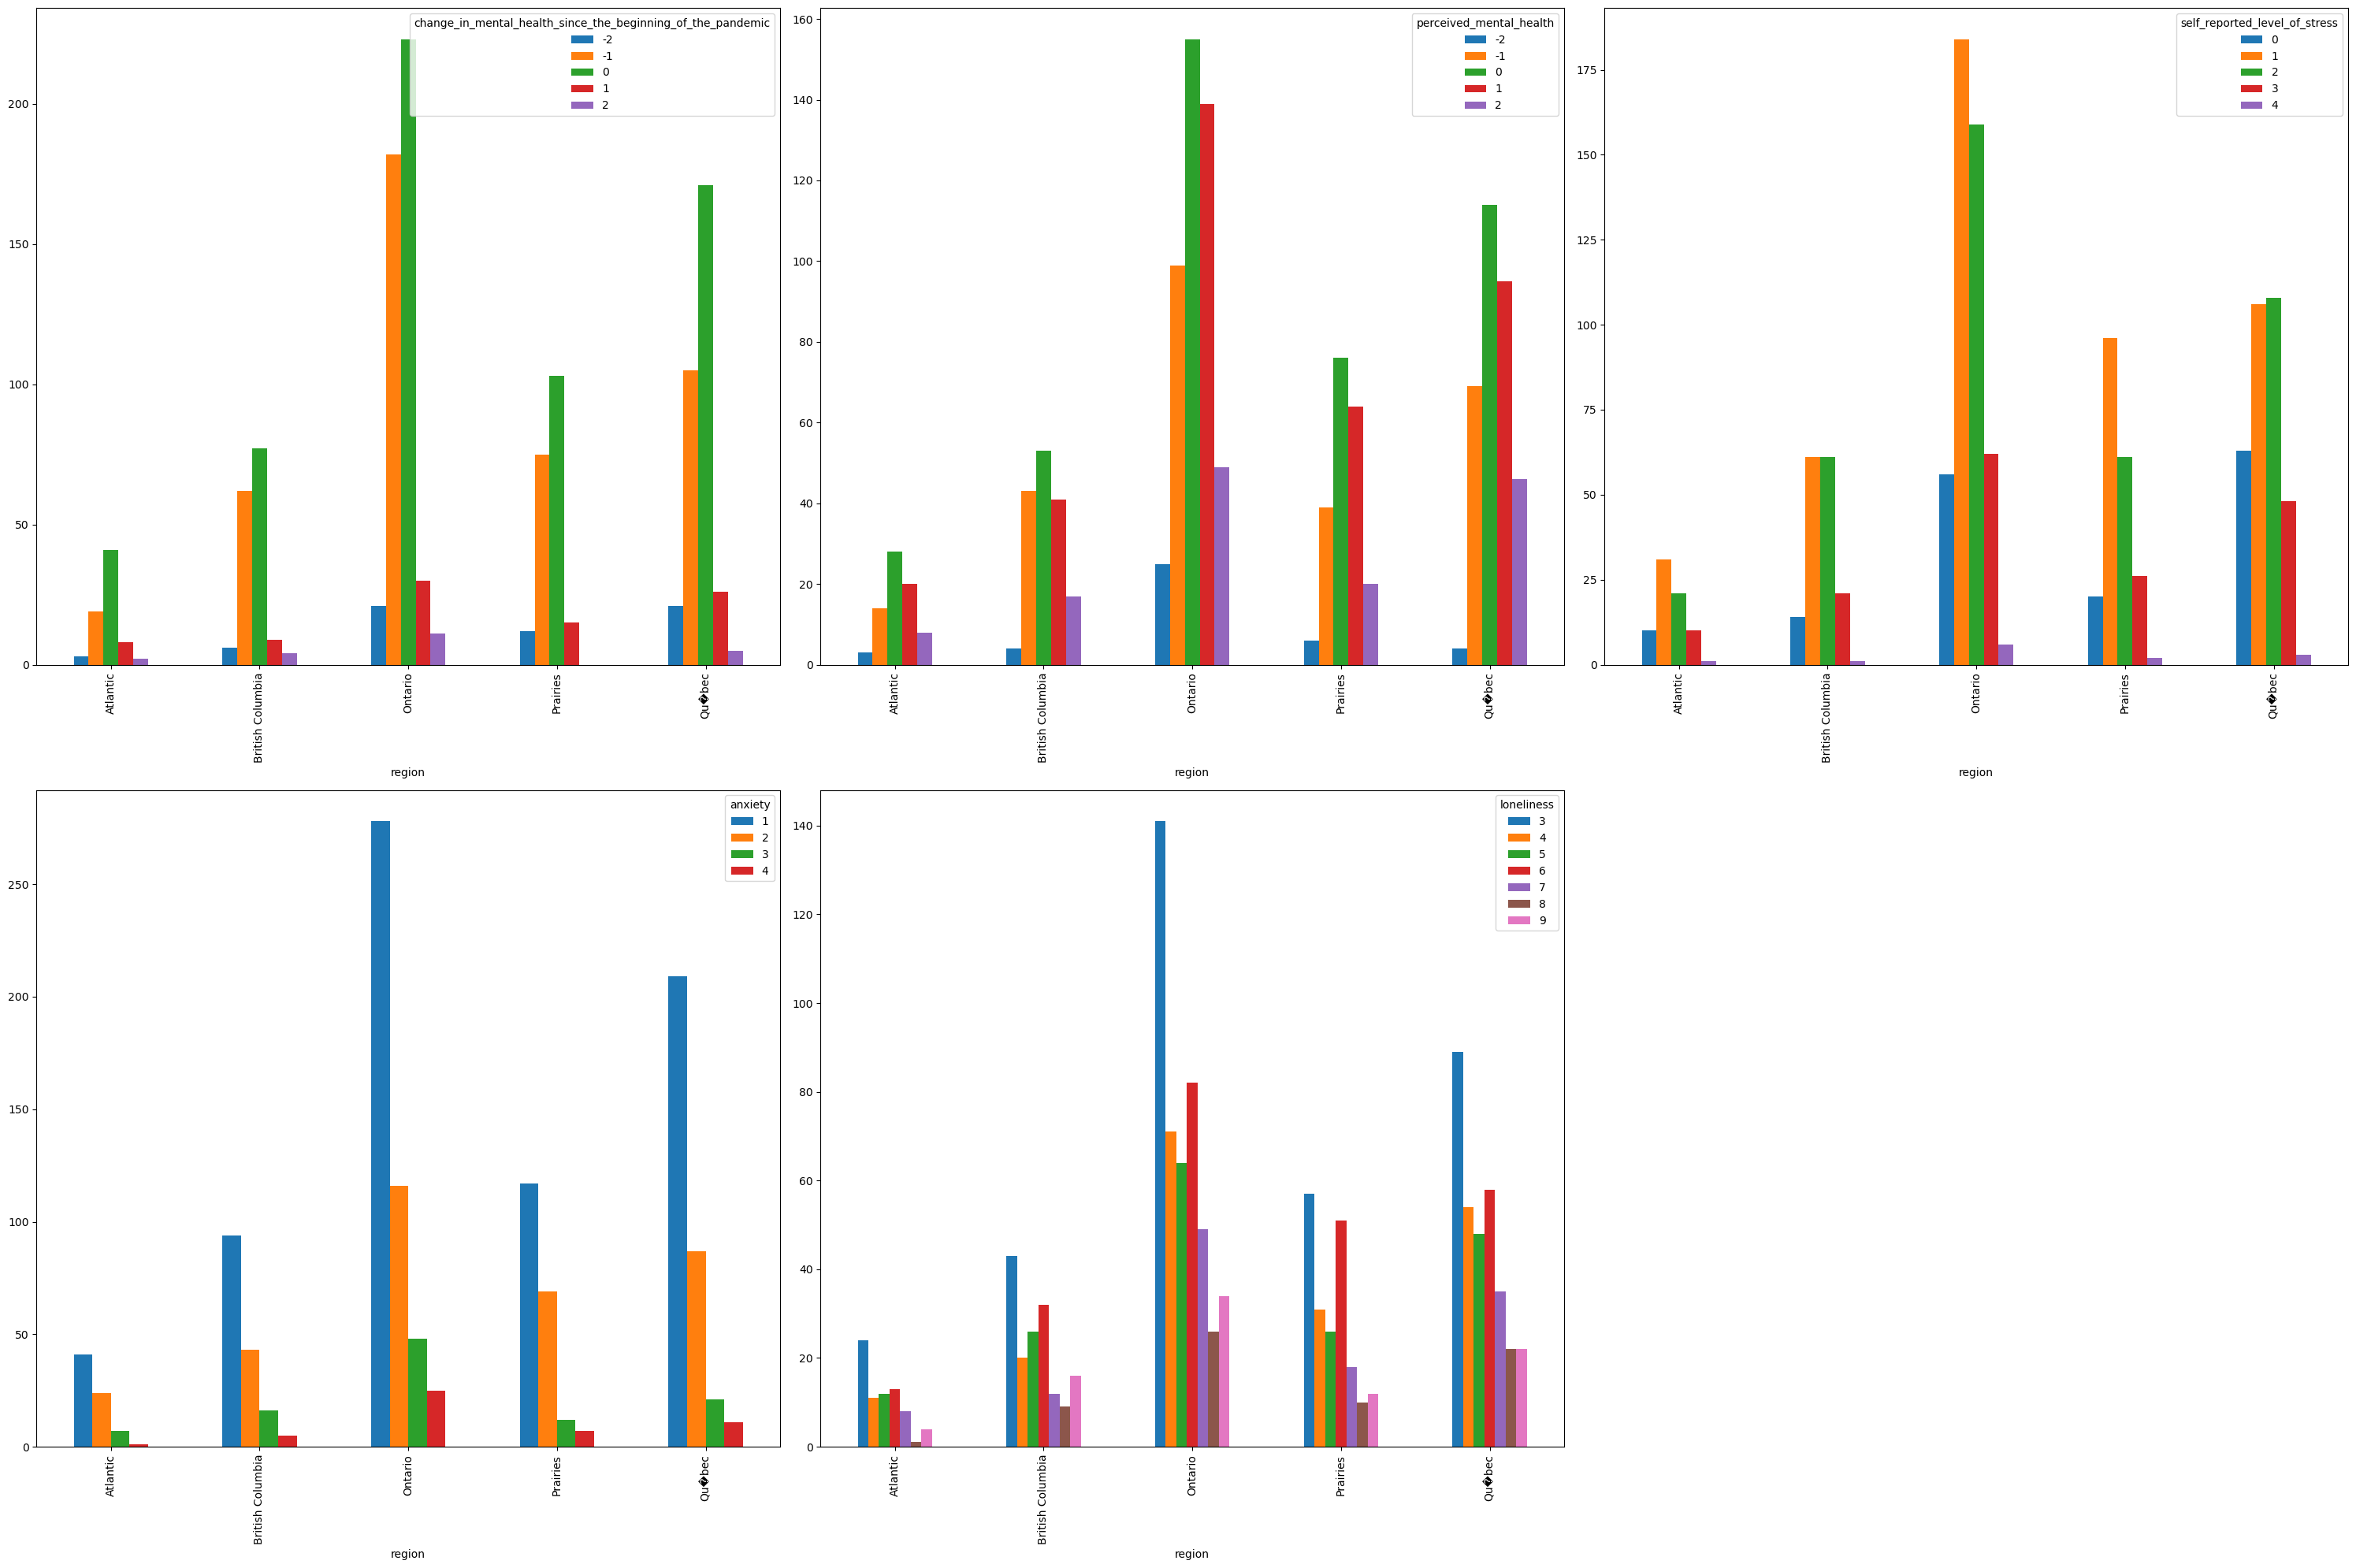

In [372]:
num_var = 5
num_cols = 3
num_rows = math.ceil(num_var/num_cols)
fig, axes = plt.subplots(num_rows, num_cols, figsize=(30, 20))

for i,var in enumerate(mh_indicator_cols):
    col = i%num_cols
    row = i//num_cols

    plotGroupedBar(cross_geo_dict['region'][var], ax=axes[row,col])

plt.delaxes(axes[1][2])

plt.tight_layout()
plt.show()

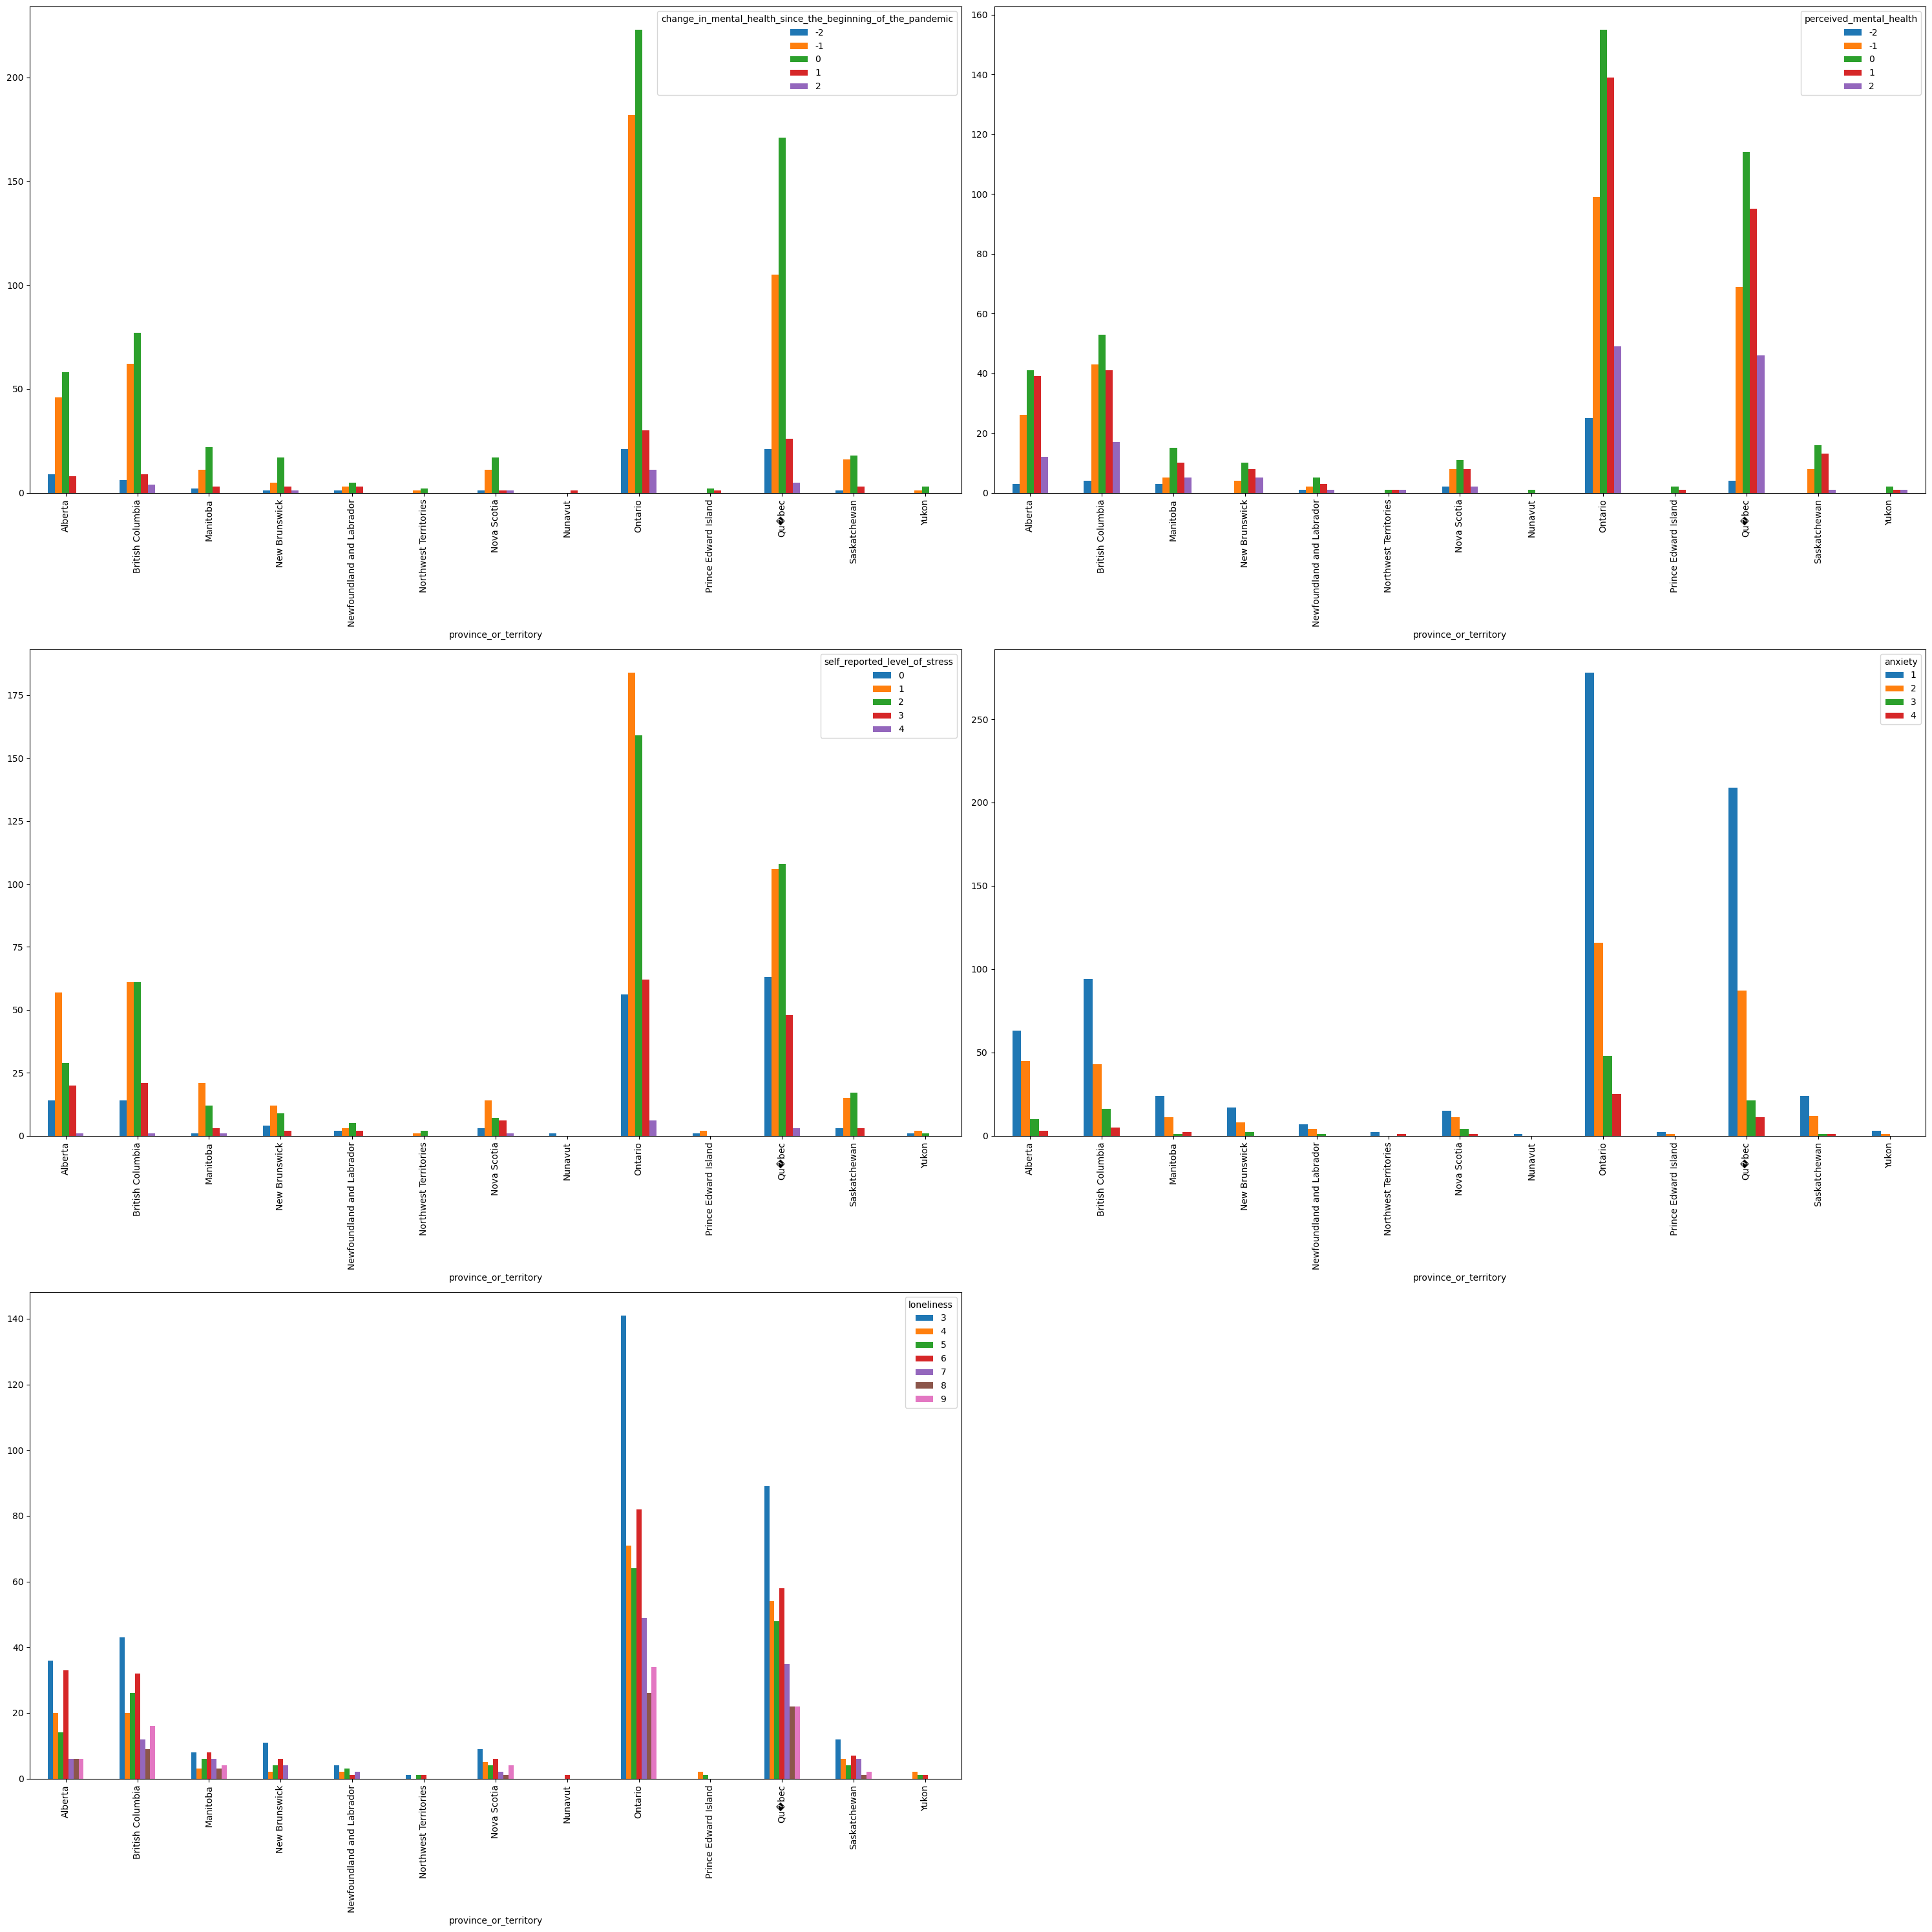

In [382]:
num_var = 5
num_cols = 2
num_rows = math.ceil(num_var/num_cols)
fig, axes = plt.subplots(num_rows, num_cols, figsize=(30, 30))

for i,var in enumerate(mh_indicator_cols):
    col = i%num_cols
    row = i//num_cols

    plotGroupedBar(cross_geo_dict['province_or_territory'][var], ax=axes[row,col])

plt.delaxes(axes[2][1])

plt.tight_layout()
plt.show()

In [421]:
for key in cross_geo_dict.keys():
    for key2 in cross_geo_dict[key].keys():
        print(key + '_' + key2)
        chi2, p, dof, expected = chi2_contingency(cross_geo_dict[key][key2])
        print("\nChi-square statistic:", chi2)
        print("P-value:", p)
        print("Degrees of freedom:", dof)
        print("Expected frequencies table:")
        print(expected)
        if p<0.05:
            print('significant')
        print('\n')

#no significant correlation, null hypothesis not rejected

region_change_in_mental_health_since_the_beginning_of_the_pandemic

Chi-square statistic: 16.85570622413942
P-value: 0.39499319435588426
Degrees of freedom: 16
Expected frequencies table:
[[  3.735987    26.27051178  36.47034931   5.21852153   1.30463038]
 [  8.08610885  56.85946385  78.93582453  11.29488221   2.82372055]
 [ 23.90008123 168.05930138 233.31031682  33.38424045   8.34606011]
 [ 10.49147035  73.773355   102.41673436  14.65475223   3.66368806]
 [ 16.78635256 118.03736799 163.86677498  23.44760357   5.86190089]]


region_perceived_mental_health

Chi-square statistic: 18.46959890640922
P-value: 0.2971239726974265
Degrees of freedom: 16
Expected frequencies table:
[[  2.490658    15.65556458  25.2623883   21.28919578   8.30219334]
 [  5.39073924  33.88464663  54.67749797  46.07798538  17.96913079]
 [ 15.93338749 100.15272136 161.61007311 136.1925264   53.11129163]
 [  6.99431357  43.9642567   70.94232331  59.78472786  23.31437855]
 [ 11.19090171  70.34281072 113.5077173   95.6

### exploring income-related variables

In [399]:
income_cols

['yearly_income', 'change_in_income_since_the_beginning_of_the_pandemic']

In [405]:
income_df = data_modified[income_cols + mh_indicator_cols]
income_df.head()

yearly_income change_in_income_since_the_beginning_of_the_pandemic  \
0   $19,999 or less                                        Do not know     
1  $120,000 or more                                          Decreased     
4   $60,000-$79,999                                          Decreased     
5   $60,000-$79,999                                    Stayed the same     
7   $40,000-$59,000                                    Stayed the same     

  change_in_mental_health_since_the_beginning_of_the_pandemic  \
0                                                 -1            
1                                                 -2            
4                                                  1            
5                                                  0            
7                                                  0            

  perceived_mental_health self_reported_level_of_stress anxiety  loneliness  
0                       0                             1       3           8  
1                      -1                             1       1           5  
4                       1                             2       1           4  
5                       1                             2       1           5  
7                       0                             1       2           6

In [409]:
income_df['yearly_income'].value_counts()

yearly_income
$120,000 or more        235
$40,000-$59,000         182
$80,000-$99,999         180
$60,000-$79,999         179
$100,000-$119,999       144
$20,000-$39,999         134
Prefer not to answer    131
$19,999 or less          46
Name: count, dtype: int64

In [411]:
income_df['change_in_income_since_the_beginning_of_the_pandemic'].value_counts()

change_in_income_since_the_beginning_of_the_pandemic
Stayed the same         646
Decreased               337
Increased               185
Prefer not to answer     40
Do not know              23
Name: count, dtype: int64

In [413]:
cross_income_dict = {}
income_dict = {}
change_income_dict = {}

for var in mh_indicator_cols:
    cross1 = pd.crosstab(income_df['yearly_income'] , income_df[var])
    income_dict[var] = cross1
    cross2 = pd.crosstab(income_df['change_in_income_since_the_beginning_of_the_pandemic'], income_df[var])
    change_income_dict[var] = cross2

cross_income_dict['yearly_income'] = income_dict
cross_income_dict['change_in_income_since_the_beginning_of_the_pandemic'] = change_income_dict

In [423]:
for key in cross_income_dict.keys():
    for key2 in cross_income_dict[key].keys():
        print(key + '_' + key2)
        chi2, p, dof, expected = chi2_contingency(cross_income_dict[key][key2])
        print("\nChi-square statistic:", chi2)
        print("P-value:", p)
        print("Degrees of freedom:", dof)
        print("Expected frequencies table:")
        print(expected)
        if p<0.05:
            print('significant')
        print('\n')

#significant:
#for yearly_income, stress level
#for change in income, change in mh, stress level, anxiety, loneliness

yearly_income_change_in_mental_health_since_the_beginning_of_the_pandemic

Chi-square statistic: 36.419602299493015
P-value: 0.1322212621308042
Degrees of freedom: 28
Expected frequencies table:
[[  7.3696182   51.82128351  71.94151097  10.29406986   2.57351747]
 [ 12.02680747  84.56945573 117.40454915  16.79935012   4.19983753]
 [  2.35418359  16.55402112  22.981316     3.28838343   0.82209586]
 [  6.85783916  48.22258327  66.94557271   9.5792039    2.39480097]
 [  9.31437855  65.49634444  90.92607636  13.01056052   3.25264013]
 [  9.16084484  64.41673436  89.42729488  12.79610073   3.19902518]
 [  9.21202275  64.77660439  89.92688871  12.86758733   3.21689683]
 [  6.70430544  47.14297319  65.44679123   9.36474411   2.34118603]]


yearly_income_perceived_mental_health

Chi-square statistic: 33.16140904808017
P-value: 0.2298517419705056
Degrees of freedom: 28
Expected frequencies table:
[[ 4.9130788  30.88220959 49.83265638 41.99512591 16.37692933]
 [ 8.01787165 50.39805037 81.32412673

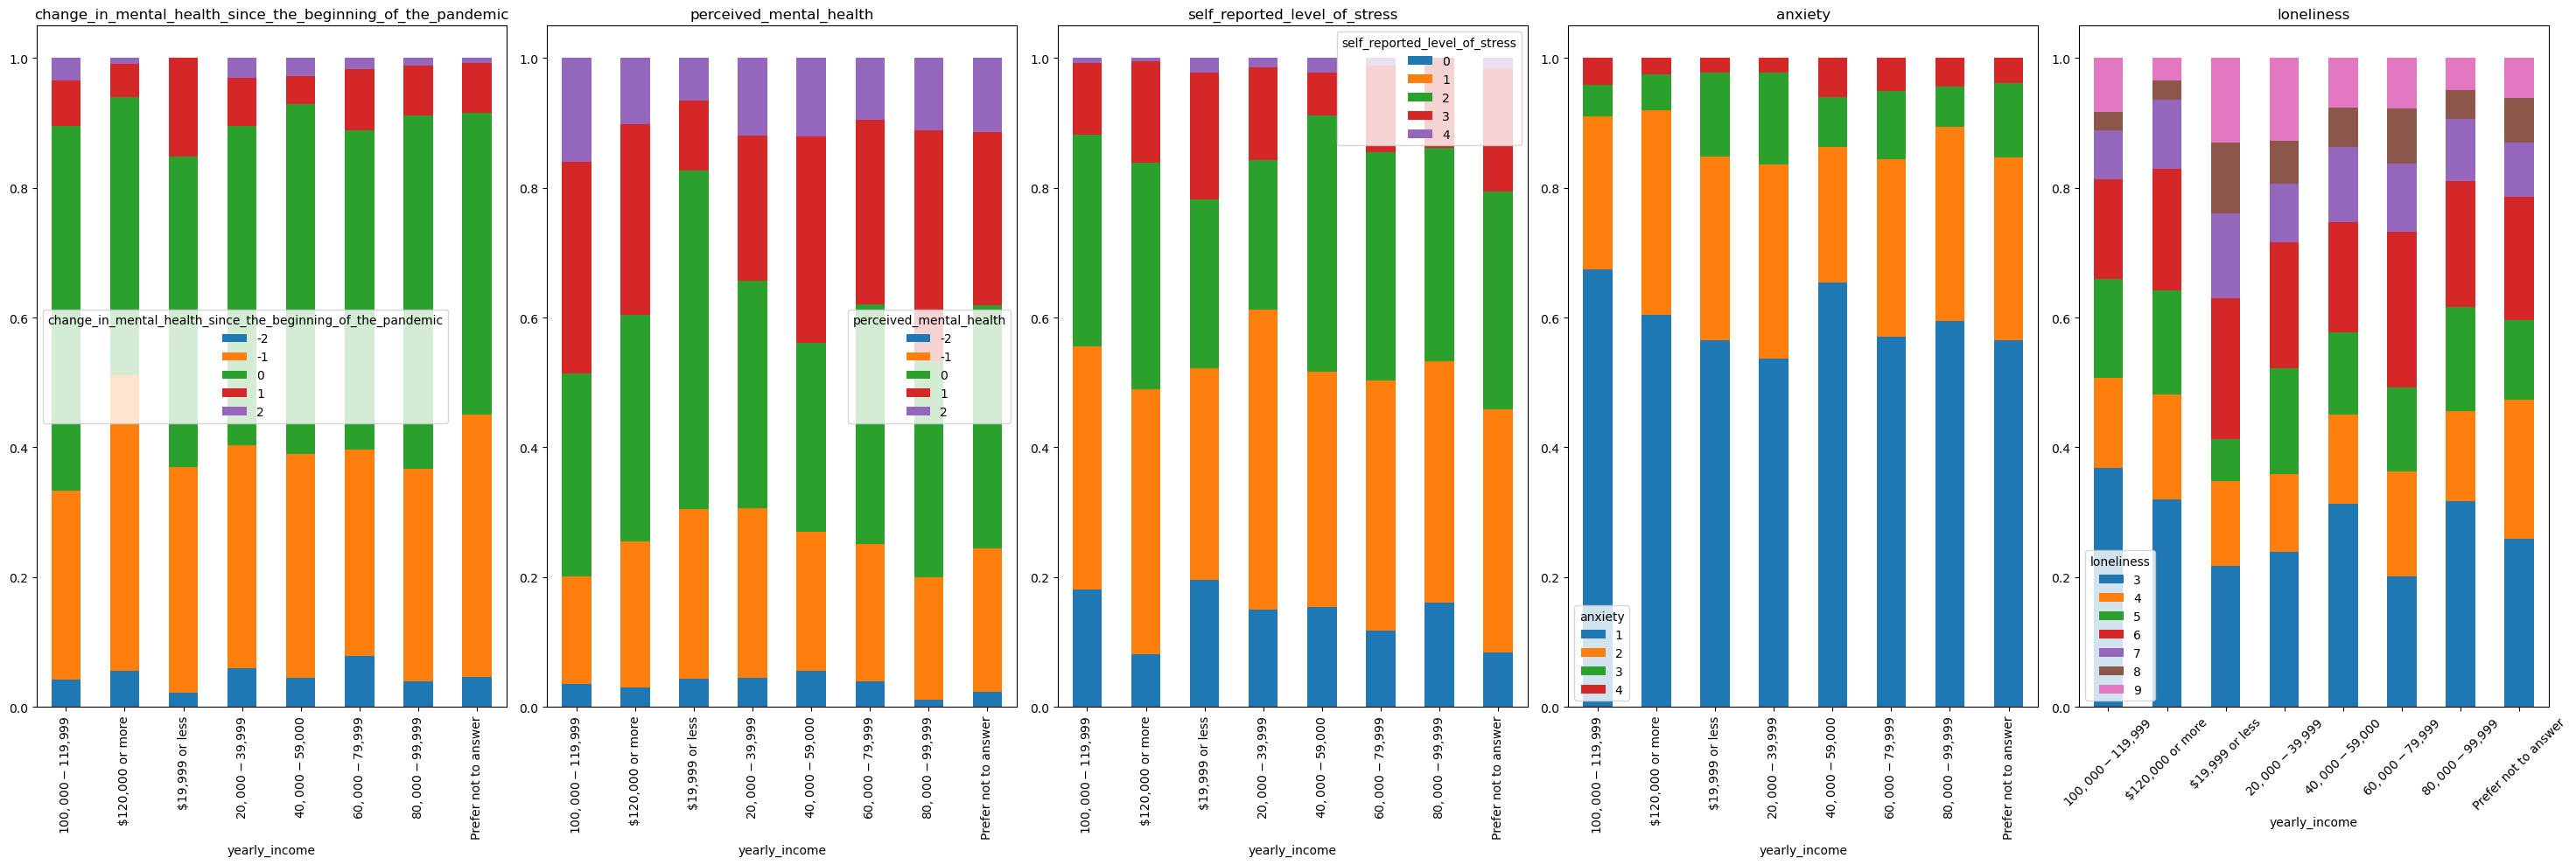

In [415]:
fig, axes = plt.subplots(1, 5, figsize=(30, 10))

for i, var in enumerate(mh_indicator_cols):
    plotStackedBar(income_df , 'yearly_income', var, ax=axes[i], title=var)

plt.tight_layout()
plt.show()

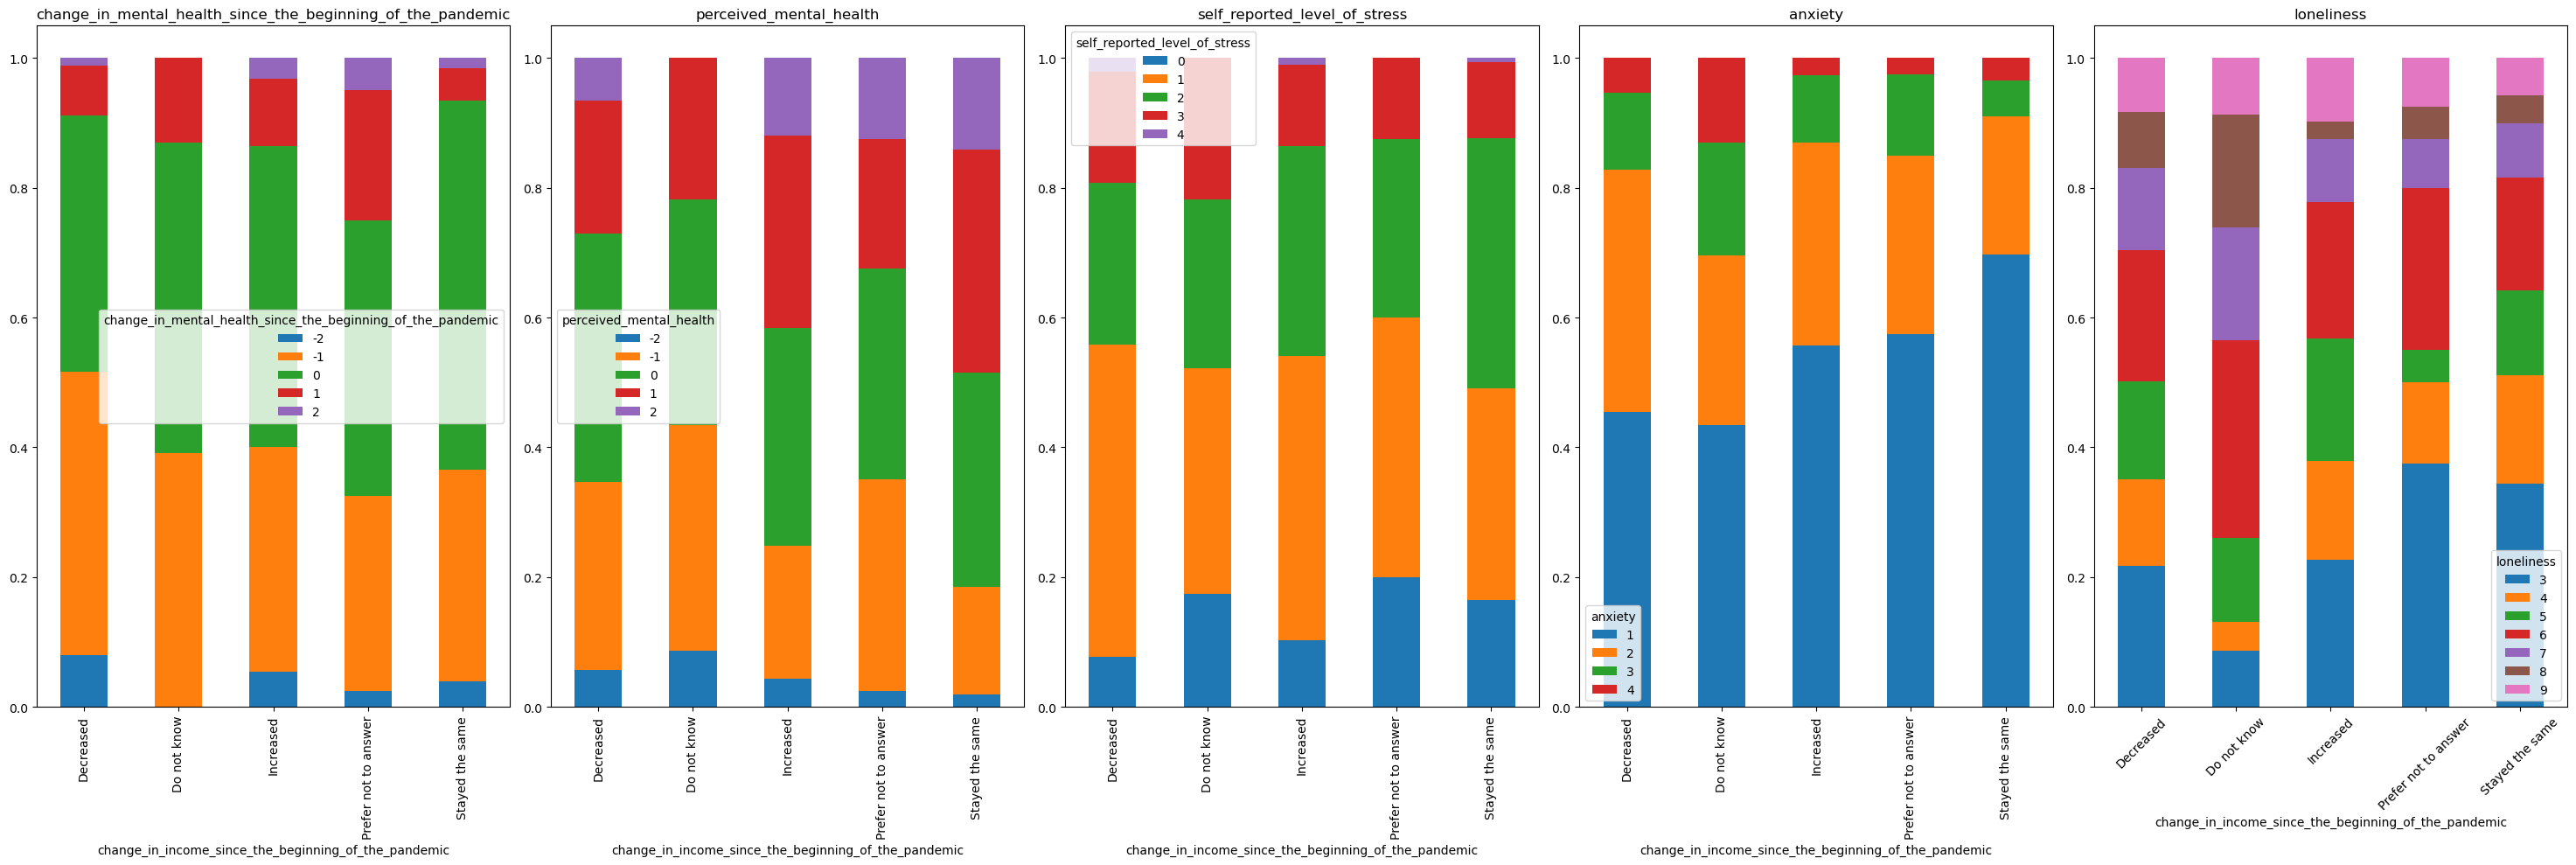

In [417]:
fig, axes = plt.subplots(1, 5, figsize=(30, 10))

for i, var in enumerate(mh_indicator_cols):
    plotStackedBar(income_df , 'change_in_income_since_the_beginning_of_the_pandemic', var, ax=axes[i], title=var)

plt.tight_layout()
plt.show()
#change in mh: for decreased income, worse change
#mh: better for same or increased income
#stress level: highest level for prefer not to answer; fairly high for same or do not know income
#anxiety: worst for same; fairy bad for increased or do not know income
#loneliness: worst for do not know, followed by decreased, prefer not to answer, increased then the same

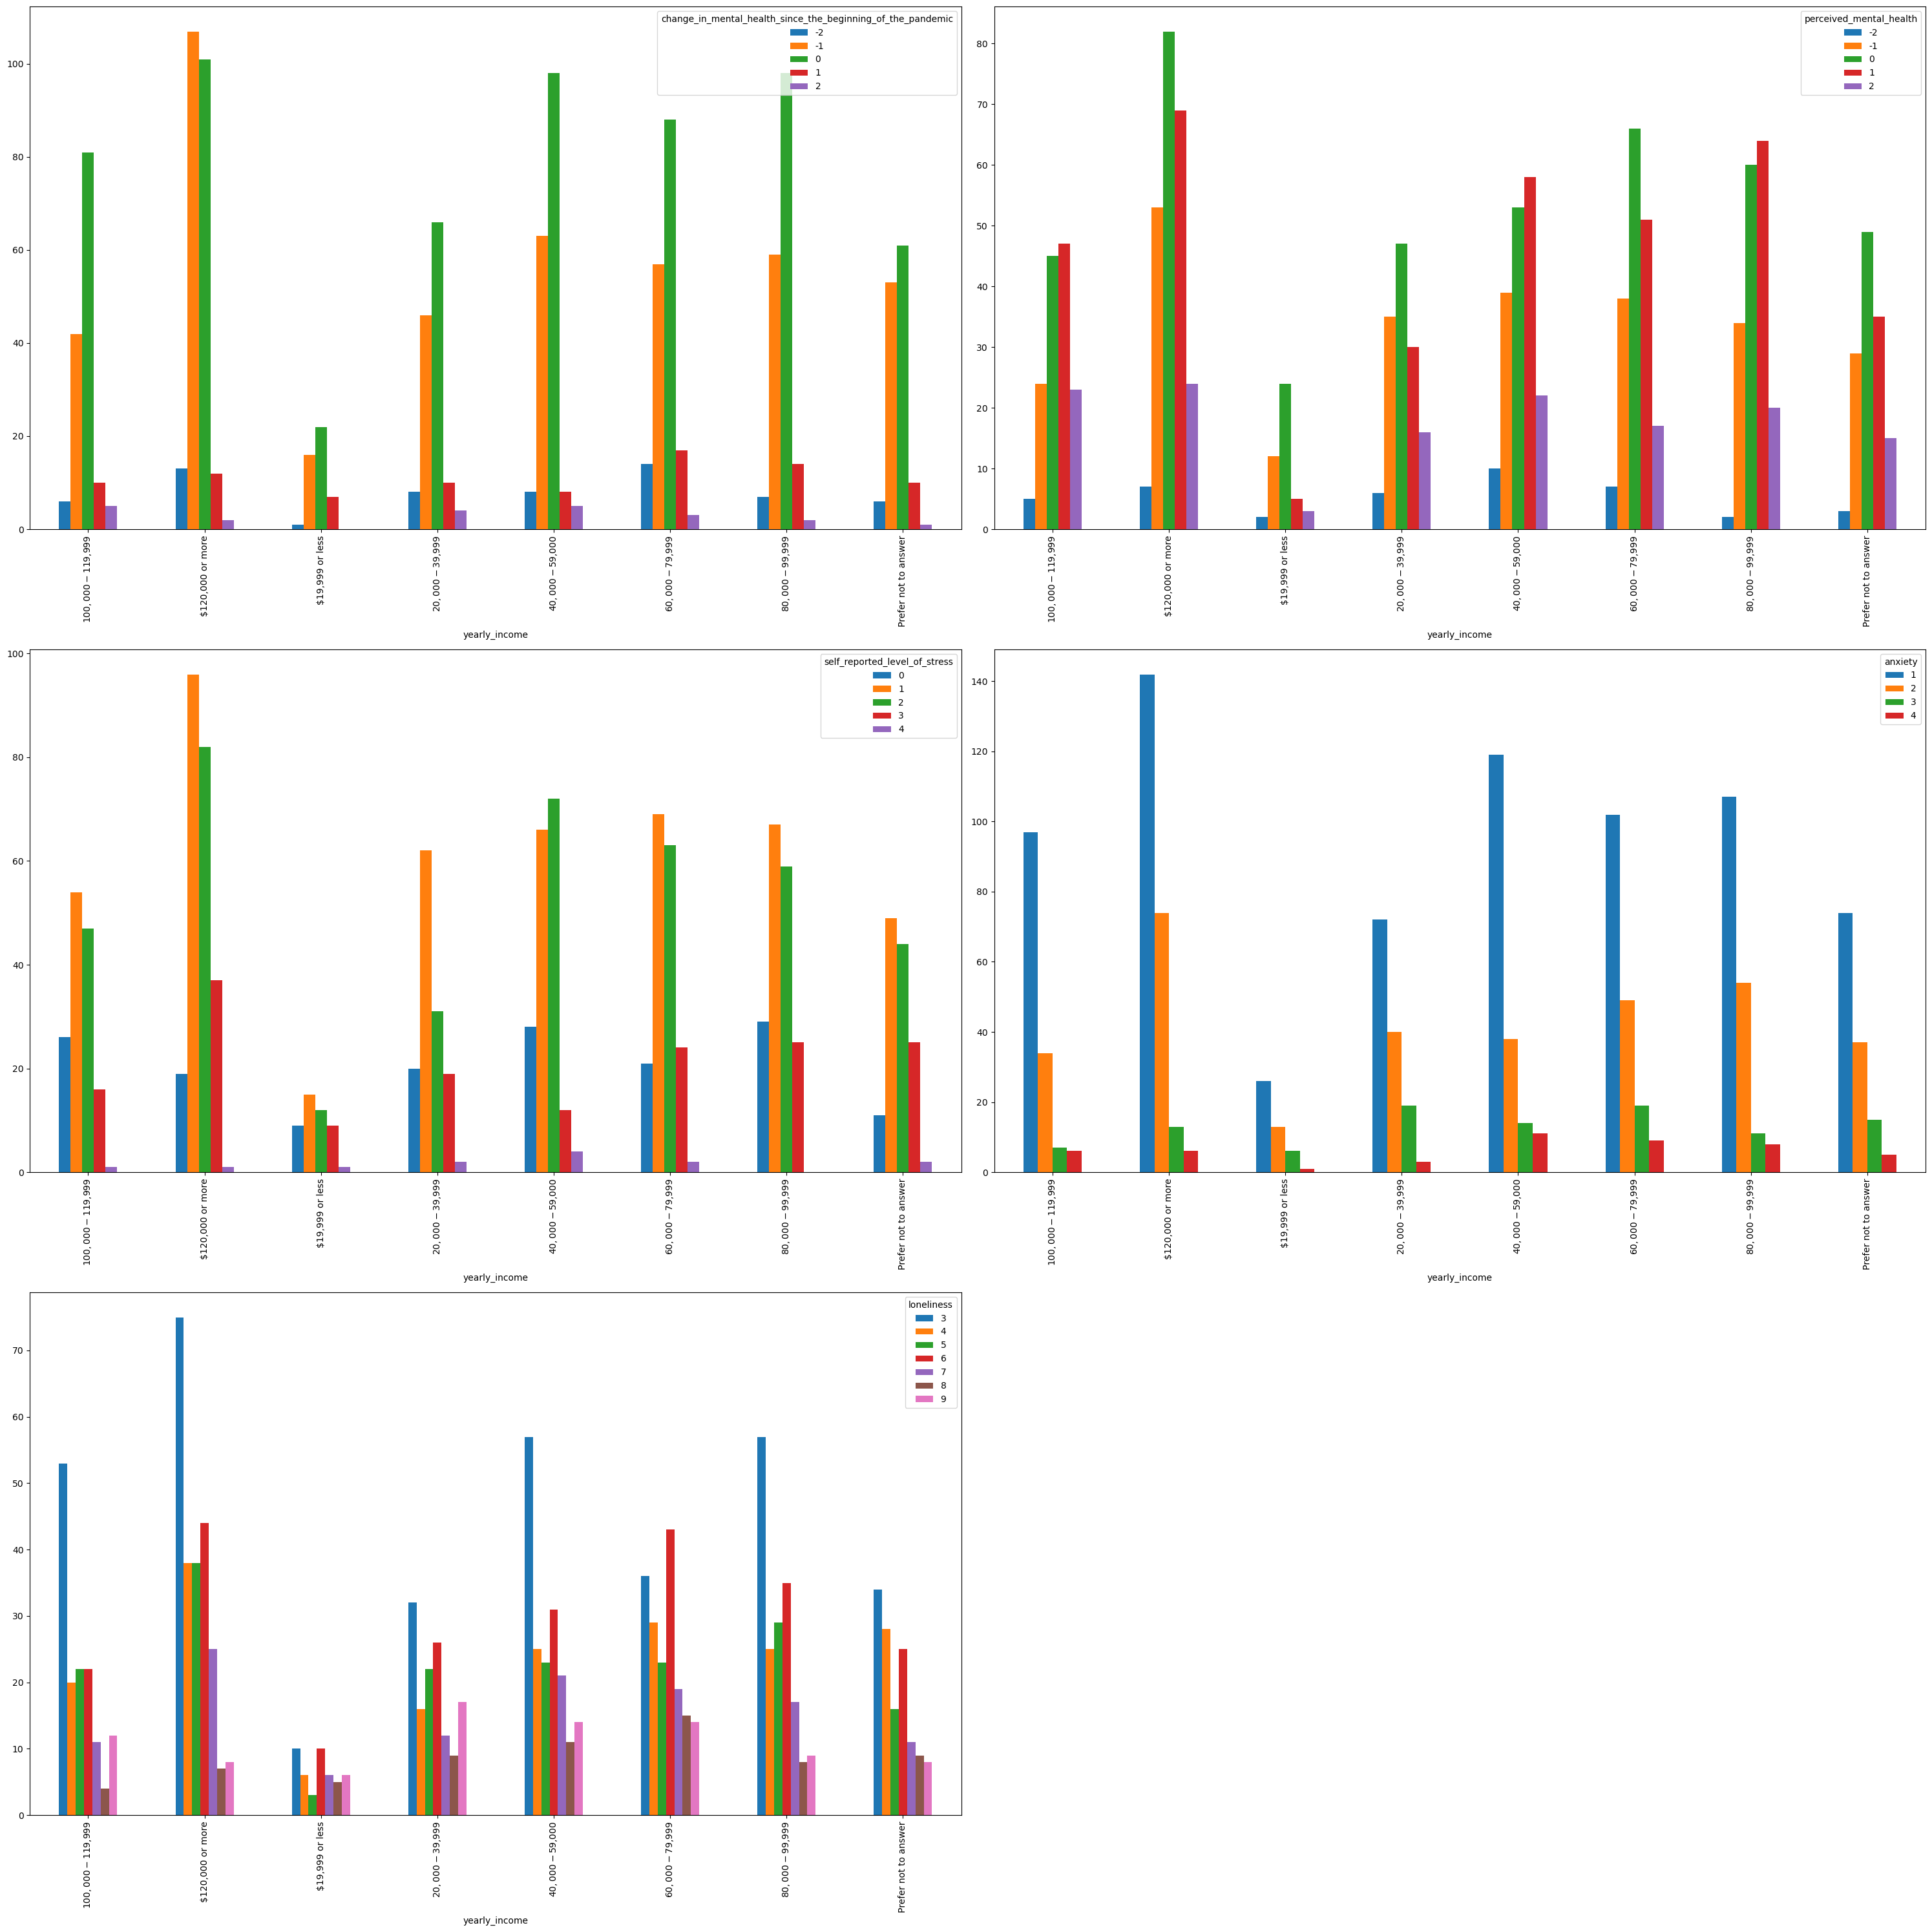

In [429]:
num_var = 5
num_cols = 2
num_rows = math.ceil(num_var/num_cols)
fig, axes = plt.subplots(num_rows, num_cols, figsize=(30, 30))

for i,var in enumerate(mh_indicator_cols):
    col = i%num_cols
    row = i//num_cols

    plotGroupedBar(cross_income_dict['yearly_income'][var], ax=axes[row,col])

plt.delaxes(axes[2][1])

plt.tight_layout()
plt.show()

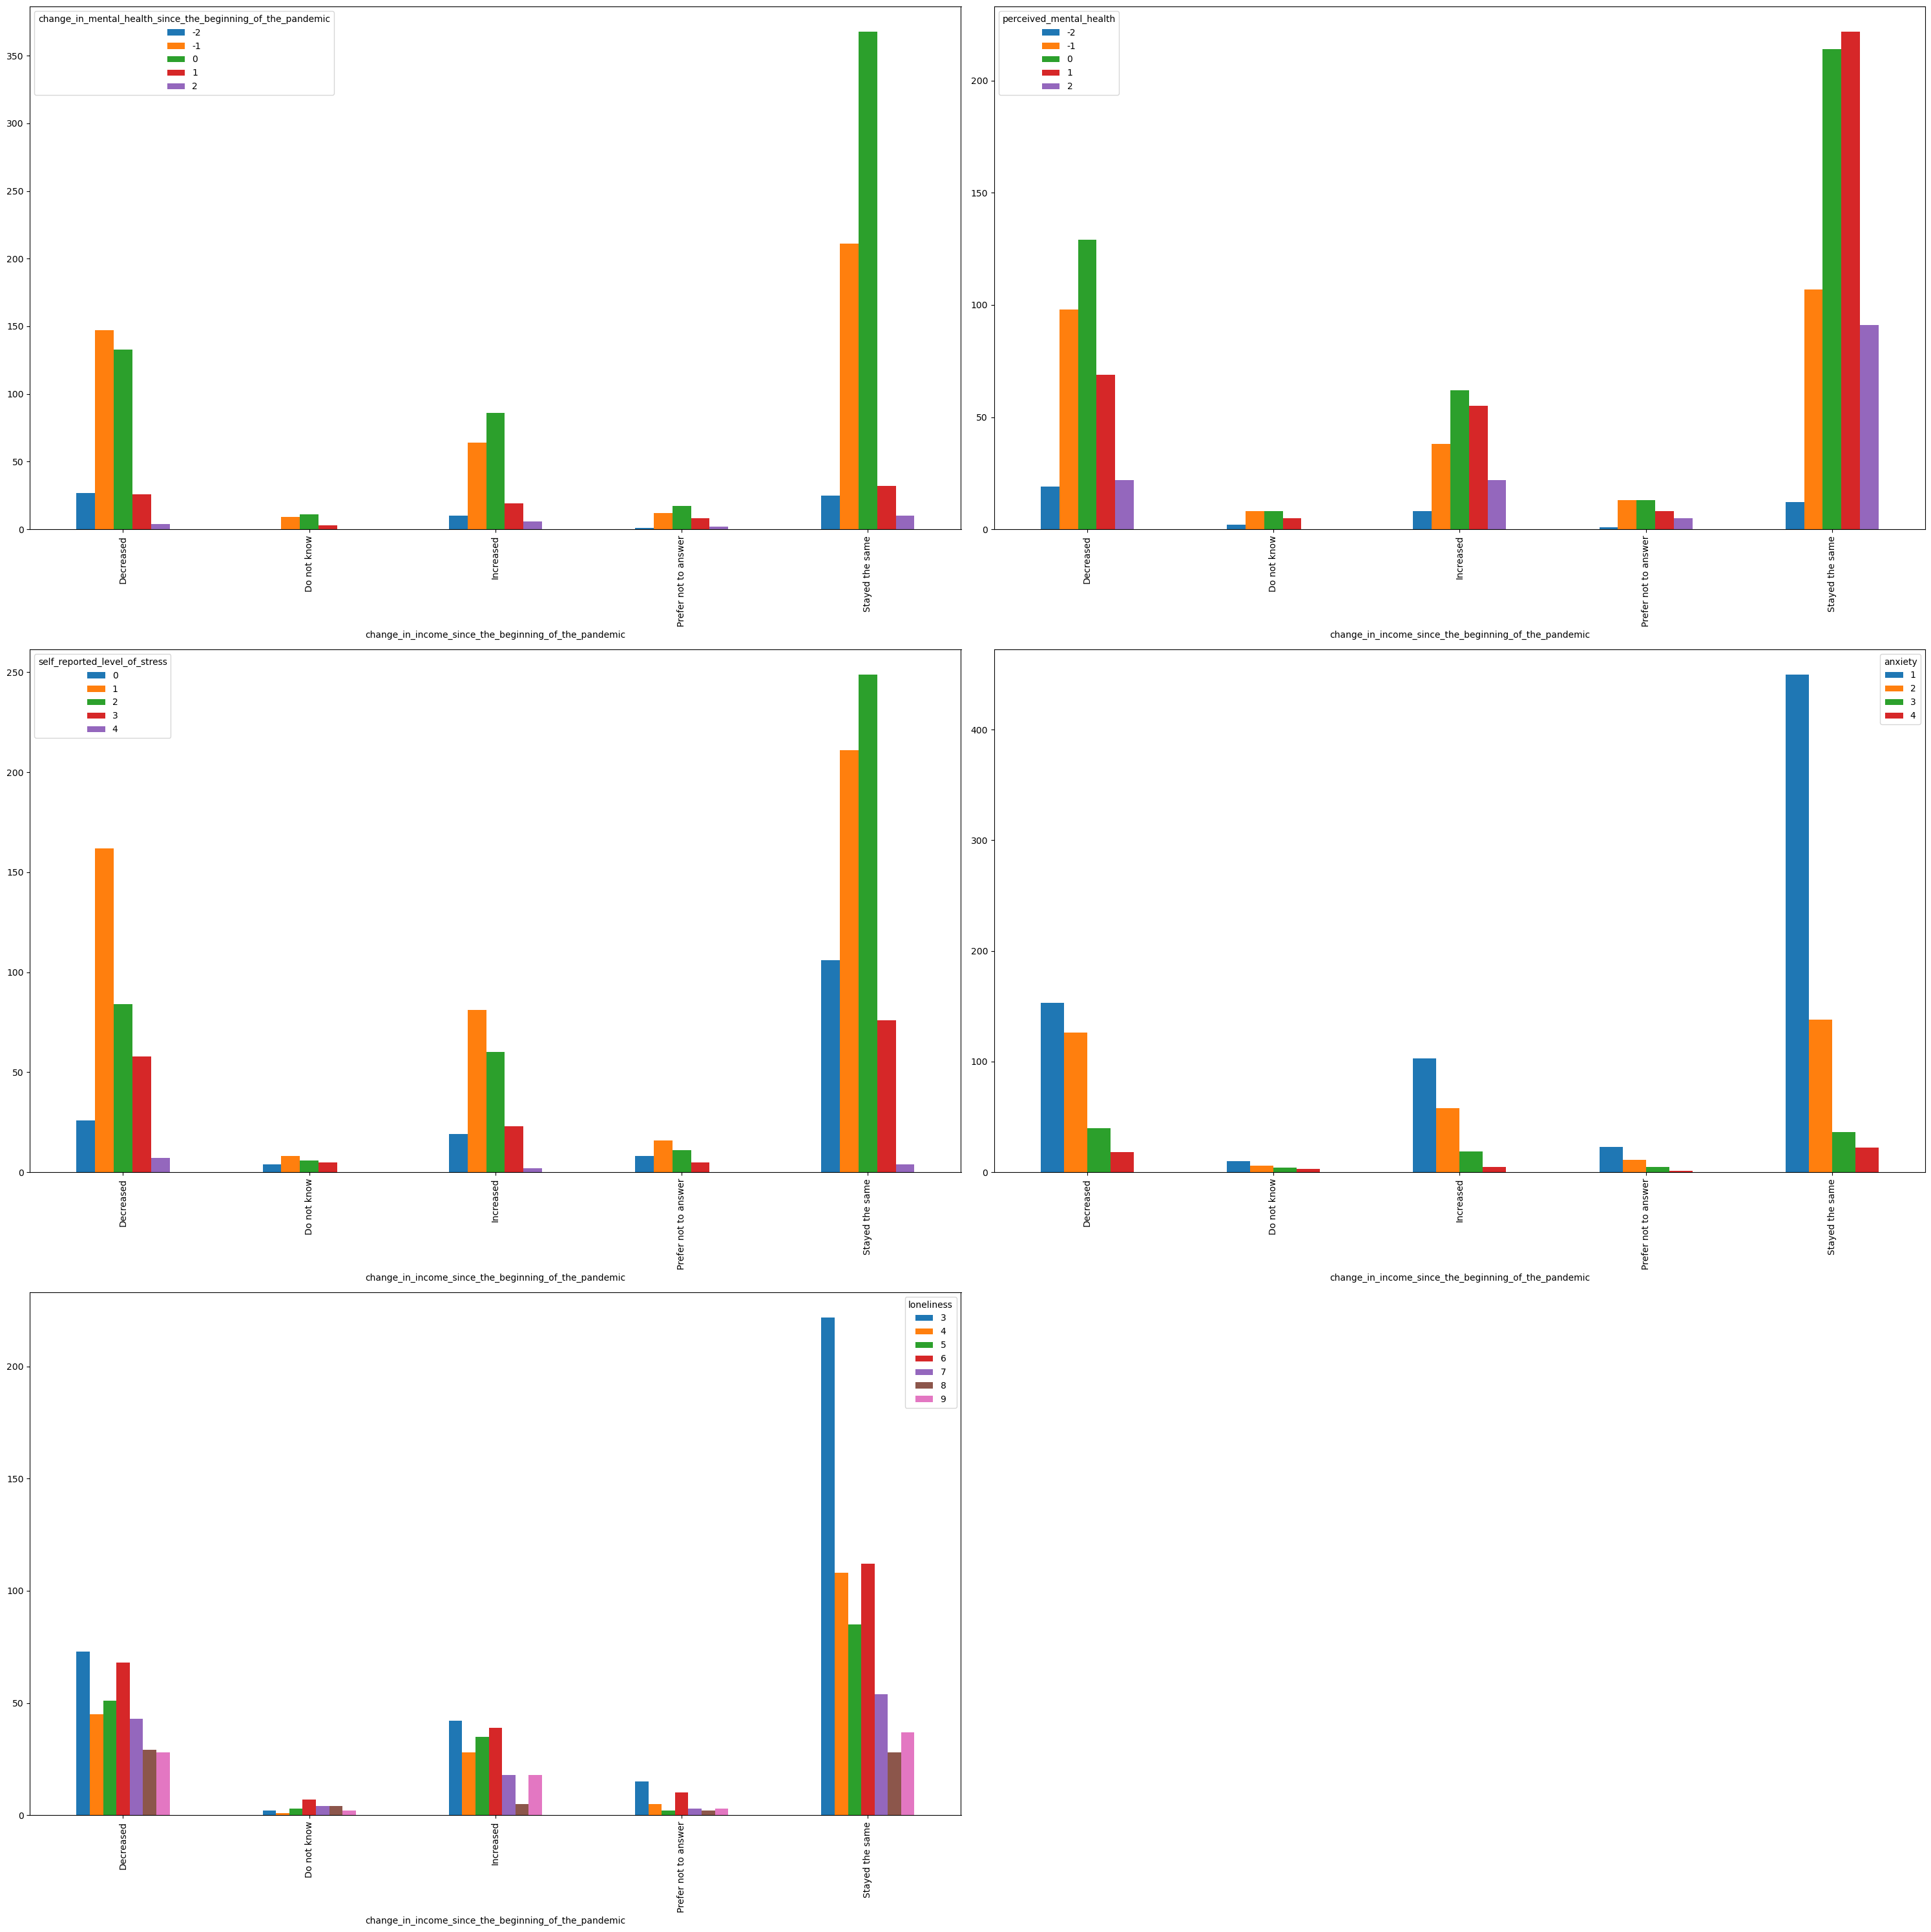

In [426]:
num_var = 5
num_cols = 2
num_rows = math.ceil(num_var/num_cols)
fig, axes = plt.subplots(num_rows, num_cols, figsize=(30, 30))

for i,var in enumerate(mh_indicator_cols):
    col = i%num_cols
    row = i//num_cols

    plotGroupedBar(cross_income_dict['change_in_income_since_the_beginning_of_the_pandemic'][var], ax=axes[row,col])

plt.delaxes(axes[2][1])

plt.tight_layout()
plt.show()
#change in mh: stayed the same for the same income, largest proportion of worse change for decreased income
#mh: stayed the same or better mh for same income; smallest proportion of worse mh for increased income;
#largest proportion of worse mh for the rest
#stress level: largest proportion of high stress for do not know; largest proportion of moderate stress for stayed the same; 
#largest proportion of high stress for decreased
#anxiety: largest proportion of low stress for same income; highest proportion of high stress for do not know
#loneliness: worst loneliness for decreased and increasede income; best for same income

#### thoughts behind observations
for change in income since the beginning of the pandemic:

change in mental health: 
- stayed the same for the same income
- largest proportion of worse change for decreased income

=> expected due to pressure

perceived mental healh: 
- stayed the same or better mh for same income
- smallest proportion of worse mh for increased income
- largest proportion of worse mh for the rest

=> expected due to pressure

stress level: 
- largest proportion of high stress for do not know income and decreased income
- largest proportion of moderate stress for same income

=> expected due to pressure, increased responsibility and uncertainty

anxiety: 
- largest proportion of low stress for same income
- largest proportion of high stress for do not know

=> expected due to pressure and uncertainty

loneliness: 
- worst loneliness for decreased and increased income
- best for same income

=> expected due to pressure and increased responsibility

### exploring covid-related variables

In [435]:
covid_cols

['number_of_people_in_the_household',
 'tested_positive_to-COVID19_or_household_member']

In [488]:
covid_df = data_modified[covid_cols + mh_indicator_cols]
covid_df.head()

number_of_people_in_the_household  \
0                                  4   
1                                  4   
4                                  2   
5                                  4   
7                                  3   

  tested_positive_to-COVID19_or_household_member  \
0                                              0   
1                                              0   
4                                              0   
5                                              0   
7                                              0   

  change_in_mental_health_since_the_beginning_of_the_pandemic  \
0                                                 -1            
1                                                 -2            
4                                                  1            
5                                                  0            
7                                                  0            

  perceived_mental_health self_reported_level_of_stress anxiety  loneliness  
0                       0                             1       3           8  
1                      -1                             1       1           5  
4                       1                             2       1           4  
5                       1                             2       1           5  
7                       0                             1       2           6

In [486]:
covid_df[covid_cols[0]].value_counts()

number_of_people_in_the_household
2    513
1    264
3    244
4    210
Name: count, dtype: int64

In [443]:
covid_df[covid_cols[1]].value_counts()

tested_positive_to-COVID19_or_household_member
0    1185
1      46
Name: count, dtype: int64

In [458]:
#point biserial correlation for tested_positive_to-COVID19_or_household_member
le = preprocessing.LabelEncoder()
df = covid_df
df['tested_positive_to-COVID19_or_household_member']= le.fit_transform(df['tested_positive_to-COVID19_or_household_member'])

for var in mh_indicator_cols:
    print(var)
    df[var] = le.fit_transform(df[var])
    result = stats.pointbiserialr(df[var], df['tested_positive_to-COVID19_or_household_member'])
    print(result)
    print('\n')

#only anxiety has any real correlation, and very low correlation

change_in_mental_health_since_the_beginning_of_the_pandemic
SignificanceResult(statistic=0.007469051583072407, pvalue=0.7934805319291827)


perceived_mental_health
SignificanceResult(statistic=0.01311862857743274, pvalue=0.6456402083492749)


self_reported_level_of_stress
SignificanceResult(statistic=0.03174814517402355, pvalue=0.2656861067720199)


anxiety
SignificanceResult(statistic=0.05862417386279592, pvalue=0.039730094079917296)


loneliness
SignificanceResult(statistic=0.033638756806197496, pvalue=0.2382504608202188)




/tmp/ipykernel_199412/495246940.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tested_positive_to-COVID19_or_household_member']= le.fit_transform(df['tested_positive_to-COVID19_or_household_member'])
/tmp/ipykernel_199412/495246940.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[var] = le.fit_transform(df[var])
/tmp/ipykernel_199412/495246940.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

In [460]:
#point biserial correlation for number_of_people_in_the_household
for var in mh_indicator_cols:
    print(var)
    df[var] = le.fit_transform(df[var])
    result = stats.pointbiserialr(df[var], df['number_of_people_in_the_household'])
    print(result)
    print('\n')

    #all are significant, reject null hypothesis

change_in_mental_health_since_the_beginning_of_the_pandemic
SignificanceResult(statistic=-0.08246236699597861, pvalue=0.0037887453088991225)


perceived_mental_health
SignificanceResult(statistic=-0.05805951963869797, pvalue=0.041679877083247885)


self_reported_level_of_stress
SignificanceResult(statistic=0.12452442964157405, pvalue=1.1778855078637357e-05)


anxiety
SignificanceResult(statistic=0.11160279042980188, pvalue=8.71132200548939e-05)


loneliness
SignificanceResult(statistic=-0.06218183936137774, pvalue=0.029140345915210836)




/tmp/ipykernel_199412/248923004.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[var] = le.fit_transform(df[var])
/tmp/ipykernel_199412/248923004.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[var] = le.fit_transform(df[var])
/tmp/ipykernel_199412/248923004.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/us

In [490]:
covid_df['change_in_mental_health_since_the_beginning_of_the_pandemic'].value_counts()

change_in_mental_health_since_the_beginning_of_the_pandemic
0     615
-1    443
1      88
-2     63
2      22
Name: count, dtype: int64

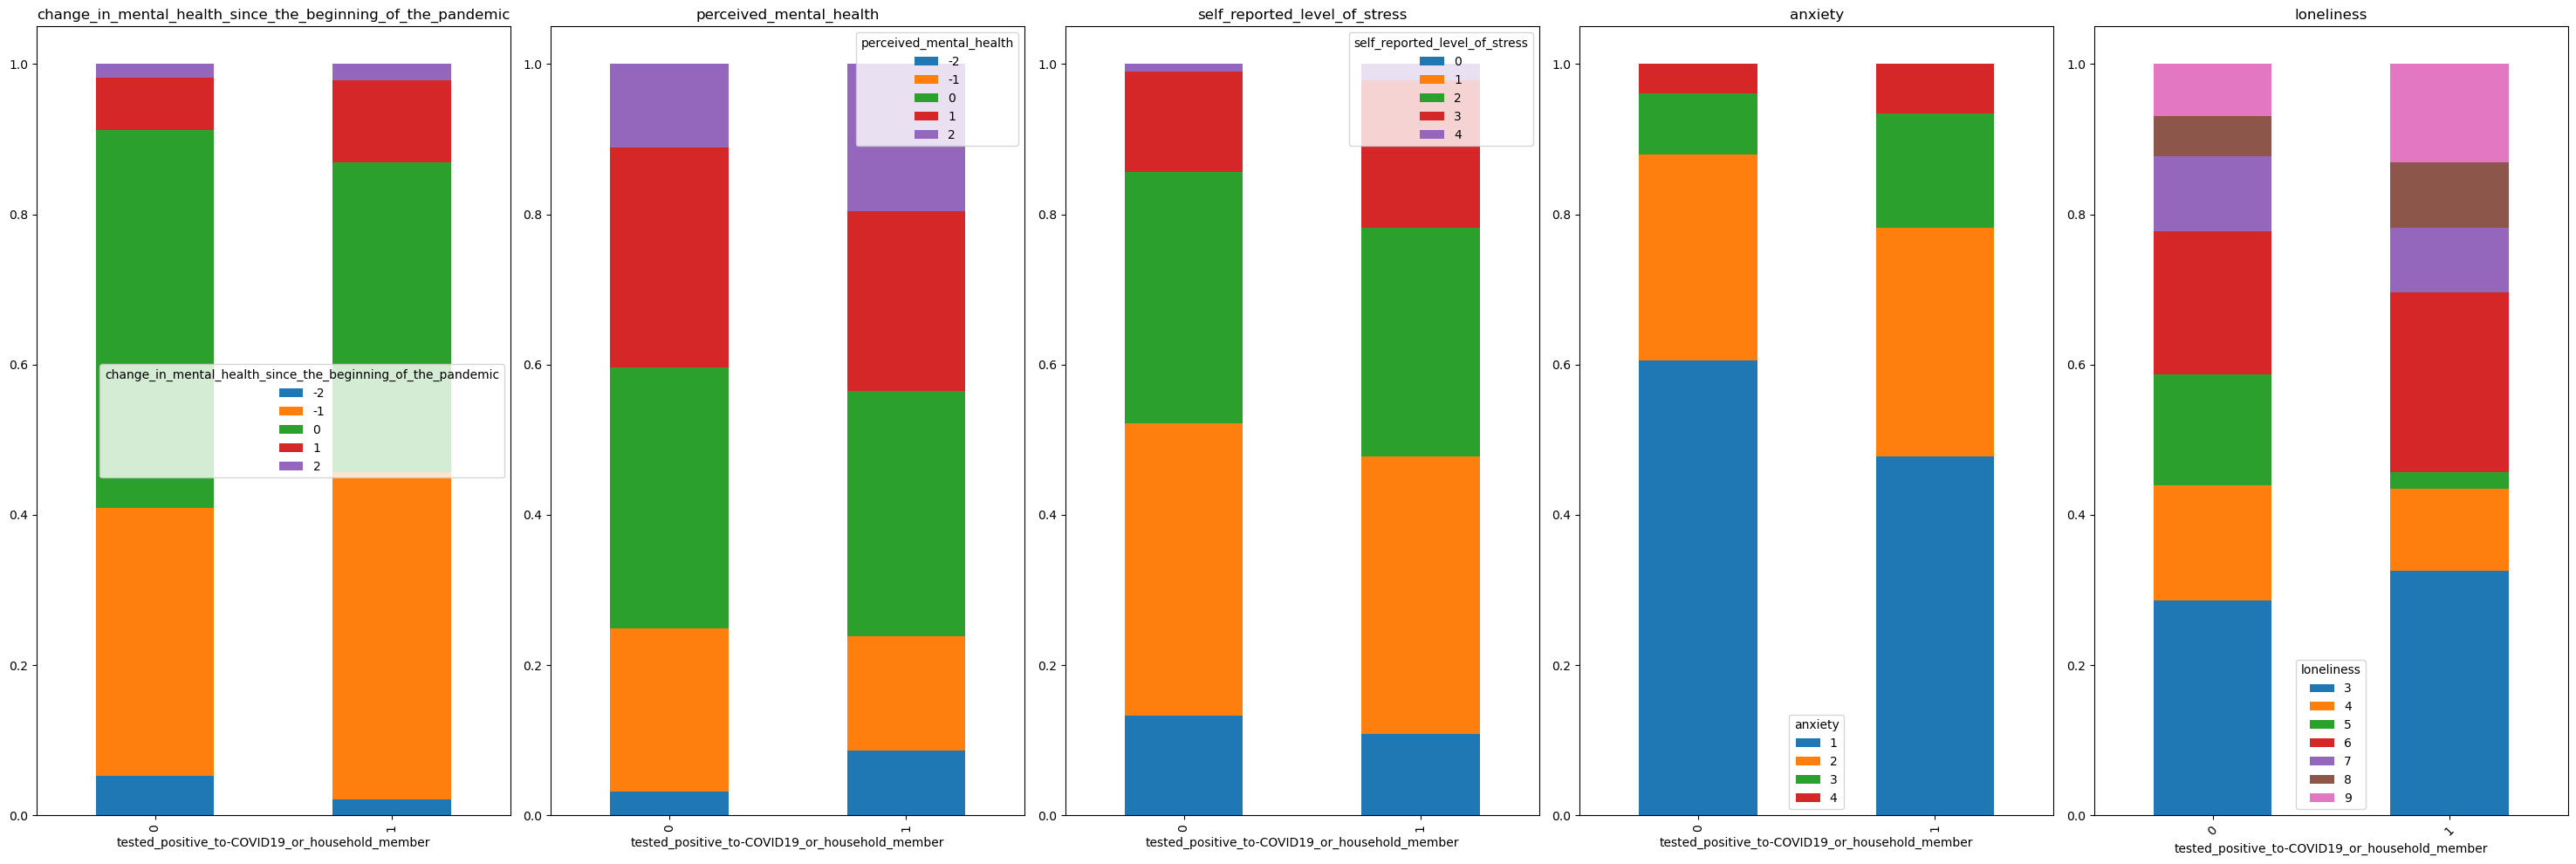

In [492]:
#stacked barplots for tested_positive_to-COVID19_or_household_member
fig, axes = plt.subplots(1, 5, figsize=(30, 10))

for i, var in enumerate(mh_indicator_cols):
    plotStackedBar(covid_df , 'tested_positive_to-COVID19_or_household_member', var, ax=axes[i], title=var)

plt.tight_layout()
plt.show()

#change in mh: more positive change in those with; more negative change in those without
#mh: tend more towards the extremes in those with
#stress level: worse in those with
#anxiety: worse in those with
#loneliness: worse in those with

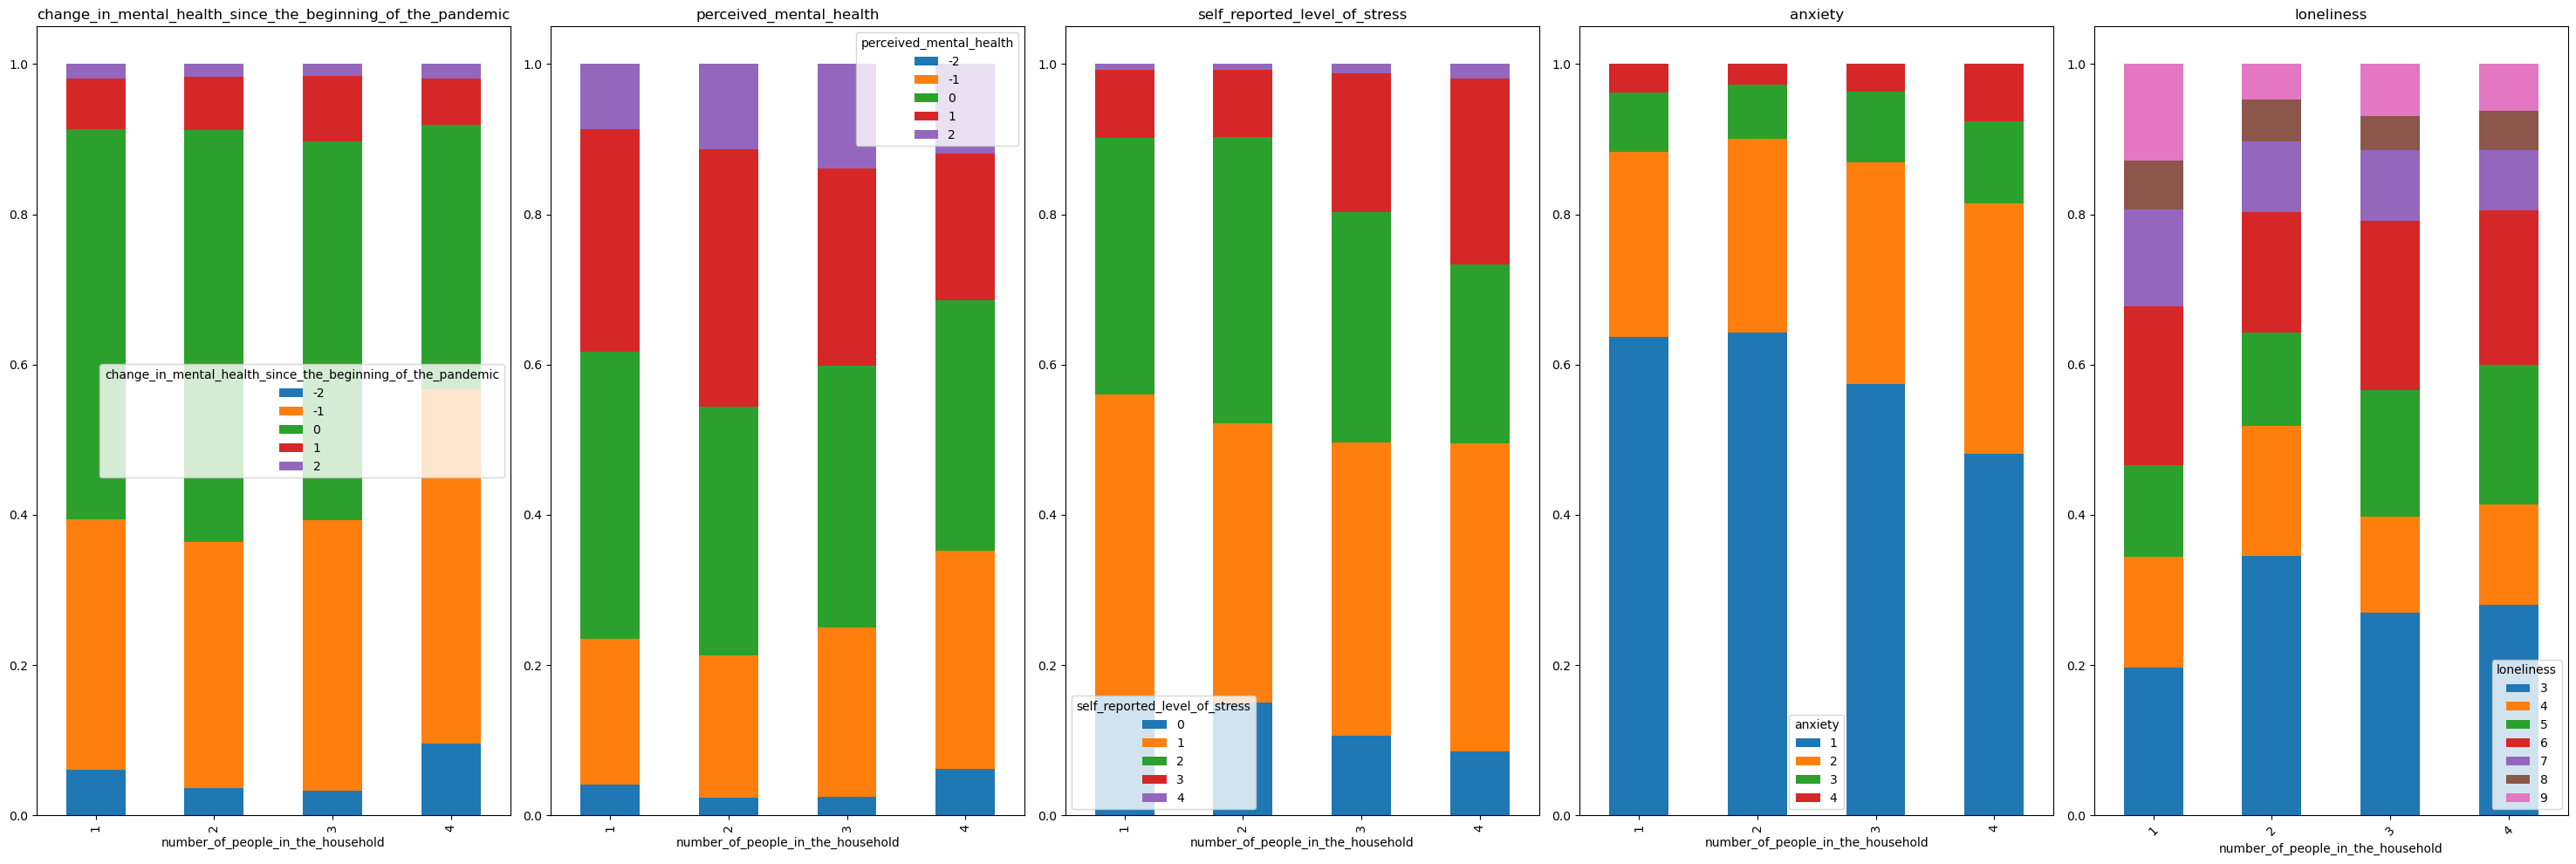

In [501]:
#stacked barplots for number_of_people_in_the_household
fig, axes = plt.subplots(1, 5, figsize=(30, 10))

for i, var in enumerate(mh_indicator_cols):
    plotStackedBar(covid_df , 'number_of_people_in_the_household', var, ax=axes[i], title=var)

plt.tight_layout()
plt.show()

#change in mh: worsens with more people in the household
#mh: worst for 4 members, gets better from 3 to 1 to 2
#stress level:

In [494]:
cross_covid_dict = {}
num_household_dict = {}
covid_dict = {}

for var in mh_indicator_cols:
    cross1 = pd.crosstab(covid_df['tested_positive_to-COVID19_or_household_member'] , covid_df[var])
    covid_dict[var] = cross1
    cross2 = pd.crosstab(covid_df['number_of_people_in_the_household'], covid_df[var])
    num_household_dict[var] = cross2

cross_covid_dict['tested_positive_to-COVID19_or_household_member'] = covid_dict
cross_covid_dict['number_of_people_in_the_household'] = num_household_dict

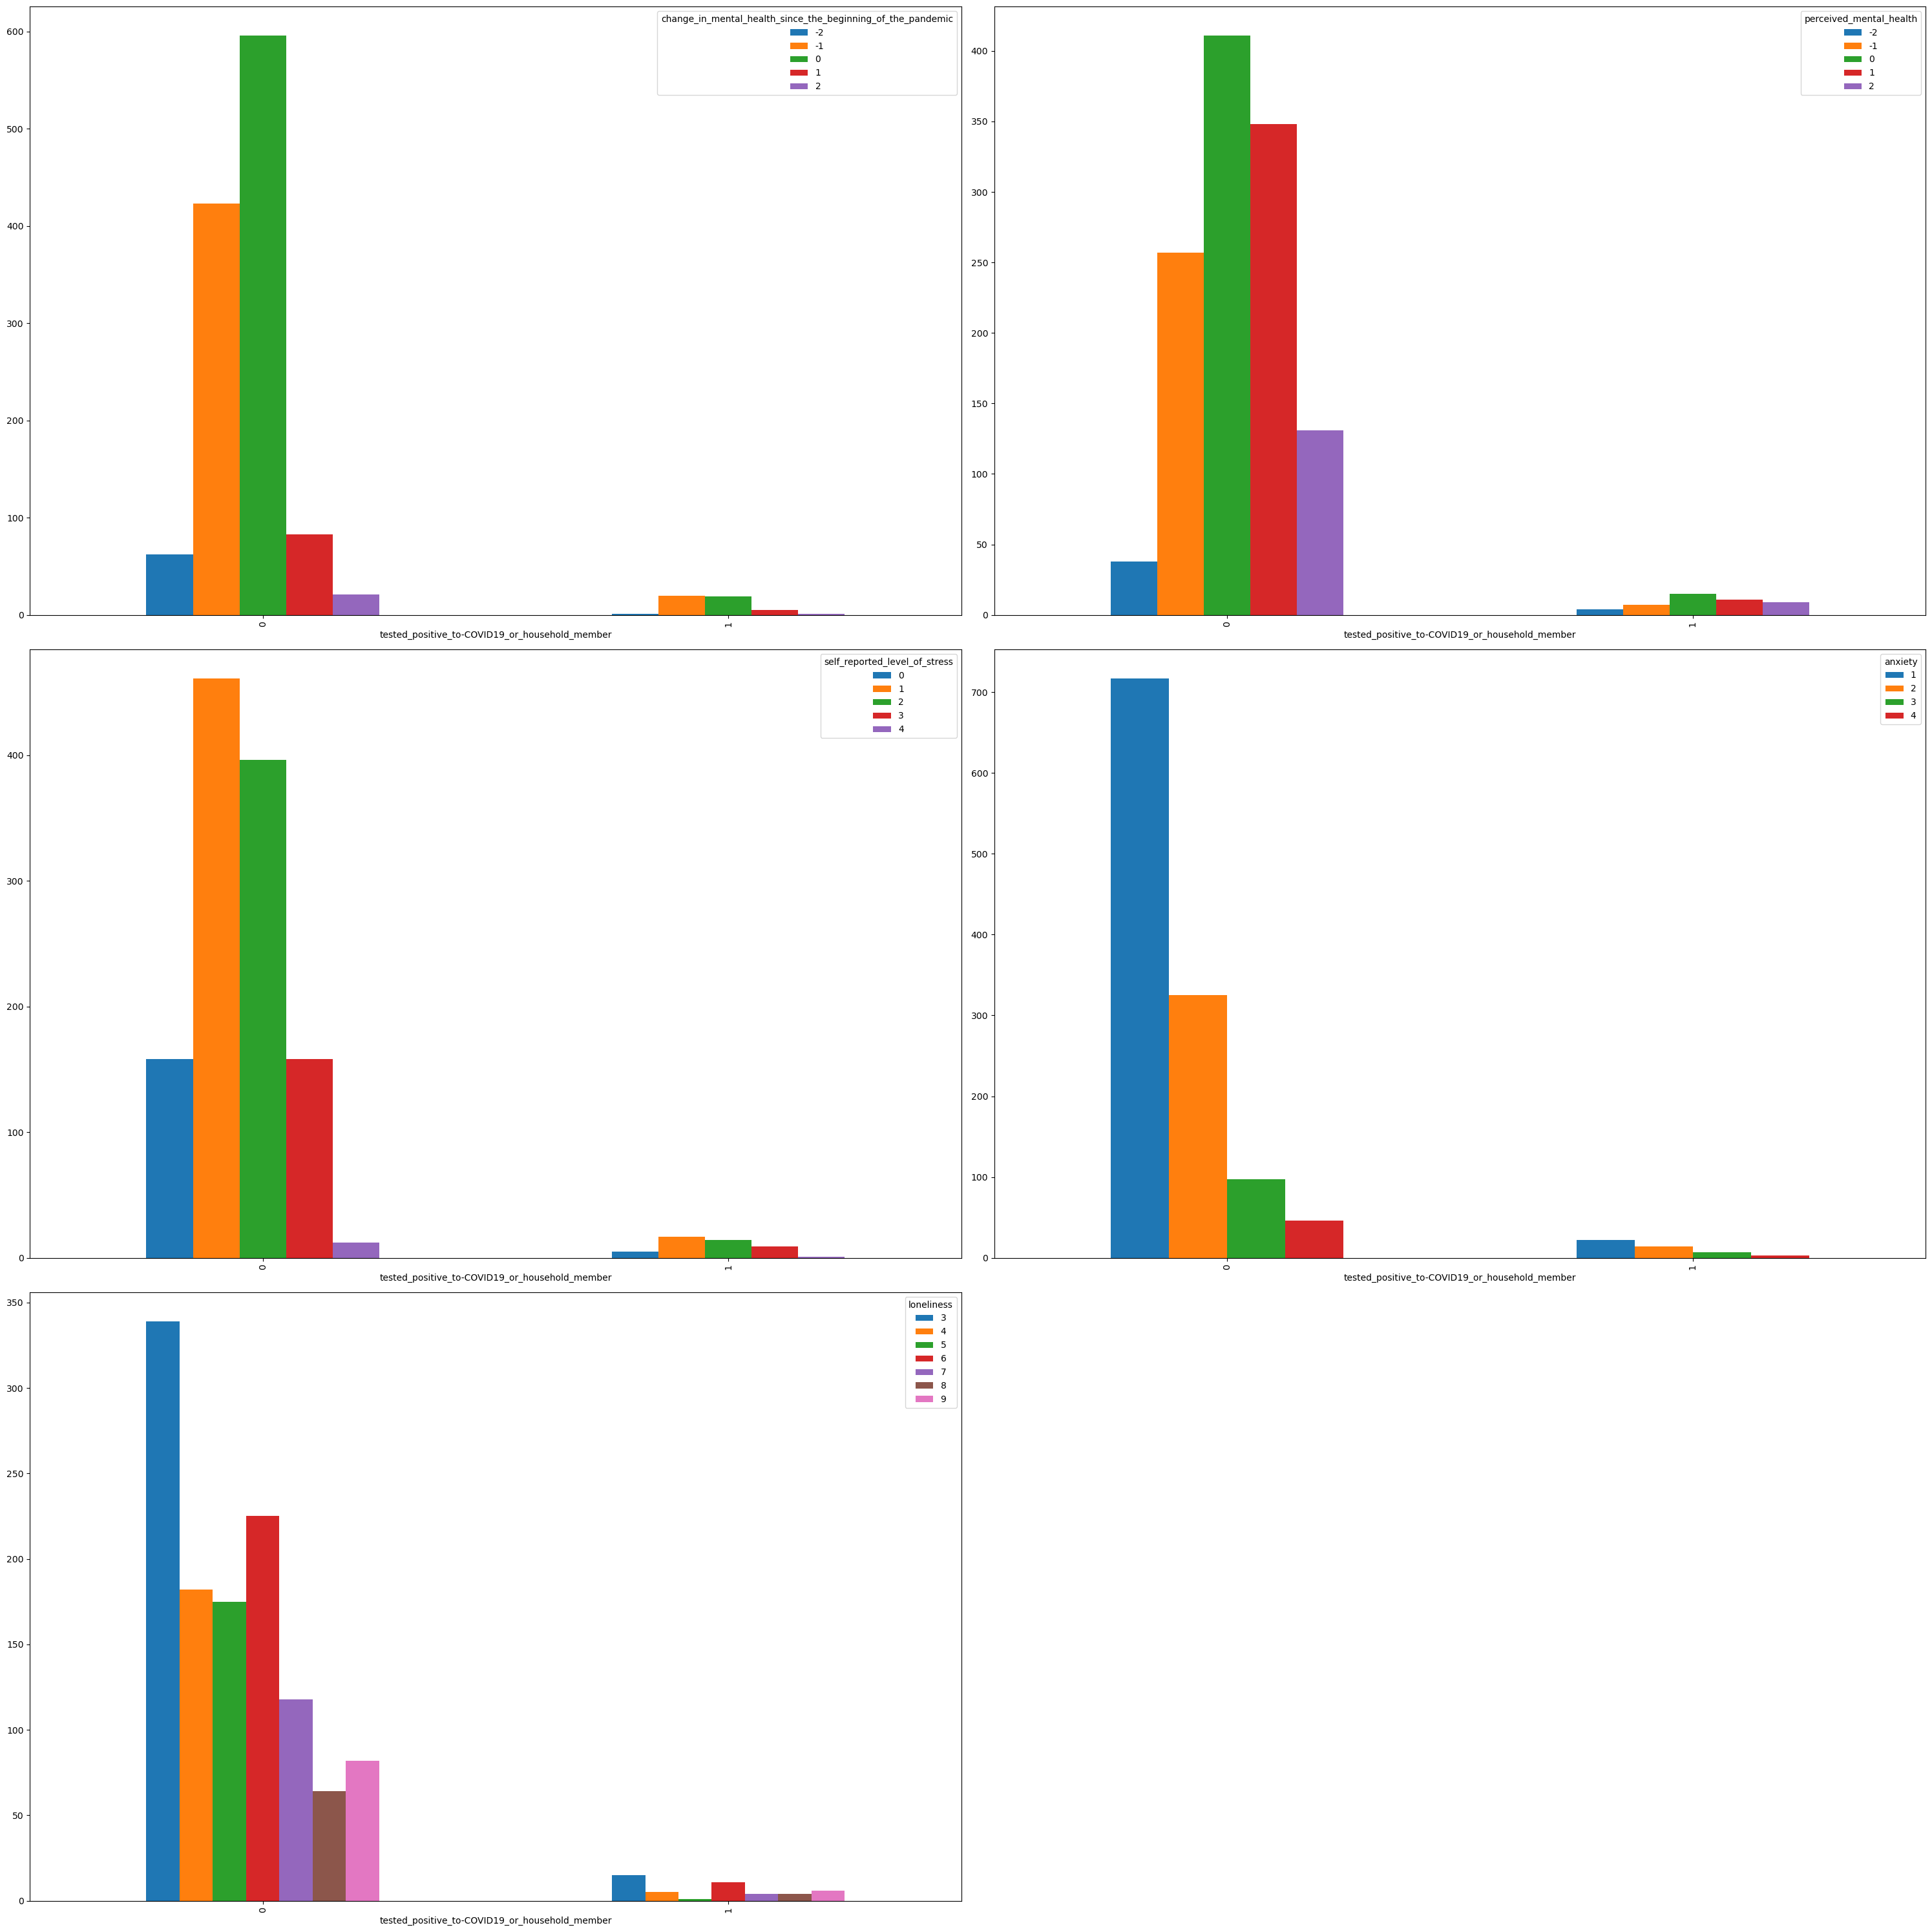

In [496]:
num_var = 5
num_cols = 2
num_rows = math.ceil(num_var/num_cols)
fig, axes = plt.subplots(num_rows, num_cols, figsize=(30, 30))

for i,var in enumerate(mh_indicator_cols):
    col = i%num_cols
    row = i//num_cols

    plotGroupedBar(cross_covid_dict['tested_positive_to-COVID19_or_household_member'][var], ax=axes[row,col])

plt.delaxes(axes[2][1])

plt.tight_layout()
plt.show()

#

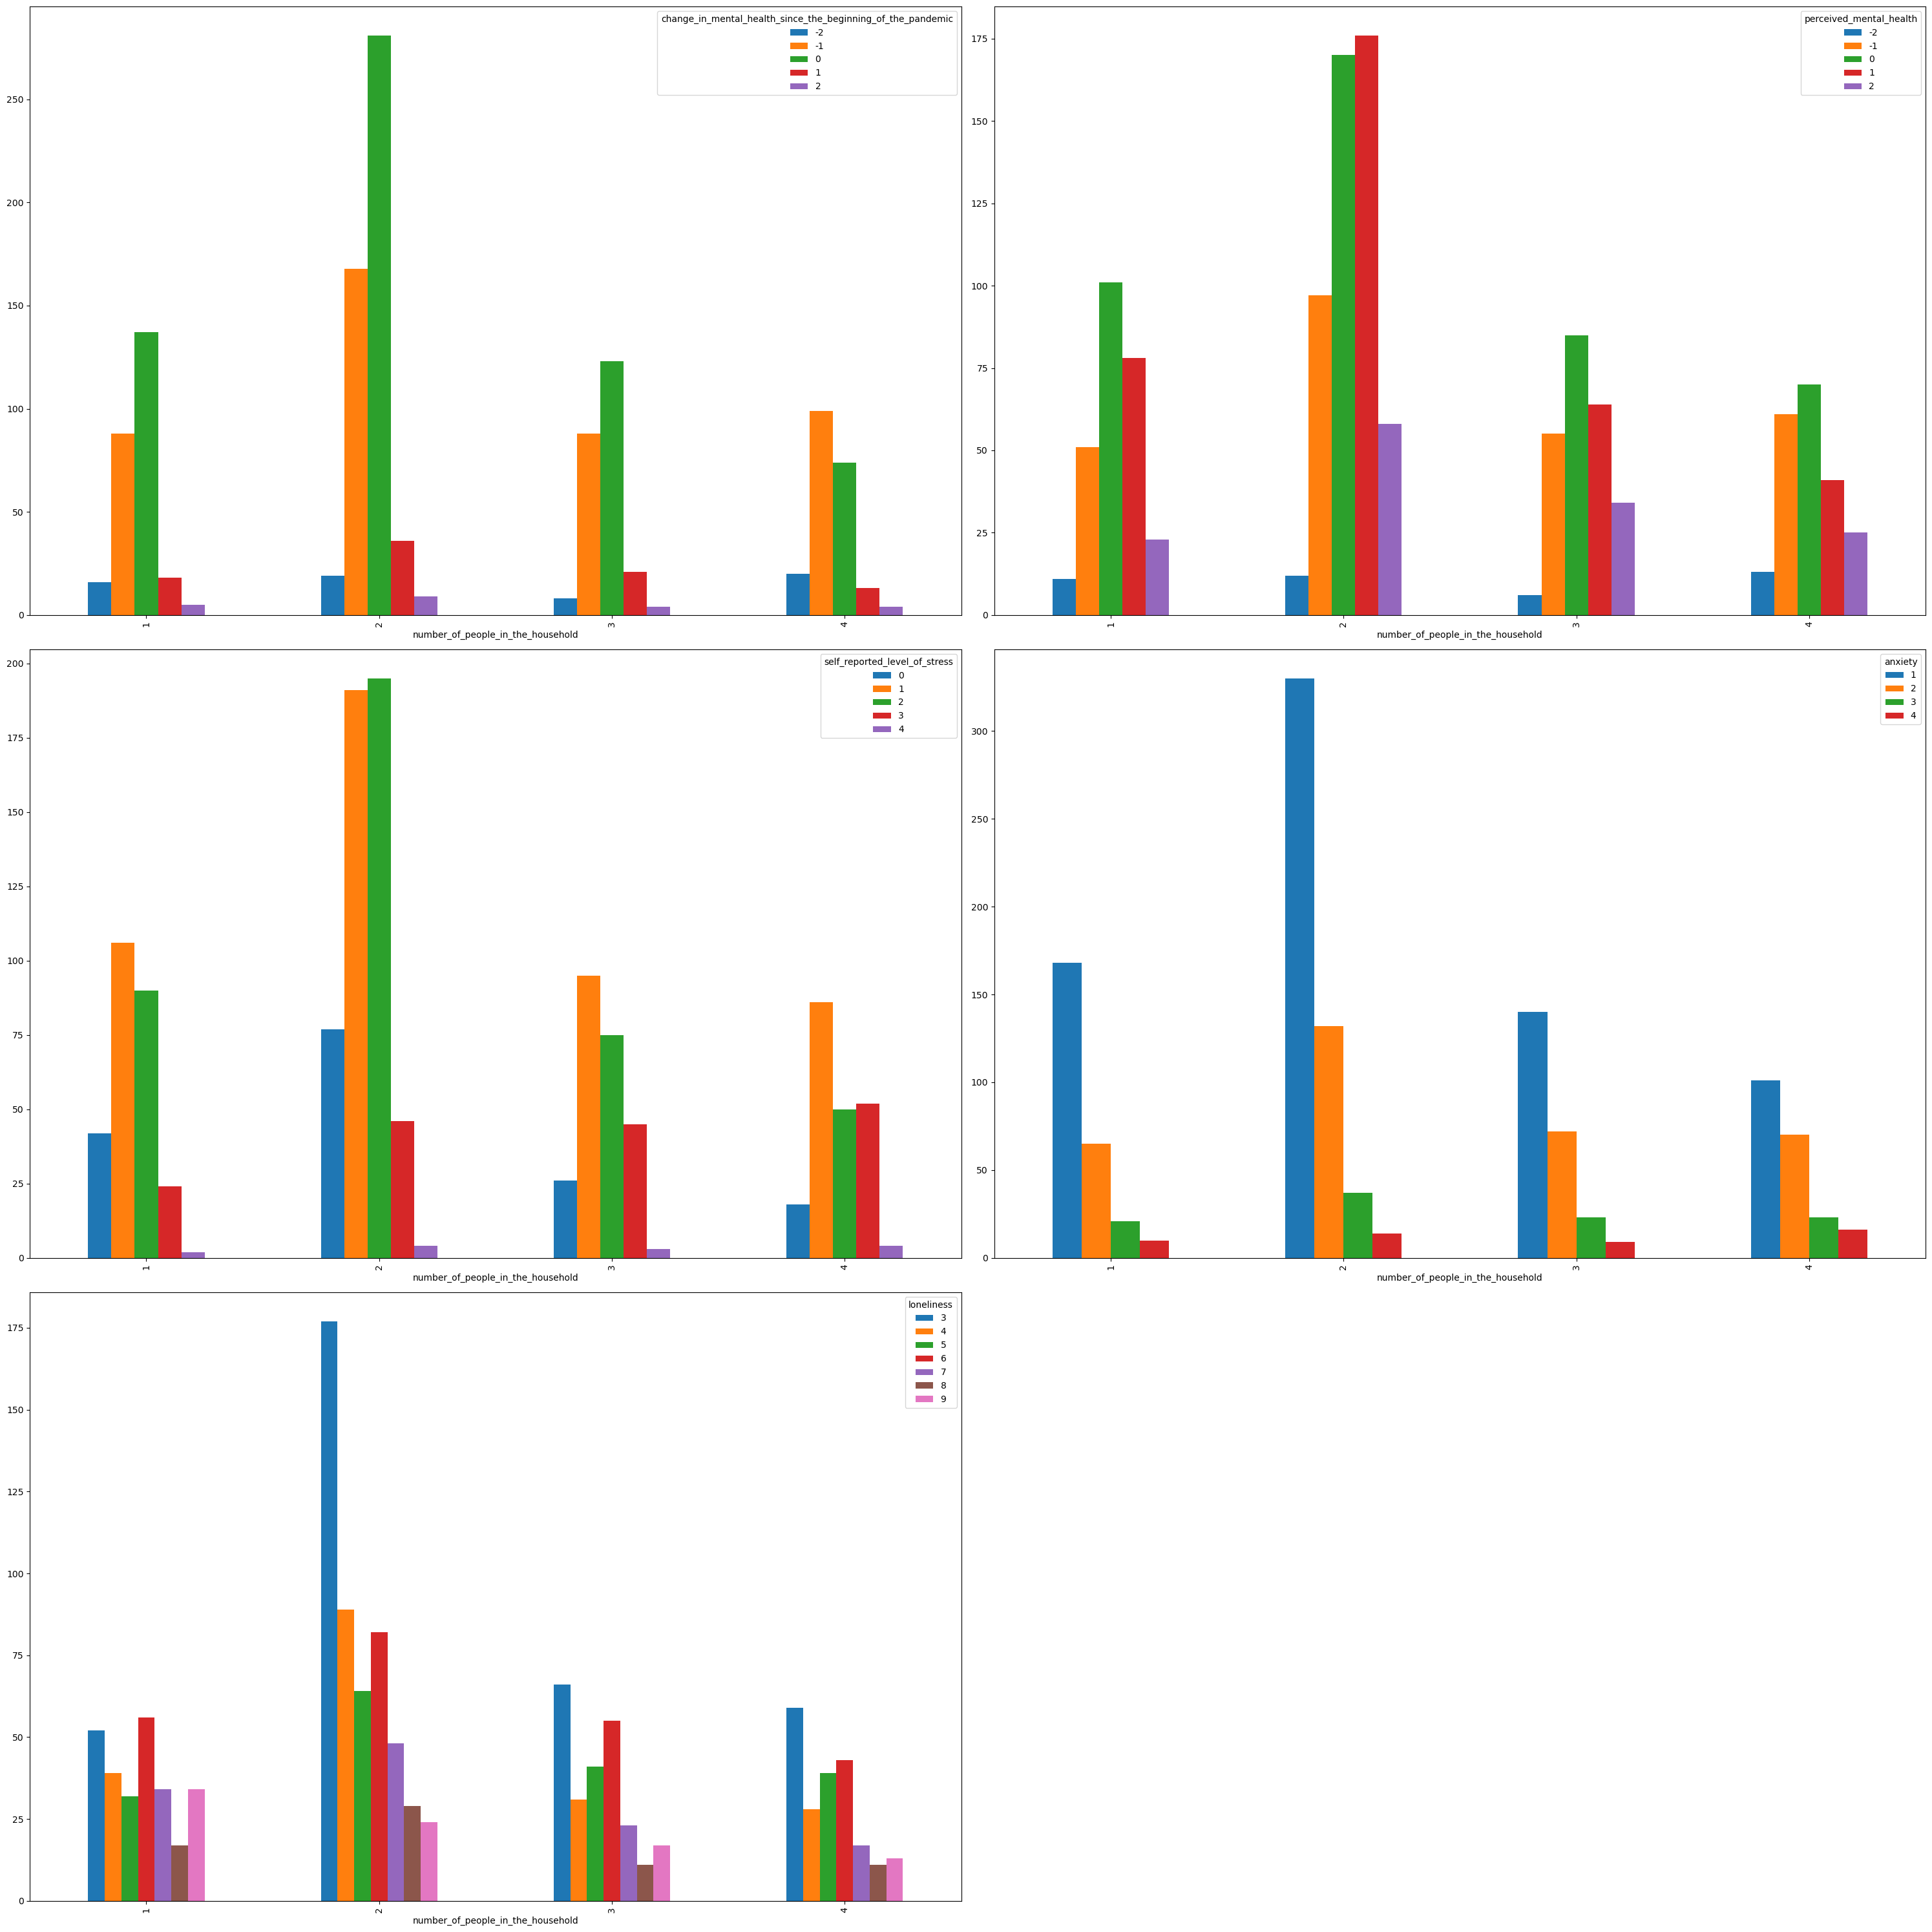

In [498]:
num_var = 5
num_cols = 2
num_rows = math.ceil(num_var/num_cols)
fig, axes = plt.subplots(num_rows, num_cols, figsize=(30, 30))

for i,var in enumerate(mh_indicator_cols):
    col = i%num_cols
    row = i//num_cols

    plotGroupedBar(cross_covid_dict['number_of_people_in_the_household'][var], ax=axes[row,col])

plt.delaxes(axes[2][1])

plt.tight_layout()
plt.show()

In [503]:
#comparing household differences with covid positive and negative
covid_positive_df = covid_df[covid_df['tested_positive_to-COVID19_or_household_member'] == 1]
covid_negative_df = covid_df[covid_df['tested_positive_to-COVID19_or_household_member'] == 0]

In [505]:
num_household_positive_dict = {}

for var in mh_indicator_cols:
    cross2 = pd.crosstab(covid_positive_df['number_of_people_in_the_household'], covid_positive_df[var])
    num_household_positive_dict[var] = cross2

num_household_negative_dict = {}

for var in mh_indicator_cols:
    cross2 = pd.crosstab(covid_negative_df['number_of_people_in_the_household'], covid_negative_df[var])
    num_household_negative_dict[var] = cross2

In [515]:
mh_indicator_cols

['change_in_mental_health_since_the_beginning_of_the_pandemic',
 'perceived_mental_health',
 'self_reported_level_of_stress',
 'anxiety',
 'loneliness']

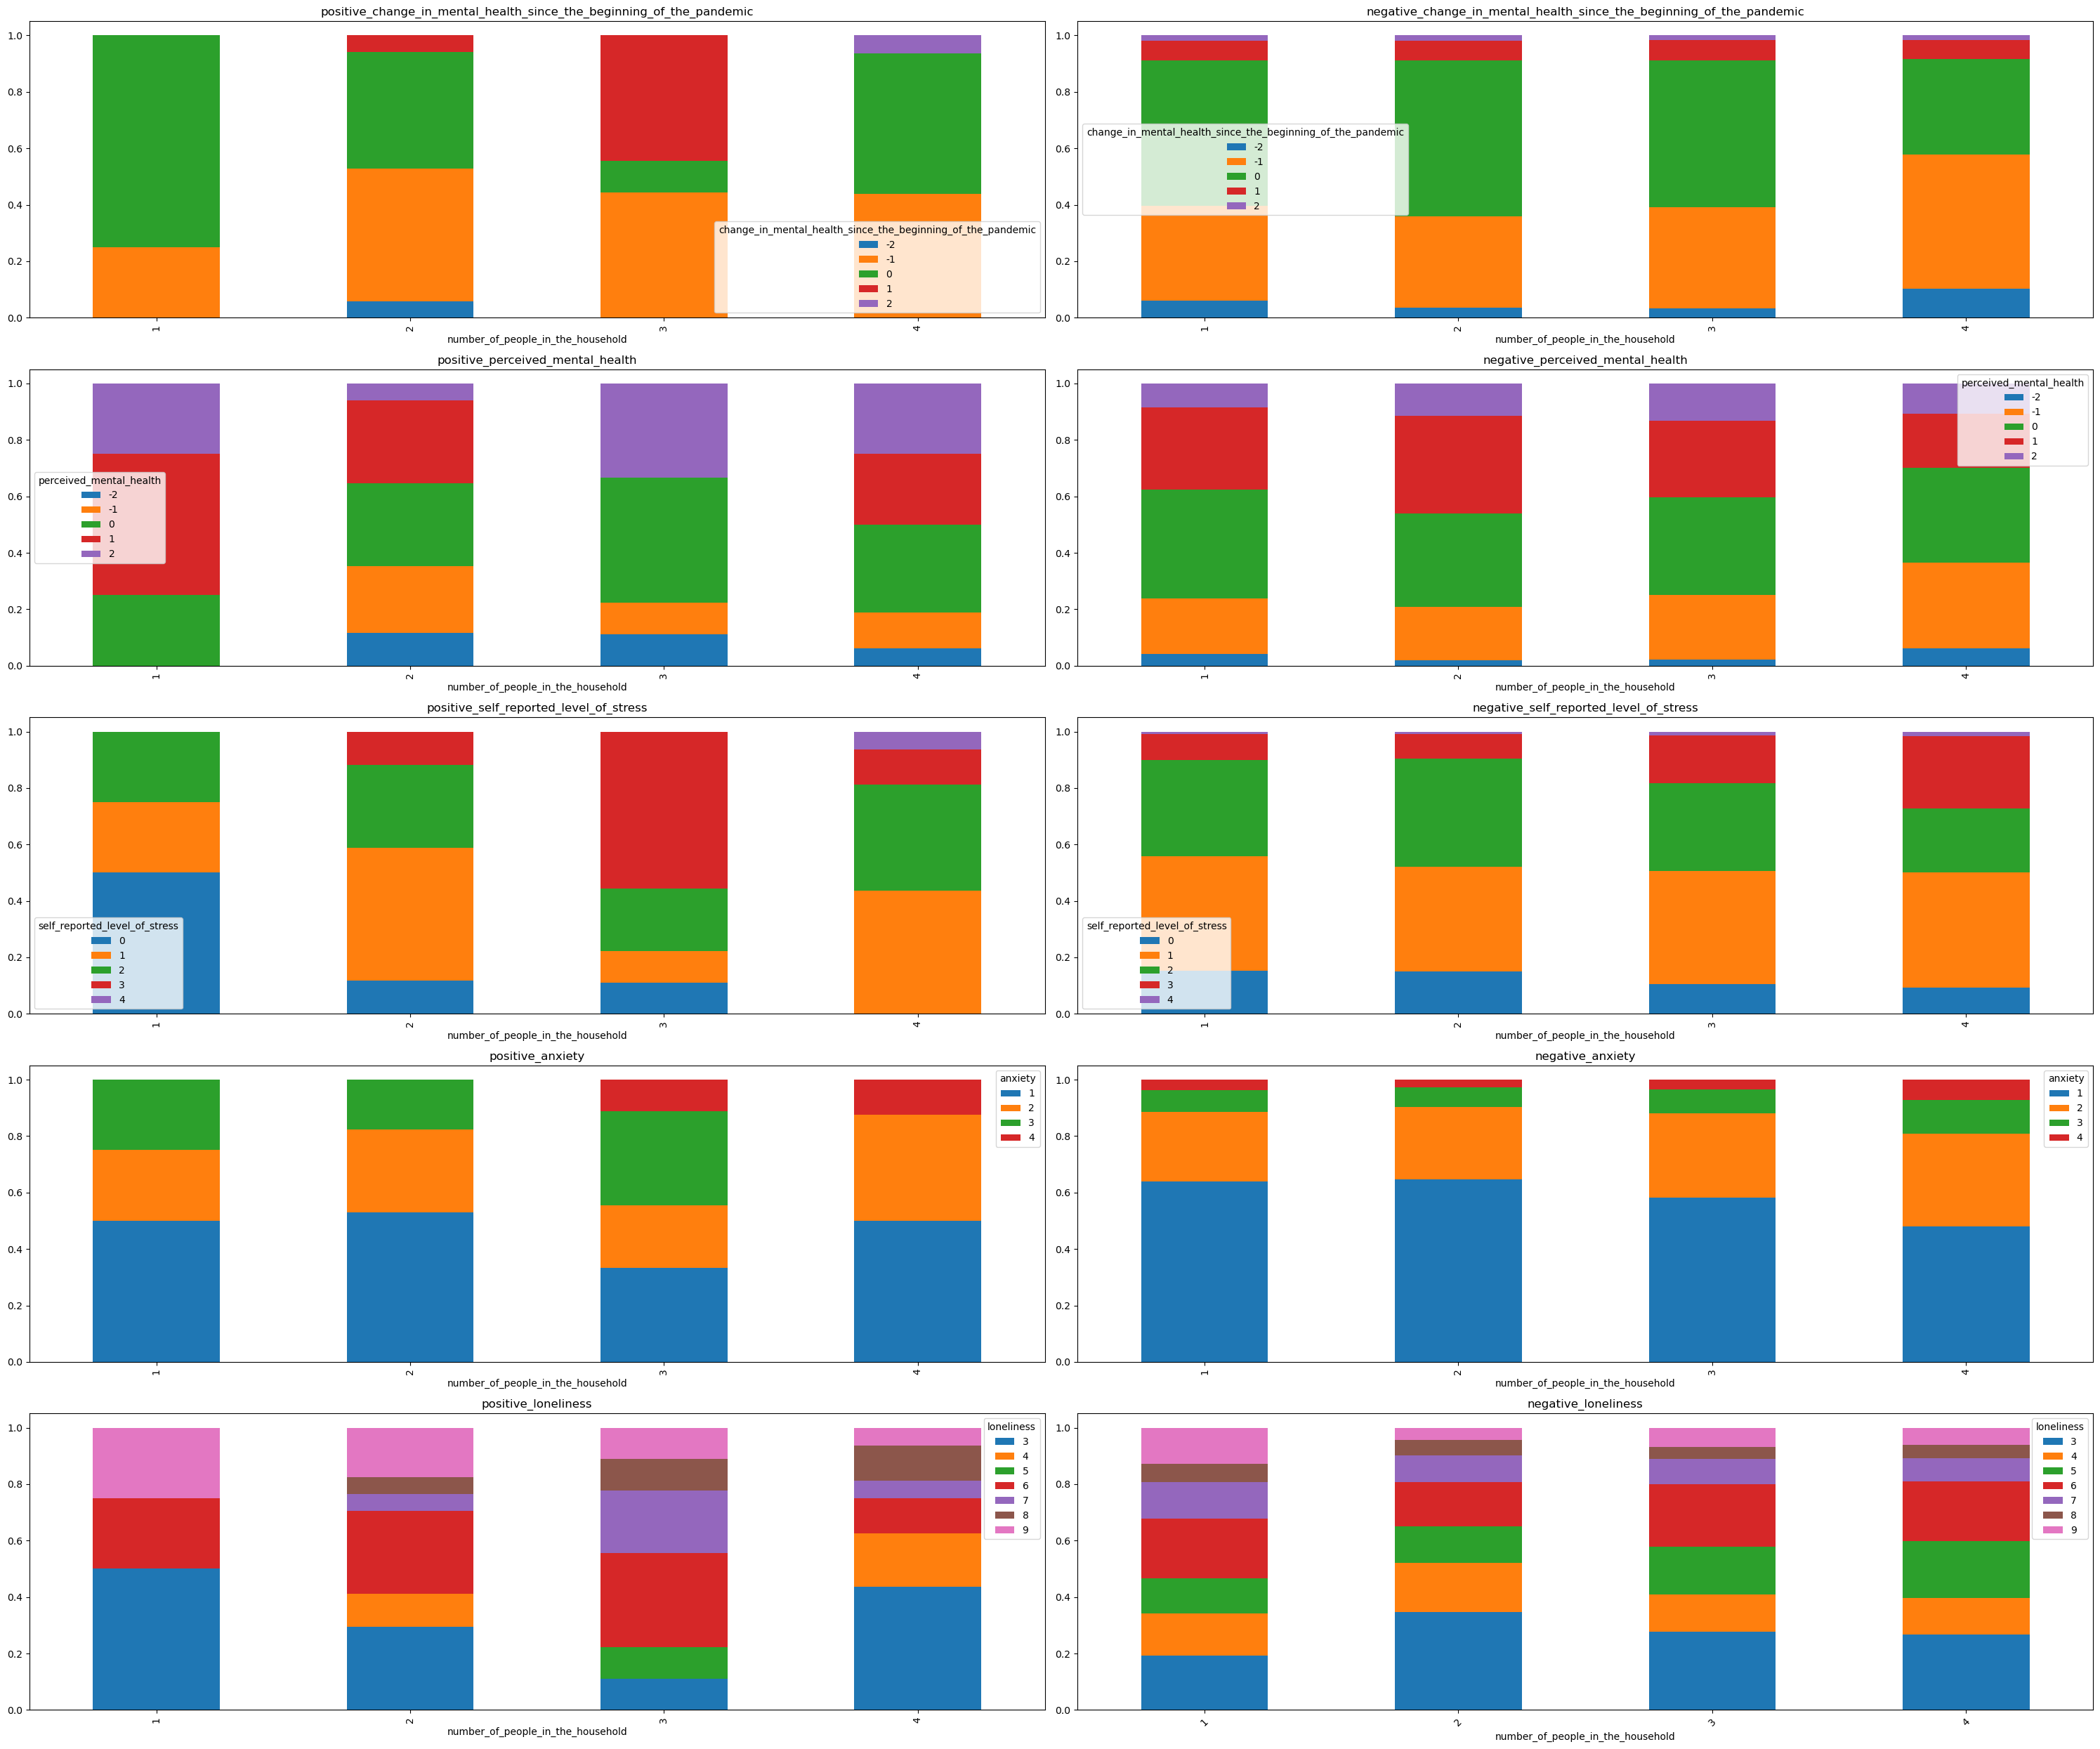

In [525]:
#comparing stacked barplots for number_of_people_in_the_household
fig, axes = plt.subplots(5, 2, figsize=(30, 25))

for i, var in enumerate(mh_indicator_cols):
    name_positive = 'positive_' + var 
    plotStackedBar(covid_positive_df, 'number_of_people_in_the_household', var, ax=axes[i, 0], title=name_positive)
    name_negative = 'negative_' + var 
    plotStackedBar(covid_negative_df, 'number_of_people_in_the_household', var, ax=axes[i, 1], title=name_negative)

plt.tight_layout()
plt.show()

#change in mh: positive(best with 1 person, then 3/4, then 2); negative(best with 2 people, then 3, then 1, then 4- no significant variation)
#mh: positive(best with 1 person, then 4, then 2/3); negative(best with 2 people. then 1/3, then 4- no significant variation)
#stress level: positive(best with 1, then 2, then 4, then 3); negative(best with 2, then 1, then 3, then 4)
#anxiety: positive(best with 2, then 1, then 4, then 3); negative(best with 2, then 1, then 3, then 4)
#loneliness: positive(best with 4, then 2, then 1/3- 1 has highest proportion of extreme loneliness); 
#negative(best with 2, then 4, then 3, then 1- 1 has most equal distribution of loneliness levels)

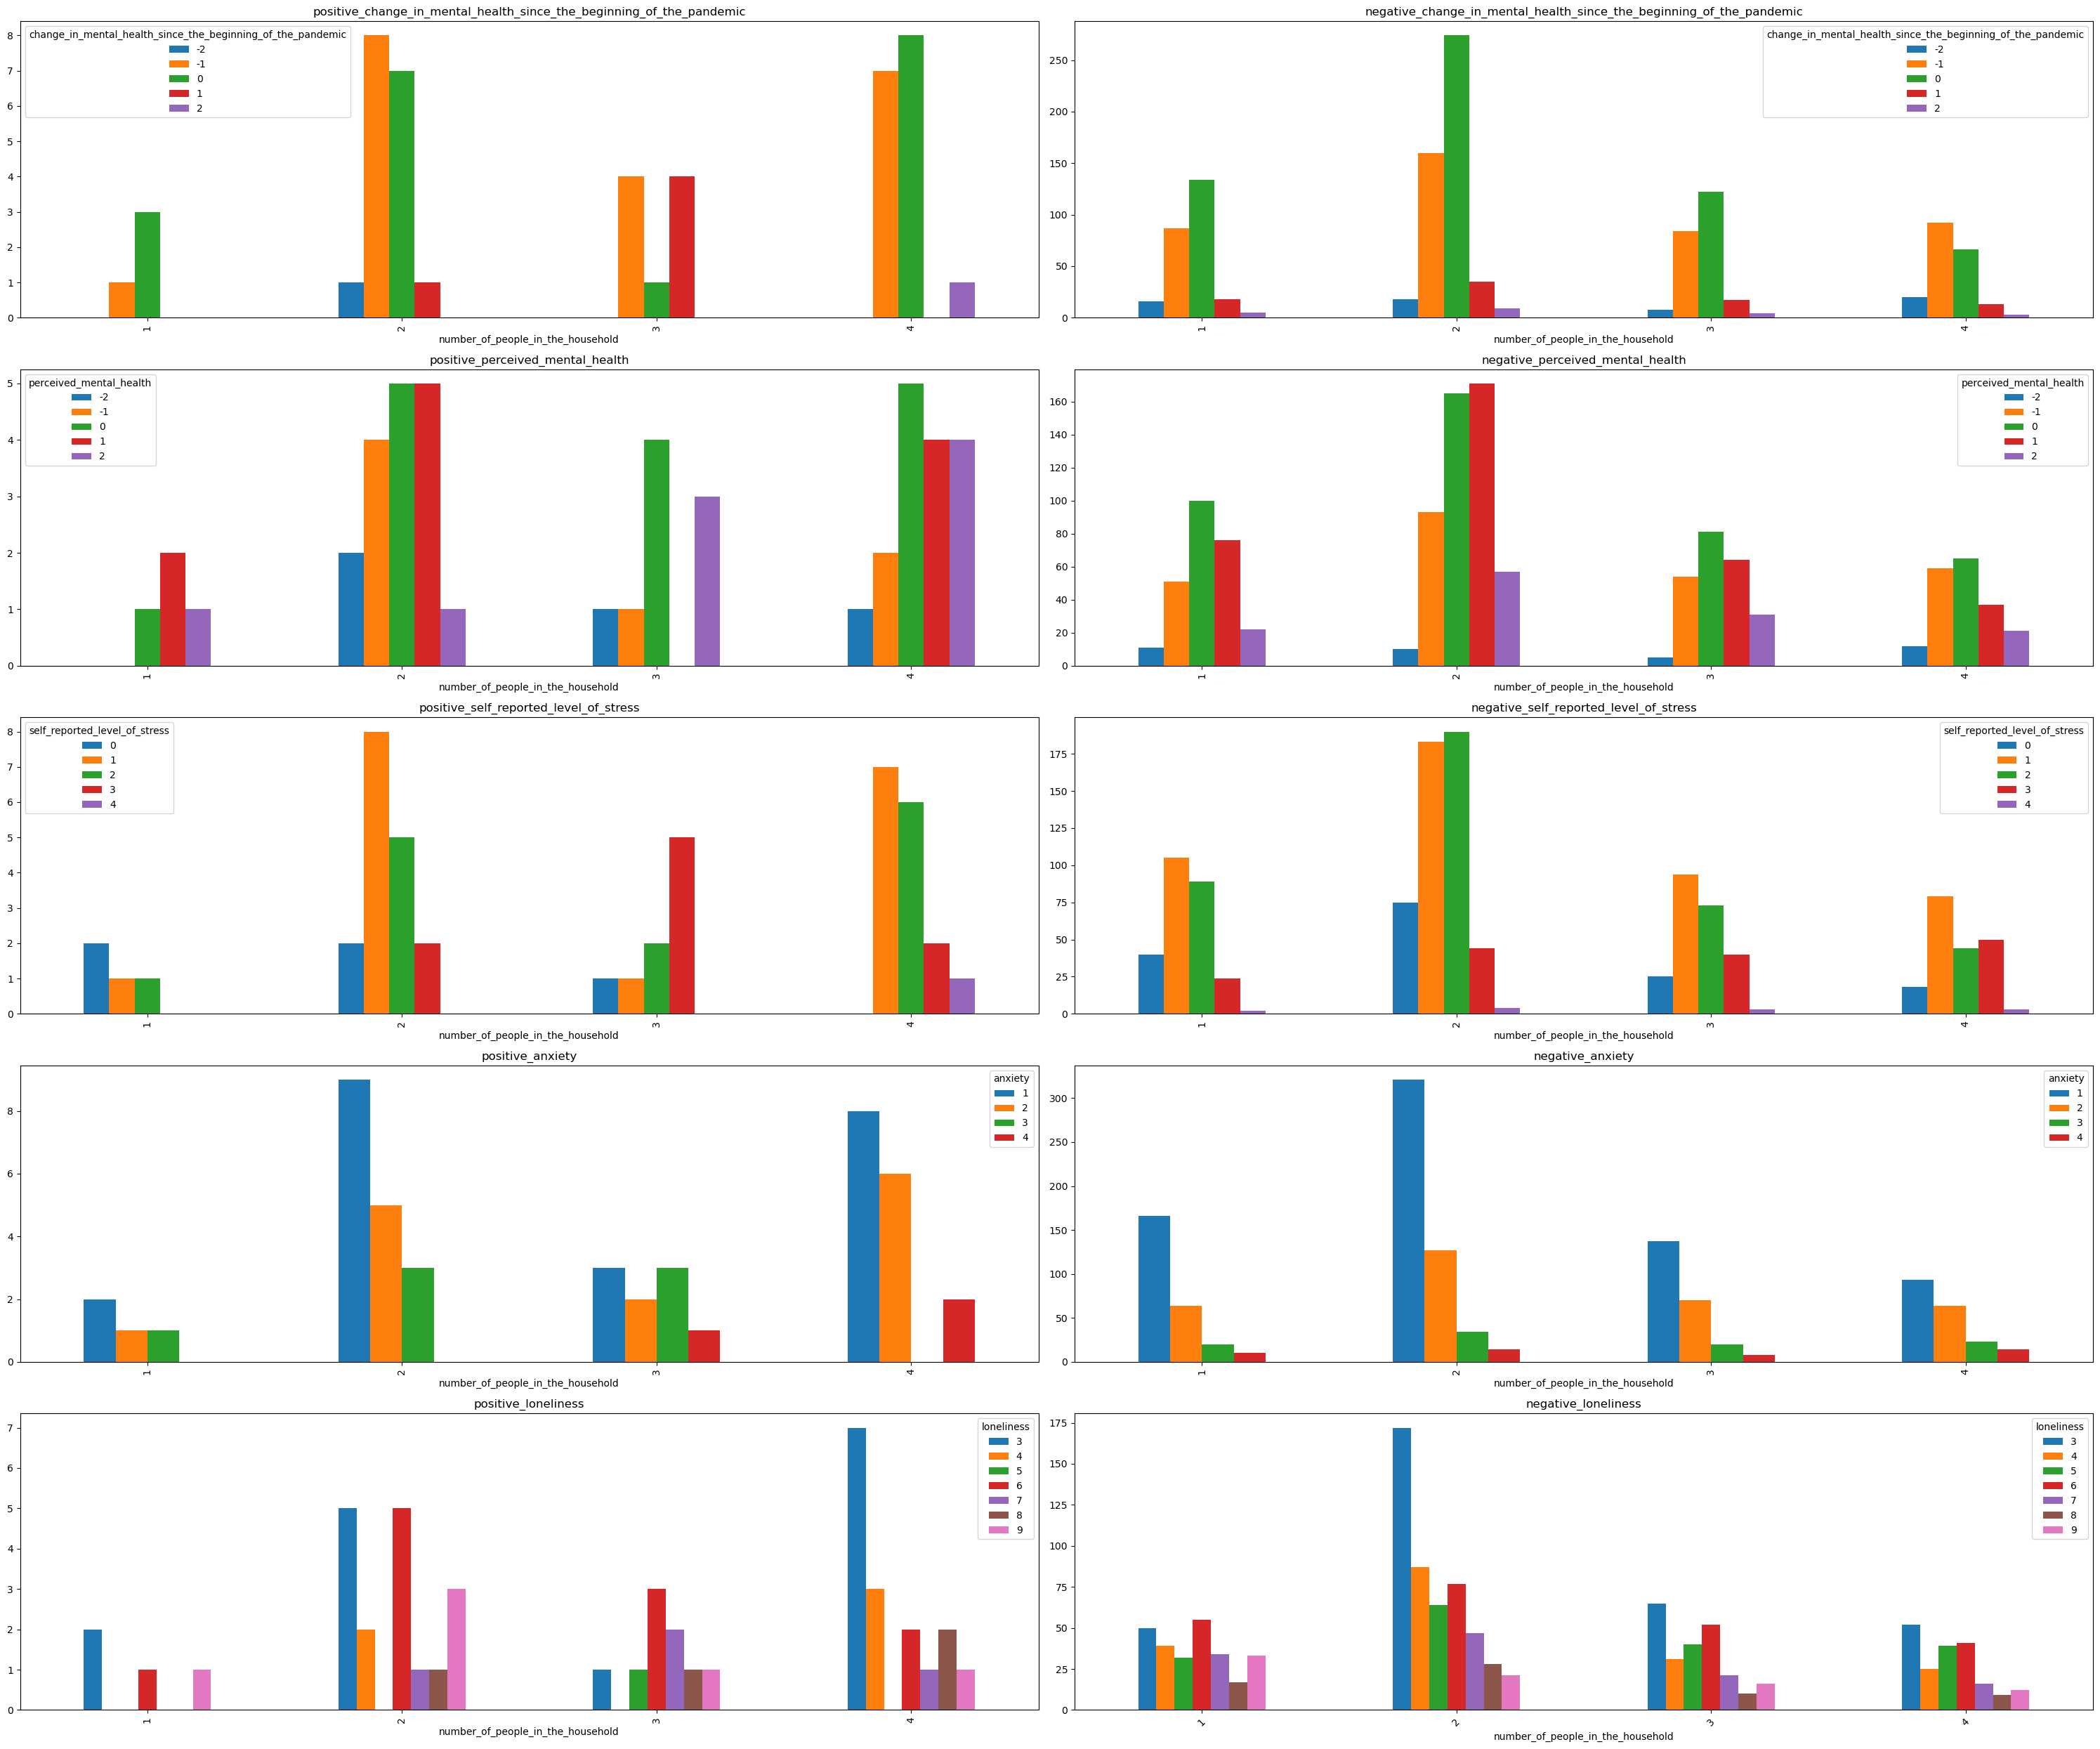

In [531]:
fig, axes = plt.subplots(5, 2, figsize=(30, 25))

for i, var in enumerate(mh_indicator_cols):
    name_positive = 'positive_' + var 
    plotGroupedBar(num_household_positive_dict[var], ax=axes[i,0], title=name_positive)
    name_negative = 'negative_' + var 
    plotGroupedBar(num_household_negative_dict[var], ax=axes[i,1], title=name_negative)

plt.tight_layout()
plt.show()

#### thoughts behind observations
change in mental health: 
- positive: best with 1 person, then 3/4, then 2
- negative: best with 2 people, then 3, then 1, then 4 (no significant variation)

=> positive: with 2 people, having 1 or both quarantined might cause both to worsen in mental state because of isolation and lack of space to roam around. with 1 person, there is most space to roam around and not be trapped. with more than 2 people, there is less space but less isolation.

=> comparison: the increase in variation for covid positive households may come from isolation.

mental health: 
- positive: best with 1 person, then 4, then 2/3
- negative: best with 2 people, then 1/3, then 4 (no significant variation)

=> positive: same reasons as change in mental health

stress level: 
- positive: best with 1, then 2, then 4, then 3 (significantly more proportion of higher stress levels with 3 than 4)
- negative: best with 2, then 1, then 3, then 4 (4 has highest proportion of extreme stress)

=> positive: with 1 person, there is more freedom and no social friction as alone time is given. as the number increases, there may be more social friction and lack of release from lack of alone time. however, there may be more stress with 3 than 4 due to the scenario that only 1 person is covid-free and has to provide for the 2 others. this is less likely with 4 people in the household due to probability.

=> negative: as the number increases, there is less alone time given and more social friction and this change is exponential. however, there may be less stress with 2 people rather than 1 person due to the extra trouble brought about by covid restrictions shared amongst 2 people.

=> comparison: the difference may come from the amount of freedom, social friction and responsibility put upon the members.

anxiety: 
- positive: best with 2, then 1, then 4, then 3 (3/4 have the highest proportion of extreme anxiety)
- negative: best with 2, then 1, then 3, then 4 (no significant variation)

loneliness: 
- positive: best with 4, then 2, then 1/3 (1 has highest proportion of extreme loneliness)
- negative: best with 2, then 4, then 3, then 1 (1 has most equal distribution of loneliness levels)

=> positive and negative: with 1 person, there is more definite isolation and a lack of choice of socialising or alone time

### exploring environment-related variables

In [537]:
environment_cols

['number_of_people_in_the_household',
 'tested_positive_to-COVID19_or_household_member',
 'social_support',
 'quality_of_life']

In [577]:
environment_df = data_modified[environ_cols + mh_indicator_cols]

number_of_people_in_the_household  \
0                                     4   
1                                     4   
4                                     2   
5                                     4   
7                                     3   
...                                 ...   
1491                                  2   
1493                                  4   
1494                                  3   
1496                                  1   
1498                                  2   

     tested_positive_to-COVID19_or_household_member social_support  \
0                                                 0              0   
1                                                 0              1   
4                                                 0              1   
5                                                 0              1   
7                                                 0              1   
...                                             ...            ...   
1491                                              0              1   
1493                                              0              1   
1494                                              0              0   
1496                                              0              1   
1498                                              0              1   

      quality_of_life  \
0            0.829328   
1            0.873691   
4            0.860241   
5            0.948968   
7            0.948968   
...               ...   
1491         0.948968   
1493         0.948968   
1494         0.911329   
1496         0.705952   
1498         0.904604   

     change_in_mental_health_since_the_beginning_of_the_pandemic  \
0                                                    -1            
1                                                    -2            
4                                                     1            
5                                                     0            
7                                                     0            
...                                                 ...            
1491                                                  0            
1493                                                  0            
1494                                                  1            
1496                                                 -1            
1498                                                  0            

     perceived_mental_health self_reported_level_of_stress anxiety  loneliness  
0                          0                             1       3           8  
1                         -1                             1       1           5  
4                          1                             2       1           4  
5                          1                             2       1           5  
7                          0                             1       2           6  
...                      ...                           ...     ...         ...  
1491                       0                             0       1           6  
1493                       0                             0       1           7  
1494                       0                             2       1           5  
1496                       0                             4       4           7  
1498                       0                             1       1           4  

[1231 rows x 9 columns]

In [549]:
#point biserial correlation for social support
le = preprocessing.LabelEncoder()
df = environment_df
df['social_support']= le.fit_transform(df['social_support'])

for var in mh_indicator_cols:
    print(var)
    df[var] = le.fit_transform(df[var])
    result = stats.pointbiserialr(df[var], df['social_support'])
    print(result)
    print('\n')

#null hypothesis rejected for all
#but low correlation for all

change_in_mental_health_since_the_beginning_of_the_pandemic
SignificanceResult(statistic=0.08688789127566633, pvalue=0.002279366790335096)


perceived_mental_health
SignificanceResult(statistic=0.18453696311053286, pvalue=6.840058253499001e-11)


self_reported_level_of_stress
SignificanceResult(statistic=-0.06915226715561716, pvalue=0.01523727019990149)


anxiety
SignificanceResult(statistic=-0.20906456653508482, pvalue=1.2655235335791008e-13)


loneliness
SignificanceResult(statistic=-0.3511631873055715, pvalue=4.856164352013349e-37)




/tmp/ipykernel_199412/38676608.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['social_support']= le.fit_transform(df['social_support'])
/tmp/ipykernel_199412/38676608.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[var] = le.fit_transform(df[var])
/tmp/ipykernel_199412/38676608.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org

In [551]:
#point biserial correlation for quality of life
le = preprocessing.LabelEncoder()
df = environment_df

for var in mh_indicator_cols:
    print(var)
    df[var] = le.fit_transform(df[var])
    result = stats.pointbiserialr(df[var], df['quality_of_life'])
    print(result)
    print('\n')

#null hypothesis rejected for all
#but slightly less low correlation for mh and anxiety

change_in_mental_health_since_the_beginning_of_the_pandemic
SignificanceResult(statistic=0.23294182836061292, pvalue=1.2447815723936015e-16)


perceived_mental_health
SignificanceResult(statistic=0.4037301527583186, pvalue=1.8391261035320474e-49)


self_reported_level_of_stress
SignificanceResult(statistic=-0.18536744532917745, pvalue=5.601521485104381e-11)


anxiety
SignificanceResult(statistic=-0.44836490029980774, pvalue=6.436748279691937e-62)


loneliness
SignificanceResult(statistic=-0.34445814993466123, pvalue=1.2901054002422947e-35)




/tmp/ipykernel_199412/2980812357.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[var] = le.fit_transform(df[var])
/tmp/ipykernel_199412/2980812357.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[var] = le.fit_transform(df[var])
/tmp/ipykernel_199412/2980812357.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable

In [579]:
environment_df = data_modified[environ_cols + mh_indicator_cols]

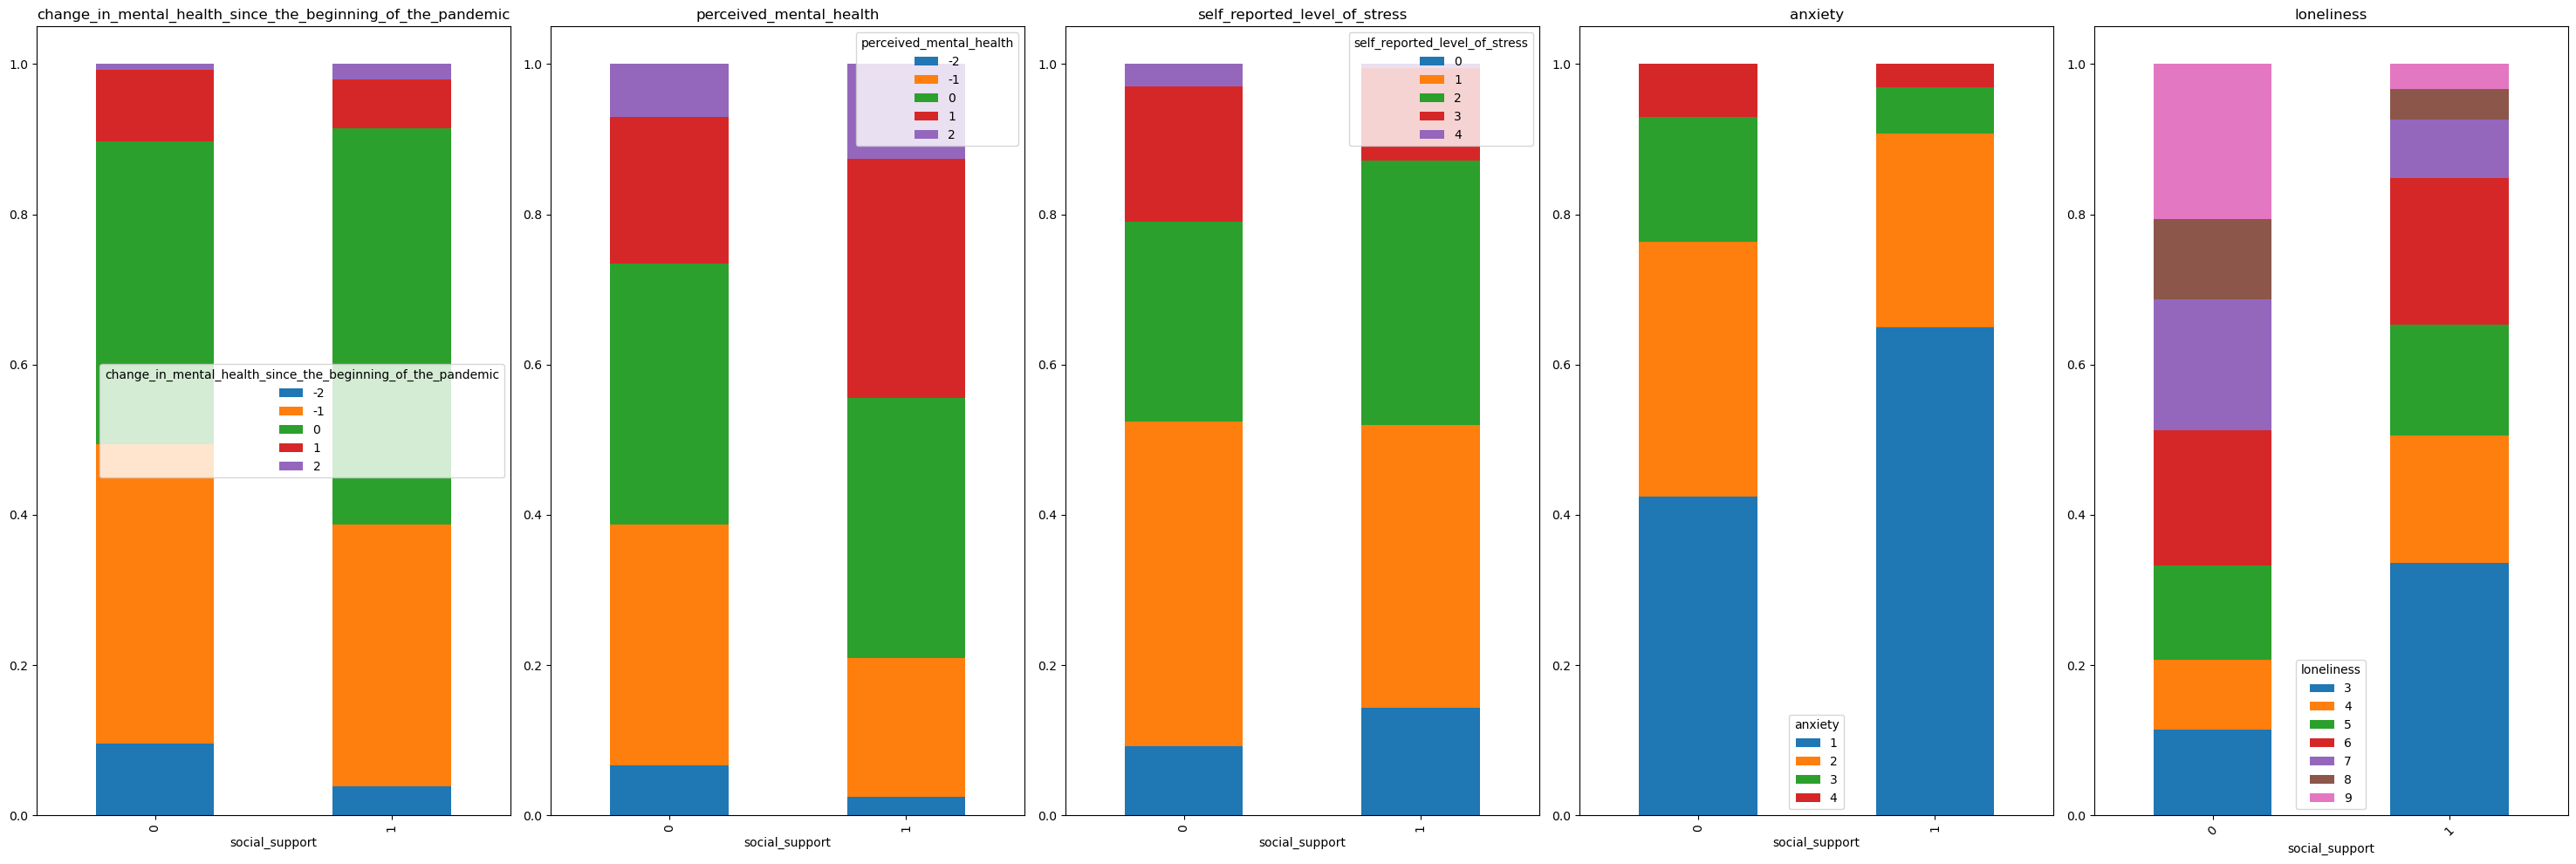

In [581]:
#stacked bar plots for social support
fig, axes = plt.subplots(1, 5, figsize=(30, 10))

for i, var in enumerate(mh_indicator_cols):
    plotStackedBar(environment_df, 'social_support', var, ax=axes[i], title=var)

plt.tight_layout()
plt.show()

#change in mh: better change for those with
#mh: better mh for those with
#stress level: lower stress for those with
#anxiety: significantly lower anxiety for those with
#loneliness: lower loneliness for those with; more equal distribution for those without

In [583]:
cross_social_support_dict = {}
df = environment_df
for i, var in enumerate(mh_indicator_cols):
    cross = pd.crosstab(df['social_support'], df[var])
    cross_social_support_dict[var] = cross

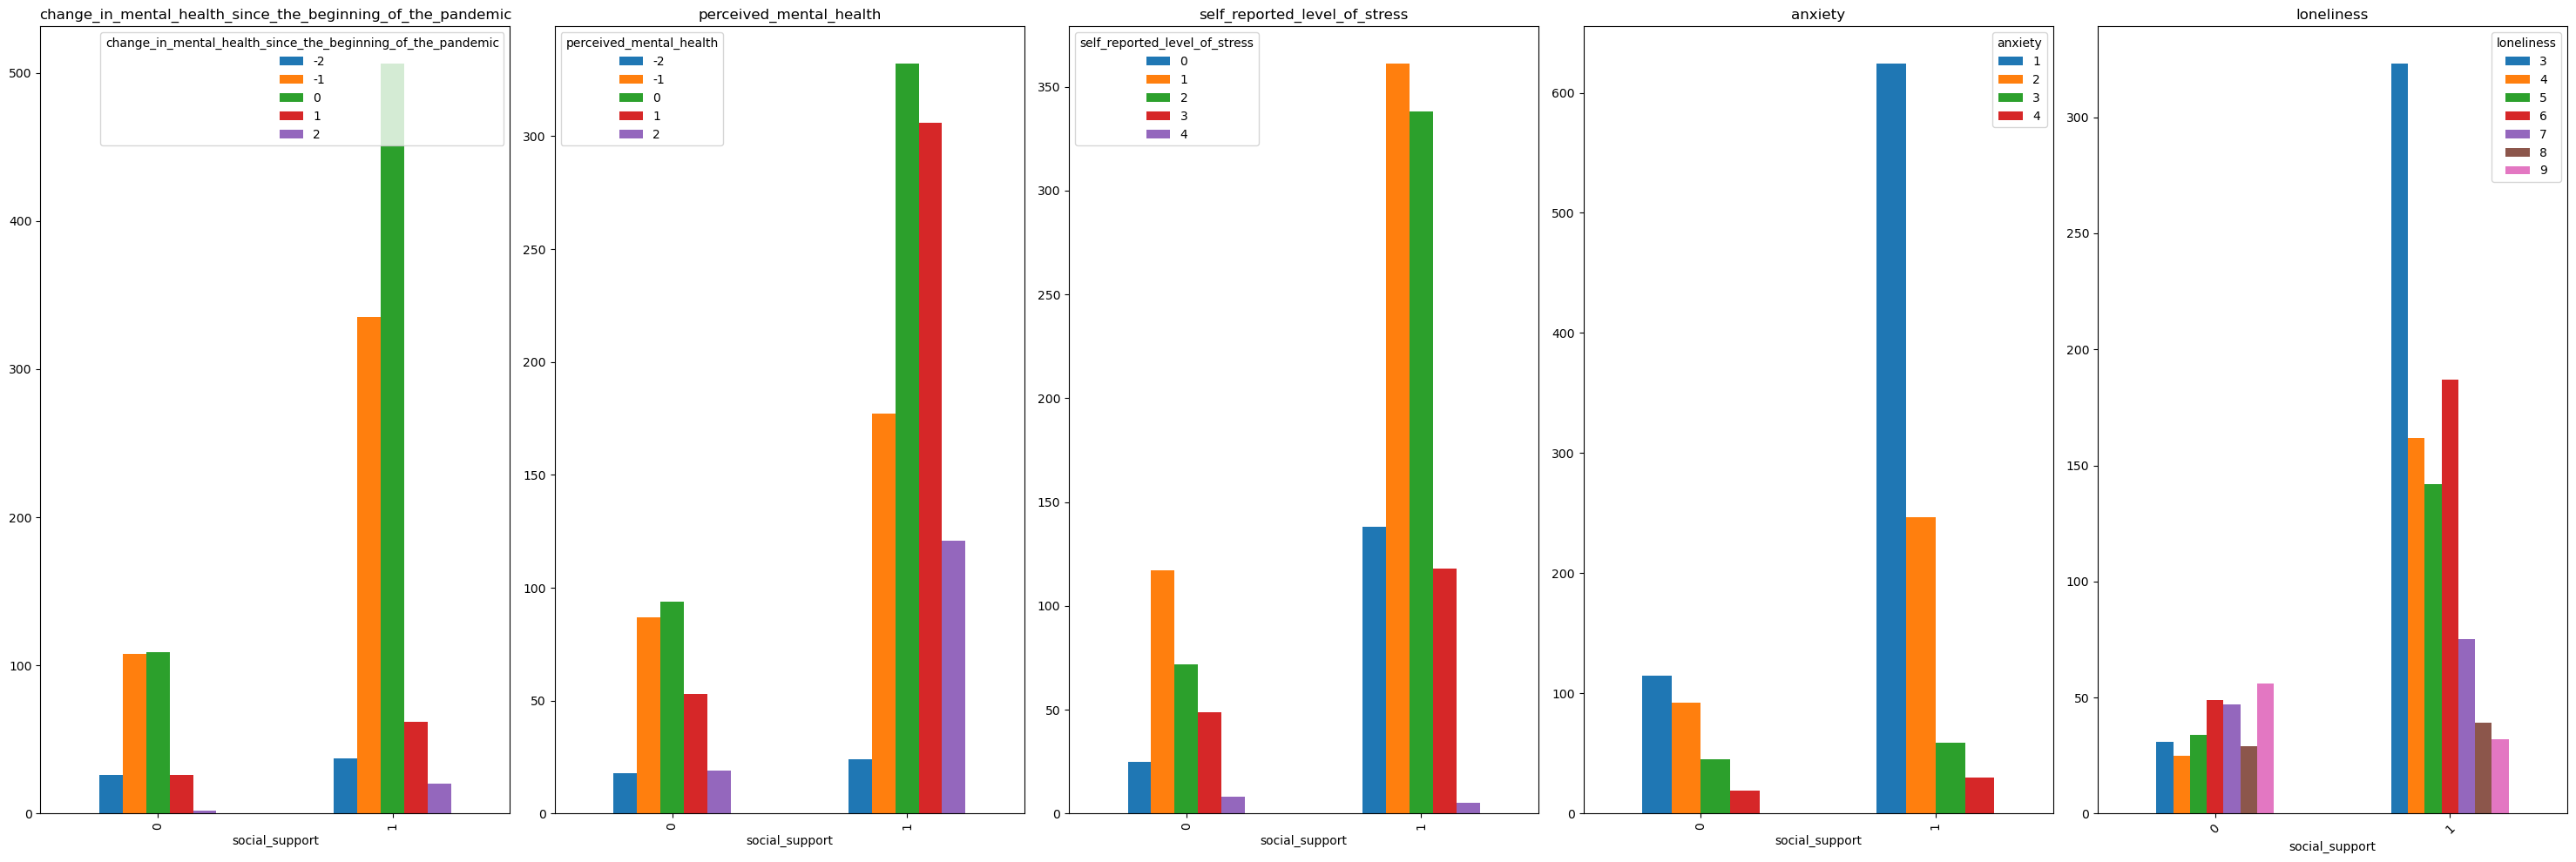

In [585]:
#grouped bar plots for social support
fig, axes = plt.subplots(1, 5, figsize=(30, 10))

for i, var in enumerate(mh_indicator_cols):
    plotGroupedBar(cross_social_support_dict[var], ax=axes[i], title=var)

plt.tight_layout()
plt.show()

In [587]:
def plotBox(df, x, y, ax=None, title=None):
    if ax is None:
        fig = plt.figure(figsize=(20,10))
        ax = fig.add_subplot(111)
    
    sns.boxplot(data=df, x=x, y=y, ax=ax)
    
    if title:
        ax.set_title(title)
    
    plt.xticks(rotation=45)

    return ax

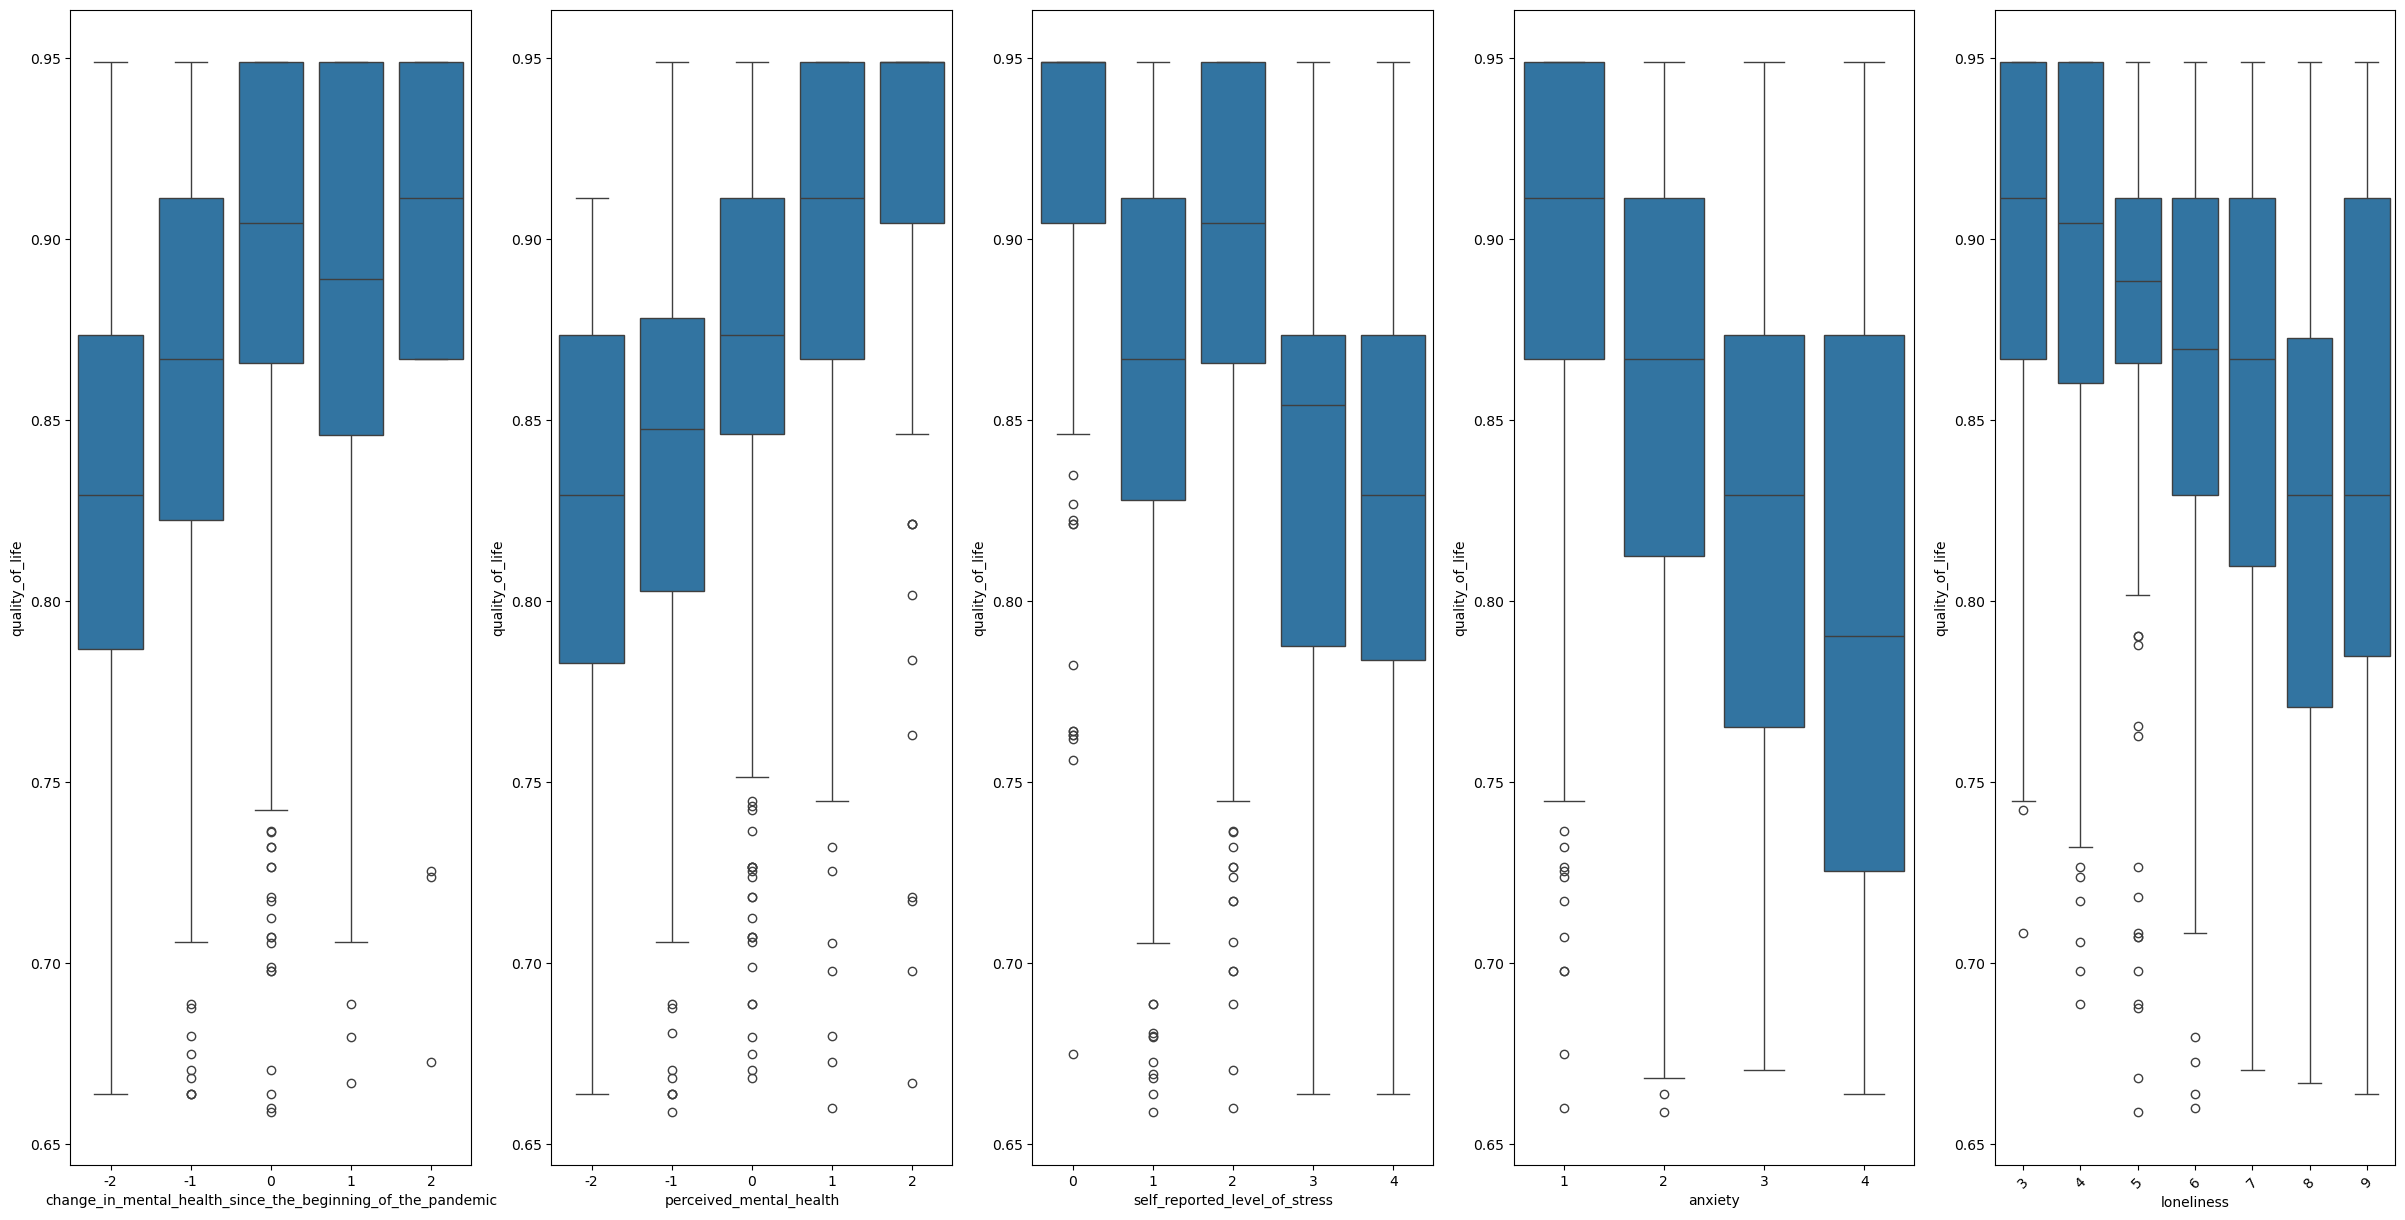

In [589]:
#quality of life boxplots
fig, axes = plt.subplots(1, 5, figsize=(30, 15))

for i, var in enumerate(mh_indicator_cols):
    plotBox(environment_df, var, 'quality_of_life', axes[i])


#### thoughts behind observations
quality of life:
- change in mental health:
    - negative change: lower quality of life
    - no or positive change: higher quality of life
- mental health:
    - as mental health improves, quality of life increases
- stress level:
    - 0/1/2: higher quality of life
    - 3/4: lower quality of life
- anxiety:
    - as anxiety increases, quality of life decreases
- loneliness:
    - as loneliness increases, quality of life decreases
 
=> negative indicators of mental health get better as quality of life increases

=> quality of life positively impacts mental health

## preparing train and test datasets

In [823]:
from sklearn.model_selection import train_test_split

In [863]:
train,test = train_test_split(data_modified, test_size = 0.25, random_state = 0)

## k means clustering

In [866]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [868]:
def elbowSilPlot(df, n_clusters):
    WCSS=[]
    sil=[]
    for i in range(1,n_clusters+1):
      kmeans=KMeans(n_clusters=i,init='k-means++')
      kmeans.fit(df)
      WCSS.append(kmeans.inertia_)
      if i >= 2:
        y_pred = kmeans.predict(df)
        sil_score = silhouette_score(df, y_pred)
        sil.append(sil_score)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    ax1.plot(range(1,n_clusters+1),WCSS)
    ax1.set_title('The Elbow Method')
    ax1.set_xlabel('N Clusters')
    ax1.set_ylabel('inertia')

    ax2.plot(range(2, n_clusters+1), sil)
    ax2.set_title('Silhouette Score Method')
    ax2.set_xlabel('N Clusters')
    ax2.set_ylabel('Sil Score')

    plt.tight_layout()
    plt.show()

In [900]:
df = train

In [902]:
from sklearn.decomposition import PCA

In [904]:
#get dummies and scale
categorical_object = df.select_dtypes(include=['object']).columns.tolist()
df = pd.get_dummies(df, columns=categorical_object, drop_first=False)
scaler= StandardScaler()
X_scaled = scaler.fit_transform(df)

Text(0, 0.5, 'pc 2')

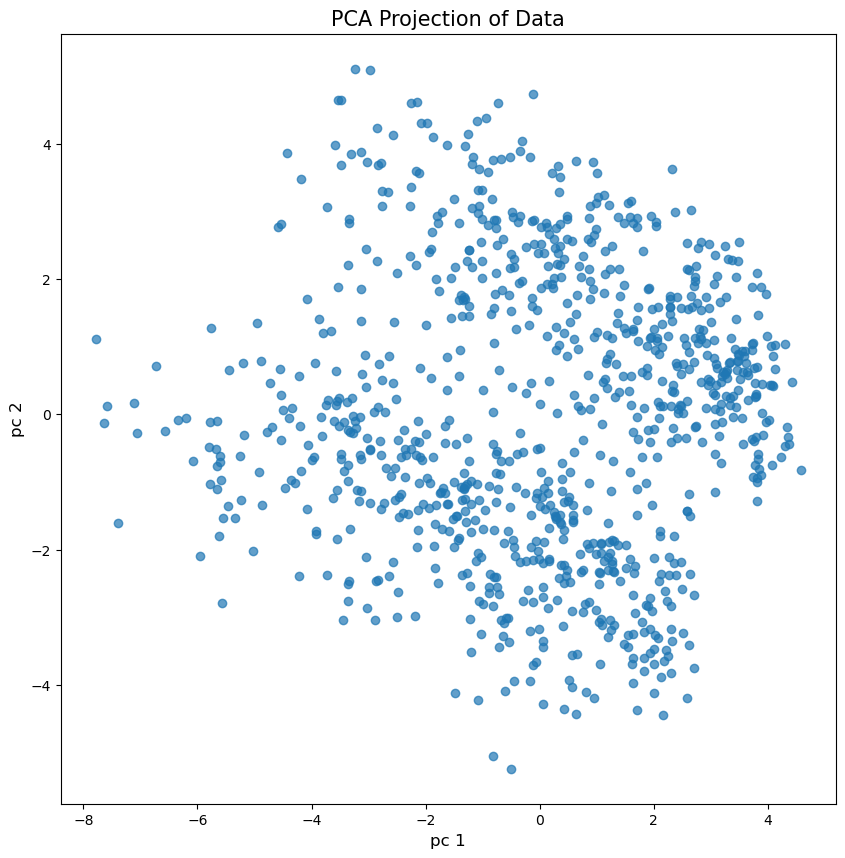

In [906]:
#pca dimensionality reduction for optimal clusters
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

#visualising pca
plt.figure(figsize=(10,10))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.7)
plt.title('PCA Projection of Data', fontsize=15)
plt.xlabel('pc 1', fontsize=12)
plt.ylabel('pc 2', fontsize=12)

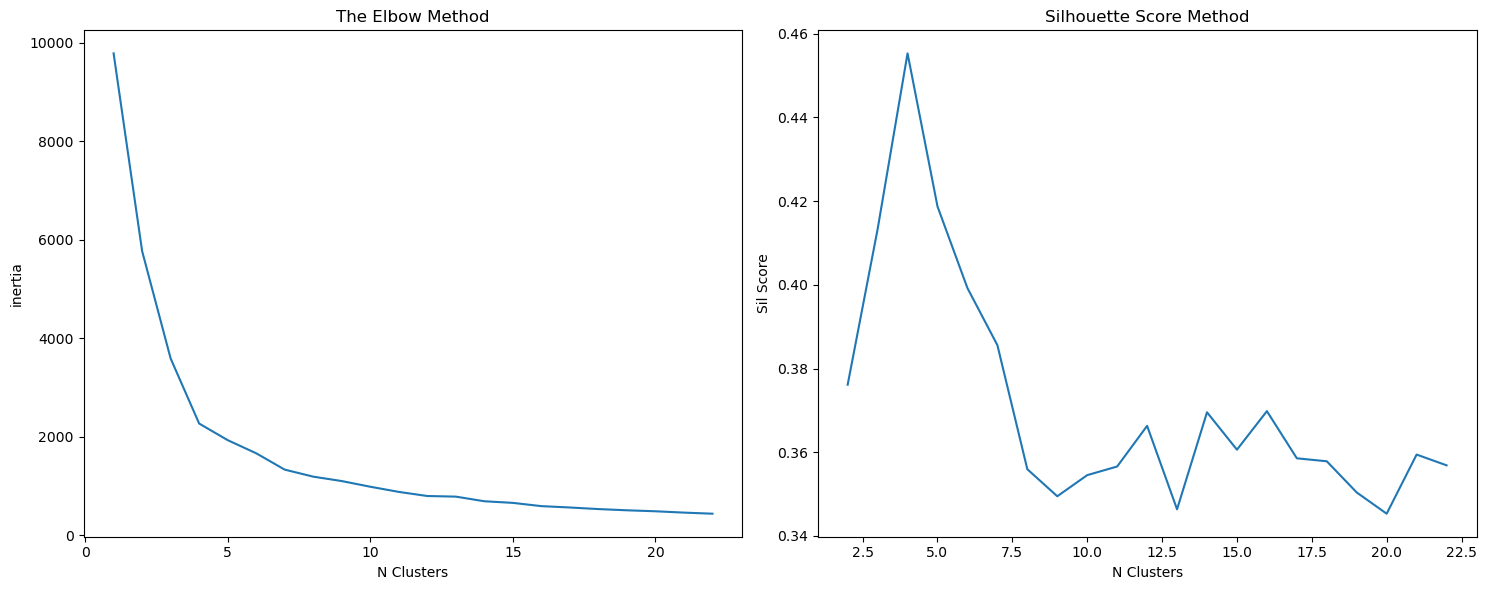

In [908]:
#elbow method and silhouette score
n_samples = len(df)
max_k = math.ceil(math.sqrt(n_samples / 2))
elbowSilPlot(X_pca, max_k)

In [912]:
#optimal number of clusters would be 4, start kmeans clustering
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, 
                init='k-means++',  
                n_init=10,         
                max_iter=300,     
                random_state=42)
kmeans.fit(X_scaled)
cluster_labels = kmeans.labels_
df['clusters'] = cluster_labels

In [914]:
df['clusters'].value_counts().sort_index()

clusters
0    230
1    334
2    133
3    226
Name: count, dtype: int64

In [916]:
#cluster profiles
cluster_profiles = df.groupby('clusters')[df.columns].mean()
cluster_profiles

pet_attitude  number_of_people_in_the_household  quality_of_life  \
clusters                                                                     
0            64.230435                           2.573913         0.832920   
1            49.715569                           2.071856         0.898486   
2            67.406015                           2.443609         0.851554   
3            70.088496                           2.455752         0.896255   

          self_assessed_overall_health  loneliness  overall_mh  \
clusters                                                         
0                            28.947826    6.308696    6.230435   
1                            41.739521    4.619760    6.823353   
2                            35.240602    5.413534    6.556391   
3                            41.420354    4.420354    6.858407   

          province_or_territory_Alberta  \
clusters                                  
0                              0.117391   
1                              0.086826   
2                              0.090226   
3                              0.079646   

          province_or_territory_British Columbia  \
clusters                                           
0                                       0.117391   
1                                       0.167665   
2                                       0.082707   
3                                       0.132743   

          province_or_territory_Manitoba  province_or_territory_New Brunswick  \
clusters                                                                        
0                               0.017391                             0.017391   
1                               0.014970                             0.011976   
2                               0.015038                             0.022556   
3                               0.061947                             0.044248   

          ...  anxiety_1  anxiety_2  anxiety_3  anxiety_4  \
clusters  ...                                               
0         ...   0.060870   0.591304   0.234783   0.113043   
1         ...   0.856287   0.122754   0.017964   0.002994   
2         ...   0.496241   0.315789   0.127820   0.060150   
3         ...   0.862832   0.128319   0.008850   0.000000   

          ownership_class_acquired a pet during pandemic  \
clusters                                                   
0                                               0.000000   
1                                               0.000000   
2                                               0.308271   
3                                               0.000000   

          ownership_class_already owned a pet  \
clusters                                        
0                                    0.508696   
1                                    0.000000   
2                                    0.000000   
3                                    1.000000   

          ownership_class_lost all pets during pandemic  \
clusters                                                  
0                                              0.000000   
1                                              0.000000   
2                                              0.218045   
3                                              0.000000   

          ownership_class_lost some pets during pandemic  \
clusters                                                   
0                                               0.000000   
1                                               0.000000   
2                                               0.473684   
3                                               0.000000   

          ownership_class_never owned a pet  clusters  
clusters                                               
0                                  0.491304       0.0  
1                                  1.000000       1.0  
2                                  0.000000       2.0  
3                                  0.000000       3.0  

[4 rows x

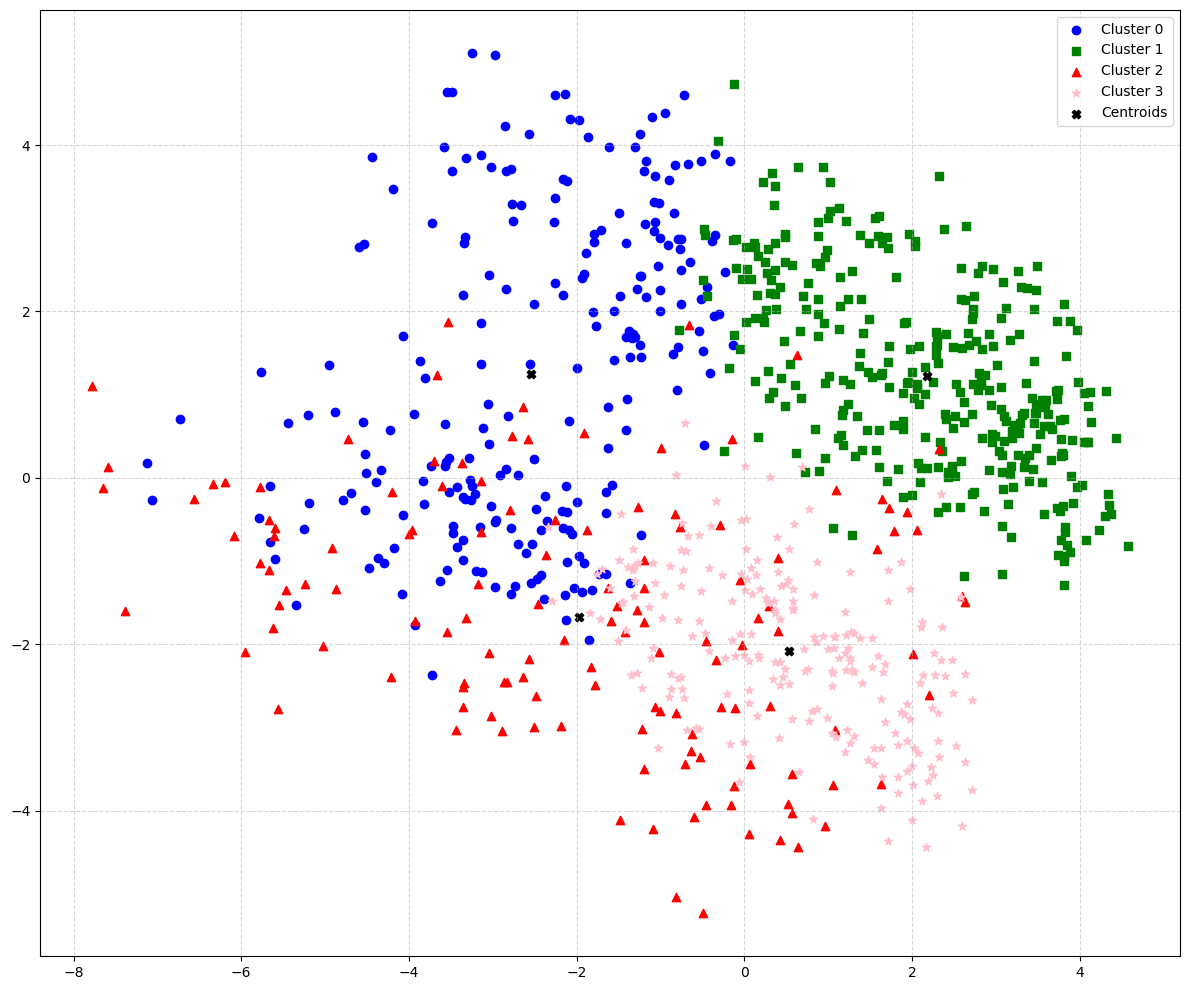

In [924]:
#visualising with pca
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(12, 10))
colors = ['blue', 'green', 'red', 'pink']
markers = ['o', 's', '^', '*']

for cluster in range(optimal_k):
    #return array of points in the cluster
    cluster_points = X_pca[cluster_labels == cluster]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], 
               c=colors[cluster], marker=markers[cluster], 
                label=f'Cluster {cluster}')

#plot clusters
centers_pca = pca.transform(kmeans.cluster_centers_)
plt.scatter(centers_pca[:, 0], centers_pca[:, 1], 
           c='black', marker='X', label='Centroids')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [926]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 923 entries, 420 to 839
Data columns (total 90 columns):
 #   Column                                                                     Non-Null Count  Dtype  
---  ------                                                                     --------------  -----  
 0   pet_attitude                                                               923 non-null    int64  
 1   number_of_people_in_the_household                                          923 non-null    int64  
 2   quality_of_life                                                            923 non-null    float64
 3   self_assessed_overall_health                                               923 non-null    int64  
 4   loneliness                                                                 923 non-null    int64  
 5   overall_mh                                                                 923 non-null    int64  
 6   province_or_territory_Alberta                                

In [928]:
#find out rate of pet ownership by cluster
ownership_by_cluster = df.groupby('clusters')['pet_ownership_1'].mean() * 100
for cluster in range(optimal_k):
    print(f"{cluster+1}: {ownership_by_cluster[cluster]}%")

1: 50.8695652173913%
2: 0.0%
3: 78.19548872180451%
4: 100.0%


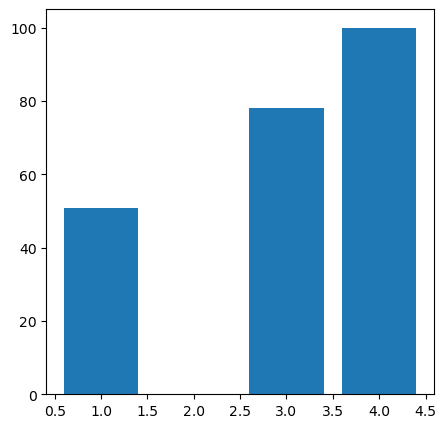

In [930]:
#plot
plt.figure(figsize=(5, 5))
bars = plt.bar(range(1, optimal_k+1), ownership_by_cluster)

In [946]:
#owners vs non_owners
result = []
mh_indicator_dummy_cols = ['loneliness', 'perceived_mental_health_-2', 'perceived_mental_health_-1', 'perceived_mental_health_0',
                           'perceived_mental_health_1','perceived_mental_health_2','self_reported_level_of_stress_0','self_reported_level_of_stress_1',
                           'self_reported_level_of_stress_2','self_reported_level_of_stress_3','self_reported_level_of_stress_4','anxiety_1',
                           'anxiety_2','anxiety_3','anxiety_4','change_in_mental_health_since_the_beginning_of_the_pandemic_-2', 
                           'change_in_mental_health_since_the_beginning_of_the_pandemic_-1','change_in_mental_health_since_the_beginning_of_the_pandemic_0',
                           'change_in_mental_health_since_the_beginning_of_the_pandemic_1','change_in_mental_health_since_the_beginning_of_the_pandemic_2']
for cluster in range(optimal_k):
    cluster_data = df[df['clusters'] == cluster]
    
    owners = cluster_data[cluster_data['pet_ownership_1'] == 1]
    non_owners = cluster_data[cluster_data['pet_ownership_1'] == 0]
    
    if len(owners) == 0 or len(non_owners) == 0:
        continue

    for indicator in mh_indicator_dummy_cols:
        if indicator in df.columns:
            owners_mean = owners[indicator].mean()
            non_owners_mean = non_owners[indicator].mean()
            diff = owners_mean - non_owners_mean
            
            # Add result to table
            result.append({
                'Cluster': f'Cluster {cluster+1}',
                'Indicator': indicator,
                'Pet Owners': owners_mean,
                'Non-Owners': non_owners_mean,
                'Difference': diff
            })

results_df = pd.DataFrame(result)

benefit = ['yes','no','no','no','yes','no','no','no','no','no','yes','yes','no','yes','no','yes','yes',
           'yes','yes','no','no','no','no','yes','no','no','no','yes','no', 'no','no','no','yes','no',
           'no','no','no','no','no','no']
results_df['Benefit'] = benefit
display(results_df)

Cluster                                          Indicator  Pet Owners  \
0   Cluster 1                                         loneliness    6.273504   
1   Cluster 1                         perceived_mental_health_-2    0.102564   
2   Cluster 1                         perceived_mental_health_-1    0.555556   
3   Cluster 1                          perceived_mental_health_0    0.273504   
4   Cluster 1                          perceived_mental_health_1    0.059829   
5   Cluster 1                          perceived_mental_health_2    0.008547   
6   Cluster 1                    self_reported_level_of_stress_0    0.008547   
7   Cluster 1                    self_reported_level_of_stress_1    0.504274   
8   Cluster 1                    self_reported_level_of_stress_2    0.042735   
9   Cluster 1                    self_reported_level_of_stress_3    0.418803   
10  Cluster 1                    self_reported_level_of_stress_4    0.025641   
11  Cluster 1                                          anxiety_1    0.068376   
12  Cluster 1                                          anxiety_2    0.589744   
13  Cluster 1                                          anxiety_3    0.222222   
14  Cluster 1                                          anxiety_4    0.119658   
15  Cluster 1  change_in_mental_health_since_the_beginning_of...    0.136752   
16  Cluster 1  change_in_mental_health_since_the_beginning_of...    0.589744   
17  Cluster 1  change_in_mental_health_since_the_beginning_of...    0.162393   
18  Cluster 1  change_in_mental_health_since_the_beginning_of...    0.102564   
19  Cluster 1  change_in_mental_health_since_the_beginning_of...    0.008547   
20  Cluster 3                                         loneliness    5.490385   
21  Cluster 3                         perceived_mental_health_-2    0.057692   
22  Cluster 3                         perceived_mental_health_-1    0.298077   
23  Cluster 3                          perceived_mental_health_0    0.336538   
24  Cluster 3                          perceived_mental_health_1    0.250000   
25  Cluster 3                          perceived_mental_health_2    0.057692   
26  Cluster 3                    self_reported_level_of_stress_0    0.057692   
27  Cluster 3                    self_reported_level_of_stress_1    0.471154   
28  Cluster 3                    self_reported_level_of_stress_2    0.259615   
29  Cluster 3                    self_reported_level_of_stress_3    0.182692   
30  Cluster 3                    self_reported_level_of_stress_4    0.028846   
31  Cluster 3                                          anxiety_1    0.451923   
32  Cluster 3                                          anxiety_2    0.336538   
33  Cluster 3                                          anxiety_3    0.134615   
34  Cluster 3                                          anxiety_4    0.076923   
35  Cluster 3  change_in_mental_health_since_the_beginning_of...    0.076923   
36  Cluster 3  change_in_mental_health_since_the_beginning_of...    0.423077   
37  Cluster 3  change_in_mental_health_since_the_beginning_of...    0.394231   
38  Cluster 3  change_in_mental_health_since_the_beginning_of...    0.067308   
39  Cluster 3  change_in_mental_health_since_the_beginning_of...    0.038462   

    Non-Owners  Difference Benefit  
0     6.345133   -0.071628     yes  
1     0.097345    0.005219      no  
2     0.548673    0.006883      no  
3     0.327434   -0.053929      no  
4     0.017699    0.042130     yes  
5     0.008850   -0.000303      no  
6     0.017699   -0.009152      no  
7     0.557522   -0.053249      no  
8     0.088496   -0.045761      no  
9     0.300885    0.117918      no  
10    0.035398   -0.009757     yes  
11    0.053097    0.015279     yes  
12    0.592920   -0.003177      no  
13    0.247788   -0.025565     yes  
14    0.106195    0.013463      no  
15    0.159292   -0.022540     yes  
16    0.646018   -0.056274     yes  
17    0.123894    0.038499     yes  
18    0.061947    0.04

In [982]:
def get_benefit(df, cluster_id, indicator):
    cluster_name = f'Cluster {cluster_id}' 
    
    cluster_data = df[df['Cluster'] == cluster_name]
    
    if cluster_data.empty:
        print(f"No data found for {cluster_name}")
        return None
    
    exact_match = cluster_data[cluster_data['Indicator'] == indicator]
    
    if not exact_match.empty:
        return exact_match.iloc[0]['Benefit']
    
    partial_matches = cluster_data[cluster_data['Indicator'].str.contains(indicator, case=False, regex=False)]
    
    if not partial_matches.empty:
        return partial_matches.iloc[0]['Benefit']

    for _, row in cluster_data.iterrows():
        db_indicator = row['Indicator']
        if db_indicator.startswith(indicator):
            return row['Benefit']
    
    # Nothing found
    print(f"No match found for {indicator} in {cluster_name}")
    return None

In [986]:
def create_cluster_profile(cluster_id):
    cluster_data = df[df['clusters'] == cluster_id]
    
    profile = {
        'size': len(cluster_data),
        'percentage': f"{len(cluster_data) / len(df) * 100:.1f}%",
        'pet ownership rate': f"{cluster_data['pet_ownership_1'].mean() * 100:.1f}%"
    }
    
    for col in df.columns:
        if col in cluster_data.columns:
            profile[f'avg {col}'] = f"{cluster_data[col].mean()}"
    
    # most common categorical values
    categorical_cols = df.select_dtypes(include='bool').columns.tolist()
    for col in categorical_cols:
        if col in cluster_data.columns:
            top_value = cluster_data[col].value_counts().index[0]
            profile[f'most common {col}'] = f"{top_value} ({cluster_data[col].value_counts(normalize=True).iloc[0]*100}%)"
    
    #mh benefit
    owners = cluster_data[cluster_data['pet_ownership_1'] == 1]
    non_owners = cluster_data[cluster_data['pet_ownership_1'] == 0]

    if len(owners) > 0 and len(non_owners) > 0:
        for indicator in mh_indicator_dummy_cols:
            if indicator in cluster_data.columns:
                profile[f'benefit for {indicator}'] = get_benefit(results_df, cluster_id, indicator)
    
    return profile

In [1000]:
mh_indicator_dummy_cols

['loneliness',
 'perceived_mental_health_-2',
 'perceived_mental_health_-1',
 'perceived_mental_health_0',
 'perceived_mental_health_1',
 'perceived_mental_health_2',
 'self_reported_level_of_stress_0',
 'self_reported_level_of_stress_1',
 'self_reported_level_of_stress_2',
 'self_reported_level_of_stress_3',
 'self_reported_level_of_stress_4',
 'anxiety_1',
 'anxiety_2',
 'anxiety_3',
 'anxiety_4',
 'change_in_mental_health_since_the_beginning_of_the_pandemic_-2',
 'change_in_mental_health_since_the_beginning_of_the_pandemic_-1',
 'change_in_mental_health_since_the_beginning_of_the_pandemic_0',
 'change_in_mental_health_since_the_beginning_of_the_pandemic_1',
 'change_in_mental_health_since_the_beginning_of_the_pandemic_2']

In [996]:
#generate profiles for all clusters

cluster_profiles = {}
for i in range(optimal_k):
    cluster_profiles[f'Cluster {i}'] = create_cluster_profile(i)

profiles_df = pd.DataFrame(cluster_profiles)
display(profiles_df)

Cluster 0  \
size                                                               230   
percentage                                                       24.9%   
pet ownership rate                                               50.9%   
avg pet_attitude                                      64.2304347826087   
avg number_of_people_in_the_household               2.5739130434782607   
...                                                                ...   
benefit for change_in_mental_health_since_the_b...                 yes   
benefit for change_in_mental_health_since_the_b...                 yes   
benefit for change_in_mental_health_since_the_b...                 yes   
benefit for change_in_mental_health_since_the_b...                 yes   
benefit for change_in_mental_health_since_the_b...                  no   

                                                            Cluster 1  \
size                                                              334   
percentage                                                      36.2%   
pet ownership rate                                               0.0%   
avg pet_attitude                                    49.71556886227545   
avg number_of_people_in_the_household                2.07185628742515   
...                                                               ...   
benefit for change_in_mental_health_since_the_b...                NaN   
benefit for change_in_mental_health_since_the_b...                NaN   
benefit for change_in_mental_health_since_the_b...                NaN   
benefit for change_in_mental_health_since_the_b...                NaN   
benefit for change_in_mental_health_since_the_b...                NaN   

                                                            Cluster 2  \
size                                                              133   
percentage                                                      14.4%   
pet ownership rate                                              78.2%   
avg pet_attitude                                    67.40601503759399   
avg number_of_people_in_the_household               2.443609022556391   
...                                                               ...   
benefit for change_in_mental_health_since_the_b...                 no   
benefit for change_in_mental_health_since_the_b...                 no   
benefit for change_in_mental_health_since_the_b...                 no   
benefit for change_in_mental_health_since_the_b...                 no   
benefit for change_in_mental_health_since_the_b...                 no   

                                                             Cluster 3  
size                                                               226  
percentage                                                       24.5%  
pet ownership rate                                              100.0%  
avg pet_attitude                                     70.08849557522124  
avg number_of_people_in_the_household               2.4557522123893807  
...                                                                ...  
benefit for change_in_mental_health_since_the_b...                 NaN  
benefit for change_in_mental_health_since_the_b...                 NaN  
benefit for change_in_mental_health_since_the_b...                 NaN  
benefit for change_in_mental_health_since_the_b...                 NaN  
benefit for change_in_mental_health_since_the_b...                 NaN  

[196 rows x 4 columns]

In [998]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

display(profiles_df)

Cluster 0  \
size                                                                                                           230   
percentage                                                                                                   24.9%   
pet ownership rate                                                                                           50.9%   
avg pet_attitude                                                                                  64.2304347826087   
avg number_of_people_in_the_household                                                           2.5739130434782607   
avg quality_of_life                                                                             0.8329196340869566   
avg self_assessed_overall_health                                                                 28.94782608695652   
avg loneliness                                                                                   6.308695652173913   
avg overall_mh                                                                                   6.230434782608696   
avg province_or_territory_Alberta                                                              0.11739130434782609   
avg province_or_territory_British Columbia                                                     0.11739130434782609   
avg province_or_territory_Manitoba                                                            0.017391304347826087   
avg province_or_territory_New Brunswick                                                       0.017391304347826087   
avg province_or_territory_Newfoundland and Labrador                                           0.013043478260869565   
avg province_or_territory_Northwest Territories                                               0.004347826086956522   
avg province_or_territory_Nova Scotia                                                           0.0391304347826087   
avg province_or_territory_Nunavut                                                                              0.0   
avg province_or_territory_Ontario                                                              0.41739130434782606   
avg province_or_territory_Prince Edward Island                                                                 0.0   
avg province_or_territory_Qu�bec                                                               0.23043478260869565   
avg province_or_territory_Saskatchewan                                                         0.02608695652173913   
avg province_or_territory_Yukon                                                                                0.0   
avg region_Atlantic                                                                            0.06956521739130435   
avg region_British Columbia                                                                    0.11739130434782609   
avg region_Ontario                                                                             0.41739130434782606   
avg region_Prairies                                                                            0.16521739130434782   
avg region_Qu�bec                                                                              0.23043478260869565   
avg pet_ownership_0                                                                            0.49130434782608695   
avg pet_ownership_1                                                                              0.508695652173913   
avg change_in_pet_ownership_Loss                                                                               0.0   
avg change_in_pet_ownership_New                                                                                0.0   
avg change_in_pet_ownership_No                                                                                 1.0   
avg age_18-24                                                                                   0.1391304347826087   
avg age_25-34                                                                                

### 

### Interpretation and Conclusions
The most significant benefits of pet ownership during COVID-19 appear in Cluster 0, which shows:

__Consistent Benefits Across Multiple Metrics:__

- 8 "yes" benefits vs. 7 "no" across all mental health indicators.
- Most consistent positive results for loneliness, high-level stress, certain anxiety measures, and mental health changes.


__Stability in Pet Ownership:__

- The 50.9% who were pet owners had them before the pandemic.
- This suggests that established pet relationships were most beneficial.
- No disruption from pet loss or adaptation to new pets


__Demographic Profile of Beneficiaries:__

- Middle-aged adults benefited more than older or younger groups
- Women appeared to benefit more than men
- Higher education levels correlated with greater benefits
- Those with pre-existing mental health conditions showed greater benefits


__Comparison with Cluster 2:__

- Despite higher pet ownership rates (78.2%), Cluster 2 showed fewer benefits
- The higher rate of pet loss/acquisition in Cluster 2 may have undermined potential benefits
- Suggests continuous, stable pet relationships are more beneficial than new or disrupted ones



### Key Takeaways

__Targeted Benefits:__ 

Pet ownership appears to benefit specific demographic groups rather than providing universal advantages

__Continuity Matters:__ 

Long-term pet relationships established before the pandemic provided more mental health support than newly acquired pets

__Gender and Education Effects:__ 

Women and those with higher education appeared to derive greater benefits, suggesting potential interactions between demographic factors and pet-related coping mechanisms

__Pre-existing Conditions:__ 

Those with emotional/psychological conditions seemed to benefit most, suggesting pets may serve as a protective factor for vulnerable populations



__Mixed Evidence:__
 While Cluster 0 shows clear benefits, the lack of universal positive outcomes across clusters suggests pet ownership is not a one-size-fits-all intervention.

These findings provide a nuanced picture of how pet ownership supported mental health during COVID-19, highlighting the importance of considering demographic factors, pre-existing conditions, and the nature of the human-animal bond when analyzing such benefits.